In [ ]:
from notebooks import *
print_sys_info()

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


platform:
  machine: x86_64
  node: 63520fb944be
  processor: x86_64
  release: 4.14.33+
  system: Linux
  version: '#1 SMP Wed Jun 20 01:15:52 PDT 2018'
cpu: 96
mem: 85g
swap: 0g


In [ ]:
# Load models
load = Load()
projection = Projection.load('peterson-v0-26bae1c', features=Features(load=load))

[22:54:08.629] DEBUG  Projection.load
  path: /app/data/models/projection/peterson-v0-26bae1c.pkl


In [ ]:
# Experiment ID
experiment_id_prefix = 'comp-l1-l2'

In [ ]:
# Select recs
#   1. countries: Filter recs to these countries
#   2. species: Filter recs to these species
#   3. recs_at_least: Filter species to those with at least this many recs
#   4. num_species: Sample this many of the species
#   5. num_recs: Sample this many recs per species
inf = np.inf
# countries_k, com_names_k = 'na', 'us'      # 9.4k/400k -> 1.1k/60k -> 774/53k
countries_k, com_names_k = 'na', 'ca'      # 9.4k/400k -> 1.1k/60k -> 334/35k
# countries_k, com_names_k = 'na', 'dan170'  # 9.4k/400k -> 1.1k/60k -> 170/3.4k
# countries_k, com_names_k = 'na', 'dan4'    # 9.4k/400k -> 1.1k/60k ->   4/2.2k
recs_at_least, num_species, num_recs =   0, inf, inf  # US[334/35k ->1.1k/60k -> 774/53k -> 774/53k   -> 743/53k]    # All US
# recs_at_least, num_species, num_recs = 100, 100, 100  # CA[334/35k -> 127/25k -> 100/21k -> 100/10k   -> 100/10k]
# recs_at_least, num_species, num_recs =  50, 100, 100  # CA[334/35k -> 224/32k -> 100/16k -> 100/ 9.0k -> 100/ 9.0k]
# recs_at_least, num_species, num_recs =   0, 100, 100  # CA[334/35k -> 334/35k -> 100/12k -> 100/ 6.8k ->  99/ 6.8k]
# recs_at_least, num_species, num_recs =   0, 168, 100  # CA[334/34k -> 334/34k -> 168/18k -> 168/11k   -> 167/11k]    # (old 'all')
# recs_at_least, num_species, num_recs =   0, 168,  20  # CA[334/34k -> 334/35k -> 168/18k -> 168/ 3.2k -> 167/ 3.2k]  # (old 'recs')
# recs_at_least, num_species, num_recs =  20, 168,  20  # CA[334/35k -> 296/35k -> 168/20k -> 168/ 3.4k -> 168/ 3.4k]  # Familiar set
# recs_at_least, num_species, num_recs =  20, 336,  20  # US[774/53k -> 528/51k -> 336/33k -> 336/ 6.7k -> 336/ 6.7k]  # Scale species
# recs_at_least, num_species, num_recs =  10, 168,  20  # CA[334/35k ->                                             ]  # Class imbalance
# recs_at_least, num_species, num_recs =   0, 168,  20  # CA[334/35k ->                                             ]  # Class imbalance
# recs_at_least, num_species, num_recs =   0, inf,  20  # dan170 for app_brainstorm_1
# recs_at_least, num_species, num_recs =  20, 50,  100  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,   50  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,   20  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,   10  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,    5  # Faster dev
get_recs_stats = lambda df: dict(sp=df.species.nunique(), recs=len(df))
puts_stats = lambda desc: partial(tap, f=lambda df: print('%-15s %12s (sp/recs)' % (desc, '%(sp)s/%(recs)s' % get_recs_stats(df))))
xcs = (xc.metadata
    .pipe(puts_stats('all'))
    # 1. countries: Filter recs to these countries
    [lambda df: df.country.isin(constants.countries[countries_k])]
    .pipe(puts_stats('countries'))
    # 2. species: Filter recs to these species
    [lambda df: df.species.isin(com_names_to_species(*com_names[com_names_k]))]
    .pipe(puts_stats('species'))
    # Omit not-downloaded recs (should be few within the selected countries)
    [lambda df: df.downloaded]
    .pipe(puts_stats('(downloaded)'))
    # Remove empty cats for perf
    .pipe(df_remove_unused_categories)
    # 3. recs_at_least: Filter species to those with at least this many recs
    [lambda df: df.species.isin(df.species.value_counts()[lambda s: s >= recs_at_least].index)]
    .pipe(puts_stats('recs_at_least'))
    # 4. num_species: Sample this many of the species
    [lambda df: df.species.isin(df.species.drop_duplicates().pipe(lambda s: s.sample(n=min(len(s), num_species), random_state=0)))]
    .pipe(puts_stats('num_species'))
    # 5. num_recs: Sample this many recs per species
    #   - Remove empty cats else .groupby fails on empty groups
    .pipe(df_remove_unused_categories)
    .groupby('species').apply(lambda g: g.sample(n=min(len(g), num_recs), random_state=0))
    .pipe(puts_stats('num_recs'))
    # Drop species with <2 recs, else StratifiedShuffleSplit complains (e.g. 'TUVU')
    [lambda df: df.species.isin(df.species.value_counts()[lambda s: s >= 2].index)]
    .pipe(puts_stats('recs ≥ 2'))
    # Clean up for downstream
    .pipe(df_remove_unused_categories)
)
_recs_stats = get_recs_stats(xcs)
recs_stats = ', '.join(['%s[%s]' % (k, v) for k, v in _recs_stats.items()])
display(
    recs_stats,
    df_summary(xcs).T,
    xcs.sample(n=10, random_state=0).sort_values('species'),
)

all              9442/399859 (sp/recs)
countries         1148/59713 (sp/recs)
species            334/35237 (sp/recs)
(downloaded)       334/35229 (sp/recs)
recs_at_least      334/35229 (sp/recs)
num_species        334/35229 (sp/recs)


num_recs           334/35229 (sp/recs)
recs ≥ 2           331/35226 (sp/recs)


'sp[331], recs[35226]'

min  \
               dtype          sizeof  len   count nunique mean        std                                                         
downloaded     bool           986328  35226 35226 1       NaN         NaN                                                  True   
species        category       1866988 35226 35226 331     NaN         NaN                                                  SNGO   
id             int64          986328  35226 35226 35226    219189.394 110898.575                                            584   
sci_name       category       2363389 35226 35226 332     NaN         NaN                                     Chen caerulescens   
com_name       category       2290009 35226 35226 332     NaN         NaN                                            Snow Goose   
subspecies     object         1794442 35226 35226 715     NaN         NaN                                                         
recordist      object         2227328 35226 35226 751     NaN         NaN                                               AJ Knue   
country        object         2123560 35226 35226 3       NaN         NaN                                                Canada   
locality       object         3318927 35226 35226 6444    NaN         NaN           Bangor City Forest, Penobscot County, Maine   
lat            float64        845424  35226 34691 7274     38.278     9.294                                               -14.3   
lng            float64        845424  35226 34691 7299    -105.305    18.300                                               -177   
type           object         1991123 35226 35226 1994    NaN         NaN                                                  call   
quality        category       2041817 35226 35226 6       NaN         NaN                                                     A   
date           datetime64[ns] 4508808 35226 35221 3713    NaN         NaN                                   1975-06-15 00:00:00   
time           object         1895801 35226 35226 1937    NaN         NaN                                                  07:5   
license_type   category       2006355 35226 35226 3       NaN         NaN                                              by-nc-nd   
license_detail category       1831752 35226 35226 3       NaN         NaN                                                   2.5   
license        object         3274491 35226 35226 7       NaN         NaN          //creativecommons.org/licenses/by-nc-nd/2.5/   
url            object         2883291 35226 35226 35226   NaN         NaN                     https://www.xeno-canto.org/100040   
download       object         2988969 35226 35226 35226   NaN         NaN                  //www.xeno-canto.org/100040/download   

                                                                                                                                      25%  \
               dtype          sizeof  len   count nunique mean        std                                                                   
downloaded     bool           986328  35226 35226 1       NaN         NaN                                                            True   
species        category       1866988 35226 35226 331     NaN         NaN                                                            LEFL   
id             int64          986328  35226 35226 35226    219189.394 110898.575                                                   135962   
sci_name       category       2363389 35226 35226 332     NaN         NaN                                               Empidonax minimus   
com_name       category       2290009 35226 35226 332     NaN         NaN                                                Least Flycatcher   
subspecies     object         1794442 35226 35226 715     NaN         NaN                                                                   
recordist      object         2227328 35226 35226 751     NaN         NaN                                        

downloaded species      id                   sci_name                 com_name    subspecies           recordist  \
species                                                                                                                            
SPOW    33738         True    SPOW  383310         Strix occidentalis              Spotted Owl  occidentalis  Lance A. M. Benner   
WBNU    334163        True    WBNU   72056         Sitta carolinensis  White-breasted Nuthatch    alexandrae   Richard E Webster   
WOTH    369818        True    WOTH   33467       Hylocichla mustelina              Wood Thrush                    Andrew Spencer   
CATH    288038        True    CATH  121010        Toxostoma redivivum      California Thrasher                Lance A. M. Benner   
GRWA    92364         True    GRWA  323600          Setophaga graciae          Grace's Warbler       graciae  Richard E. Webster   
BCSP    283513        True    BCSP  125726       Spizella atrogularis    Black-chinned Sparrow          cana  Richard E. Webster   
BTSP    297229        True    BTSP  111342       Amphispiza bilineata   Black-throated Sparrow   deserticola   Richard E Webster   
GTTO    296563        True    GTTO  112024           Pipilo chlorurus      Green-tailed Towhee                 Richard E Webster   
BHGR    135981        True    BHGR  278681  Pheucticus melanocephalus    Black-headed Grosbeak                        Nick Komar   
RECR    350421        True    RECR   54332          Loxia curvirostra            Red Crossbill        Type 5         Mike Nelson   

                      country                                                                                     locality     lat  \
species                                                                                                                              
SPOW    33738   United States  Red Box to Valley Forge Campground, Angeles National Forest, Los Angeles County, California  34.256   
WBNU    334163         Mexico                                   La Corona Arriba, Sierra San Pedro Martir, Baja California  30.980   
WOTH    369818  United States                                   Steel Creek, Buffalo National River, Madison Co., Arkansas  36.040   
CATH    288038  United States                                  Powder Canyon, Puente Hills, Los Angeles County, California  33.964   
GRWA    92364   United States                                                          Rucker Canyon, Chiricahua Mountains  31.777   
BCSP    283513  United States                                 Arrastre Creek at 2N02, San Bernardino Mountains, California  34.254   
BTSP    297229  United States                                     Silver Creek, Cave Creek Canyon, Cochise County, Arizona  31.932   
GTTO    296563  United States                                     Round Valley, Chiricahua Mountains, Cochise Co., Arizona  31.957   
BHGR    135981  United States                                                  Patagonia Roadside Rest Area, Patagonia, AZ  31.508   
RECR    350421  United States                                                               Genesee Park, Denver, Colorado  39.717   

                    lng                    type   quality       date    time license_type license_detail  \
species                                                                                                    
SPOW    33738  -118.090            call, female  no score 2017-08-05   20:33     by-nc-sa            4.0   
WBNU    334163 -115.504                    call         C 2010-09-25    0824     by-nc-nd            2.5   
WOTH    369818  -93.341                    song         A 2009-04-26   07:35     by-nc-nd            2.5   
CATH    288038 -117.925                    song         B 2013-02-02   11:49     by-nc-sa            3.0   
GRWA    92364  -109.312                    song         B 2015-05-30   19:00     by-nc-sa            4.0   
BCSP    283513 -116.745                    song         A 2006-05-

In [ ]:
xcs_paths = [
    ('xc', f'{data_dir}/xc/data/{row.species}/{row.id}/audio.mp3')
    for row in df_rows(xcs)
]
joblib.dump(xcs_paths, '/tmp/xcs_paths')  # In case you want to run load.recs in a terminal (it's long and verbose)
display(
    f"{len(xcs_paths)}/{len(xcs)}",
    # xcs_paths[:2],
)

'35226/35226'

In [ ]:
# TODO Restore once:true after debug [but think carefully how once:true interacts with the once:false params above]
recs = load.recs(paths=xcs_paths)
display(
    df_summary(recs).T,
    recs[:5],
)

min  \
                 dtype    sizeof  len   count nunique mean      std                                        
dataset          object   1795506 35206 35206 1       NaN       NaN                                   xc   
species          category 1865928 35206 35206 331     NaN       NaN                                 SNGO   
species_com_name category 2284340 35206 35206 331     NaN       NaN                           Snow Goose   
species_query    object   1865928 35206 35206 331     NaN       NaN                                 ABTO   
duration_s       float64  844944  35206 35206 21247   5.711e+01 7.221e+01                          0.209   
samples_mb       float64  844944  35206 35206 21236   2.417e+00 3.070e+00                        0.00879   
samples_n        int64    985768  35206 35206 21236   1.267e+06 1.610e+06                           4608   
basename         object   1901124 35206 35206 1       NaN       NaN                                audio   
species_longhand category 2530792 35206 35206 331     NaN       NaN                    Snow Goose - SNGO   
id               object   2600014 35206 35206 35206   NaN       NaN            xc/data/ABTO/110755/audio   
path             object   2740838 35206 35206 35206   NaN       NaN        xc/data/ABTO/110755/audio.mp3   

                                                                                                     25%  \
                 dtype    sizeof  len   count nunique mean      std                                        
dataset          object   1795506 35206 35206 1       NaN       NaN                                   xc   
species          category 1865928 35206 35206 331     NaN       NaN                                 LEFL   
species_com_name category 2284340 35206 35206 331     NaN       NaN                     Least Flycatcher   
species_query    object   1865928 35206 35206 331     NaN       NaN                                 CONI   
duration_s       float64  844944  35206 35206 21247   5.711e+01 7.221e+01                           16.6   
samples_mb       float64  844944  35206 35206 21236   2.417e+00 3.070e+00                            0.7   
samples_n        int64    985768  35206 35206 21236   1.267e+06 1.610e+06                         367030   
basename         object   1901124 35206 35206 1       NaN       NaN                                audio   
species_longhand category 2530792 35206 35206 331     NaN       NaN              Least Flycatcher - LEFL   
id               object   2600014 35206 35206 35206   NaN       NaN            xc/data/CONI/196129/audio   
path             object   2740838 35206 35206 35206   NaN       NaN        xc/data/CONI/196129/audio.mp3   

                                                                                                     50%  \
                 dtype    sizeof  len   count nunique mean      std                                        
dataset          object   1795506 35206 35206 1       NaN       NaN                                   xc   
species          category 1865928 35206 35206 331     NaN       NaN                                 CAGN   
species_com_name category 2284340 35206 35206 331     NaN       NaN               California Gnatcatcher   
species_query    object   1865928 35206 35206 331     NaN       NaN                                 LEGO   
duration_s       float64  844944  35206 35206 21247   5.711e+01 7.221e+01                             35   
samples_mb       float64  844944  35206 35206 21236   2.417e+00 3.070e+00                           1.47   
samples_n        int64    985768  35206 35206 21236   1.267e+06 1.610e+06                         772992   
basename         object   1901124 35206 35206 1       NaN       NaN                                audio   
species_longhand category 2530792 35206 35206 331     NaN       NaN        California Gnatcatcher - CAGN   
id               object   2600014 35206 35206 35206   NaN       NaN            xc/data/LEGO/327512/audi

dataset species species_com_name species_query  duration_s  samples_mb  samples_n basename   species_longhand  \
0      xc    SNGO       Snow Goose          SNGO      28.320       1.191     624456    audio  Snow Goose - SNGO   
1      xc    SNGO       Snow Goose          SNGO     149.343       6.281    3293022    audio  Snow Goose - SNGO   
2      xc    SNGO       Snow Goose          SNGO      21.629       0.910     476928    audio  Snow Goose - SNGO   
3      xc    SNGO       Snow Goose          SNGO      44.593       1.875     983275    audio  Snow Goose - SNGO   
4      xc    SNGO       Snow Goose          SNGO     148.173       6.232    3267214    audio  Snow Goose - SNGO   

                          id                           path  
0  xc/data/SNGO/143620/audio  xc/data/SNGO/143620/audio.mp3  
1  xc/data/SNGO/298775/audio  xc/data/SNGO/298775/audio.mp3  
2  xc/data/SNGO/116051/audio  xc/data/SNGO/116051/audio.mp3  
3  xc/data/SNGO/392249/audio  xc/data/SNGO/392249/audio.mp3  
4  xc/data/SNGO/357958/audio  xc/data/SNGO/357958/audio.mp3

In [ ]:
# Fast-and-cheap version (<1s) of the plots below (~7s)
(recs
    .species_longhand.value_counts().sort_index()
    .reset_index().rename(columns={'index': 'species_longhand', 'species_longhand': 'num_recs'})
    .assign(num_recs=lambda df: df.num_recs.map(lambda n: '%s /%s' % ('•' * int(n / df.num_recs.max() * 60), df.num_recs.max())))
)

species_longhand                                                           num_recs
0                     Snow Goose - SNGO                                                         ••••• /659
1    Greater White-fronted Goose - GWFG                                                           ••• /659
2                          Brant - BRAN                                                            •• /659
3                 Cackling Goose - CACG                                                           ••• /659
4                   Canada Goose - CANG                                                    •••••••••• /659
5                    Tundra Swan - TUSW                                                            •• /659
6                 Egyptian Goose - EGGO                                                               /659
7                  Cinnamon Teal - CITE                                                               /659
8                        Gadwall - GADW                                                            •• /659
9                American Wigeon - AMWI                                                           ••• /659
10                       Mallard - MALL                                                          •••• /659
11             Green-winged Teal - GWTE                                                          •••• /659
12                       Redhead - REDH                                                             • /659
13                   Surf Scoter - SUSC                                                             • /659
14                    Bufflehead - BUFF                                                             • /659
15                Mountain Quail - MOUQ                                                        •••••• /659
16              California Quail - CAQU                                                         ••••• /659
17                Gambel's Quail - GAQU                                                        •••••• /659
18                  Sooty Grouse - SOGR                                                            •• /659
19                   Wild Turkey - WITU                                                          •••• /659
20             Red-throated Loon - RTLO                                                             • /659
21                   Common Loon - COLO                                                          •••• /659
22             Pied-billed Grebe - PBGR                                                         ••••• /659
23                  Horned Grebe - HOGR                                                             • /659
24              Red-necked Grebe - RNGR                                                            •• /659
25                 Western Grebe - WEGR                                                           ••• /659
26                 Clark's Grebe - CLGR                                                             • /659
27        Black-footed Albatross - BFAL                                                            •• /659
28            Brandt's Cormorant - BRAC                                                               /659
29             Pelagic Cormorant - PECO                                                               /659
30      Double-crested Cormorant - DCCO                                                           ••• /659
31              American Bittern - AMBI                                                         ••••• /659
32                 Least Bittern - LEBI                                                         ••••• /659
..                                  ...                                                                ...
298               Spotted Towhee - SPTO               ••••••••••••••••••••••••••••••••••••••••••••••• /659
299         Yellow-breasted Chat - YBCH                                            •••••••••••••••••• /659
300               Summer Tanager - SUTA                         

In [ ]:
# Num recs loaded for training + total num available [slow: ~7s]
(recs
    .pipe(df_reverse_cat, 'species_longhand')
    .assign(recs_n=1).groupby(['species', 'species_longhand'])['recs_n'].sum().reset_index()
    .set_index('species')
    # [:100]
    .join(how='left', other=(xc.metadata
        .assign(total_n=1).groupby('species')['total_n'].sum().reset_index()
        .set_index('species')
    ))
    .reset_index()
    .pipe(ggplot)
    + aes(x='species_longhand')
    + geom_col(aes(y='total_n'), fill='darkgray')
    + geom_col(aes(y='recs_n'), fill=scale_color_cmap(mpl.cm.tab10).palette(0))
    # + geom_point(aes(y='total_n'), color='darkgray')
    # + geom_point(aes(y='recs_n'), color=scale_color_cmap(mpl.cm.tab10).palette(0))
    + expand_limits(y=0)
    + coord_flip()
    + theme(axis_text_y=element_text(size=4))
    + theme_figsize(width=18, aspect_ratio=3/2)
    + ggtitle('Num recs loaded for training + total num available')
)

[skip]

In [ ]:
# Plot recs with duration [slow: ~7s]
(recs
    .assign(species=lambda df: df.species_longhand)
    .assign(count=1)
    # 0-fill all (species, dataset) combinations to create empty placeholders for missing bars
    .pipe(lambda df: df.append(
        pd.DataFrame([
            dict(species=species, dataset=dataset, duration_s=0)
            for species in df.species.unique()
            for dataset in df.dataset.unique()
        ])
        .astype({'species': df.species.dtype})
    ))
    .groupby(['dataset', 'species'])[['count', 'duration_s']].sum().reset_index()
    # Order by species by taxo
    .pipe(df_reverse_cat, 'species')
    # Order by species by count
    # .pipe(df_ordered_cat, species=lambda df: df.sort_values('count').species)
    .pipe(pd.melt, id_vars=['dataset', 'species'], value_vars=['count', 'duration_s'])
    .pipe(df_remove_unused_categories)
    .pipe(ggplot, aes(x='species', y='value', fill='dataset', color='dataset'))
    + coord_flip()
    + geom_bar(stat='identity', position=position_dodge(), width=.8)
    + facet_wrap('variable', nrow=1, scales='free')
    + xlab('')
    + ylab('')
    + scale_fill_cmap_d(mpl_cmap_concat('tab20', 'tab20b', 'tab20c'))
    + scale_color_cmap_d(mpl_cmap_concat('tab20', 'tab20b', 'tab20c'))
    + theme(panel_spacing=2.5)
    + theme_figsize(width=18, aspect_ratio=4/1)
    + ggtitle(f'recs: Total (count, duration_s) per (species, dataset)')
)

[skip]

In [ ]:
# Add .feat
recs = projection.transform(recs)

In [ ]:
# GridSearchCV many models / model params
#   - Order these roughly from most to least expensive, so that training runs fail fast (e.g. oom at the start, not the end)
param_grid = list(unique_everseen(tqdm([
    dict(
        classifier=[classifier],
        n_species=[n_species if isinstance(n_species, int) else int(n_species * _recs_stats['sp'])],
        n_recs=[
            # n_recs if isinstance(n_recs, int) else int(n_recs * _recs_stats['recs']),
            # TODO Figure out how to represent this as an n instead of a frac again [TODO interaction with test_size=.2 ...]
            #   - TODO Also make clear in the plot descs when e.g. (recs[3360], n_species[33], n_recs[1.0]) -> n_recs[33*20 < 3360]
            n_recs,
        ],
    )
    for (n_species, n_recs) in [
        # Subset for learning curves
        #   - Biggest first, to fail fast

        # Faster dev
        # (0.10, 0.10),

        # ca: n_species[9] for quick model comps
        # (0.03, 0.03),  # ~1000 recs in the train split
        # (0.03, 0.25),
        # (0.03, 0.50),
        (0.03, 1.00),

        # Scale data for n_species[86]
        # (0.25, 0.25),
        # (0.25, 0.50),
        (0.25, 1.00),

        # # Scale data for n_species[165]
        # (0.50, 0.25),
        # (0.50, 0.50),
        # (0.50, 1.00),

        # # Scale data for n_species[331]
        # (1.00, 0.25),
        # (1.00, 0.50),
        (1.00, 1.00),

        # # Scale species for n_recs[1]
        # (0.25, 1.00),
        # (0.50, 1.00),
        # (1.00, 1.00),

        # (None, None),

    ]
    for logreg_cls, logreg_solver in [
        ('logreg_ovr', 'liblinear'),  # 1 core
        ('logreg_ovr_l1', 'liblinear'),  # 1 core
        ('ovr-logreg_ovr', 'liblinear'),  # Multicore [but careful with mem: >1gb per 100% cpu -- tune in model.py]
        ('ovr-logreg_ovr_l1', 'liblinear'),  # Multicore [but careful with mem: >1gb per 100% cpu -- tune in model.py]
    ]
    for logreg_max_iter in (
        [None] if logreg_solver in ['liblinear'] else [
            # 800,
            3200,
            # 6400, 12800,
        ]
    )
    for logreg_C in [
        # 1/reg_strength: C=inf is no regularization, smaller C is more regularization (default: 1)
        # .0005, .005, .05, .5, 5, 50,
        # .0001, .001, .01, .1, 1, 10, 100,
        # 1,
        .003, .0003,
        .0001, .00001, .000001, .0000001,
        .03, .3,
        # .01, .1, 1,
        # .01, 1, 100,
        # .005, .05, .5,
        .001, .01, .1, 1, 10, 100, 1000,
        # .0001, .001, .01, .1, 1,
    ]
    for logreg_tol in one([tols for solvers, tols in [
        # Default: 1e-4
        # (['liblinear'], ['.0000000000000001']),  # liblinear keeps going, but only at large C -> unstable coefs
        # (['sag'], [
        #     # '.01',  # Faster than .001 (~5x) and even more suboptimal. Slower than liblinear, which has ~optimal acc.
        #     # '.001',  # Faster than .0001 (~5x) and a little suboptimal. Maybe useful for quick prototyping.
        #     None,  # Default: .0001, optimal-ish acc
        # ]),
    ] if logreg_solver in solvers] or [[None]])
    for logreg_class_weight in [
        # None,  # TODO Disabled to reduce noise. Re-enable to ponder the benefits of balance (slight but looks positive)
        'balanced',  # No (visually) significant effect with class sizes 0-20 (see class_imbalance notebooks)
    ]
    for sgdlog_cls in [
        # 'sgdlog',  # Acc is less good and more noisy than with std
        'std-sgdlog',
        'std-sgdlog_l1',
    ]
    for sgdlog_alpha in [
        # Multiplier for regularization, and influences learning_rate='optimal' (the default)
        # Default: .0001
        .0001, .001, .01,
        # '.00001', .0001, .001, .01, .1, 1, 10,
        # '.0000001', '.000001', '.00001', .0001, .001, .01, .1, 1, 10, 100, 1000,
    ]
    for sgdlog_tol in [
        None,  # Default: .001
        # .0001, '.00001',  # TODO No observed improvement (at small scale)
    ]
    for sgdlog_average in [
        None,
        # 'true',  # TODO No observed improvement (at small scale)
    ]
    for sgdlog_class_weight in [logreg_class_weight]
    for classifier in [

        # Logistic regression
        ','.join(x for x in [
            f'cls: {logreg_cls}',
            f'solver: {logreg_solver}',
            '' if logreg_max_iter is None else f'max_iter: {logreg_max_iter}',
            '' if logreg_tol is None else f'tol: {logreg_tol}',
            f'C: {logreg_C}',
            '' if logreg_class_weight is None else f'class_weight: {logreg_class_weight}',
        ] if x),

        # # Logistic regression via SGD(loss=log)
        # ','.join(x for x in [
        #     f'cls: {sgdlog_cls}',
        #     f'alpha: {sgdlog_alpha}',
        #     '' if not sgdlog_tol else f'tol: {sgdlog_tol}',
        #     '' if not sgdlog_average else f'average: {sgdlog_average}',
        #     '' if sgdlog_class_weight is None else f'class_weight: {sgdlog_class_weight}',
        # ] if x),

    ]
])))

# TODO Increase cv to decrease variance in eval metrics (this made Alex extremely squirmy)
cv = GridSearchCVCached(
    estimator=Search(projection=projection),
    param_grid=param_grid,
    refit=False,  # Don't spend time fitting cv.best_estimator_ at the end (default: True)
    # cv=3,  # [SP14] uses two-/three-fold CV [why?]
    # Stratified ensures that all classes have >0 instances in each split, which is statistically maybe fishy but avoids
    # breaking various code that merges the split results back together and assumes all splits' classes are the same
    cv=sk.model_selection.StratifiedShuffleSplit(
        n_splits=1,  # [for ~18/20 miss: ~19m, ~16g disk cache]
        # n_splits=2,
        # n_splits=3,
        # n_splits=5,
        # n_splits=10,
        # n_splits=20,  # Known good [>51m uncached, >25g disk cache]
        # n_splits=100,  # [?m runtime, ?g disk cache]
        test_size=.2,
        random_state=0,
    ),
    return_train_score=True,
    # return_estimator=True,  # Verrrry heavy, use extra_metrics instead
    # recompute_extra_metrics=True,  # Loads estimator.pkl (fast) but doesn't return it (huge)
    extra_metrics=dict(
        # [How to specify SearchEvals here without creating caching headaches?]
        #   - e.g. defs don't bust cache on code edit
        #   - And avoid thrashing cache every time we refactor SearchEvals
        classes='estimator.classes_',
        train_i='train',
        train_y='y_train',
        train_predict_proba='estimator.classifier_.predict_proba(X_train)',
        test_i='test',
        test_y='y_test',
        test_predict_proba='estimator.classifier_.predict_proba(X_test)',
        model_size='len(joblib_dumps(estimator))',
        model_stats='model_stats(estimator)',
        proc_stats='proc_stats',
    ),
    # verbose=10,  # O(models * n_splits) lines of outputs
    verbose=1,  # O(1) lines of outputs
    # Use n_jobs=1
    #   - All classifiers can parallelize .fit/.predict
    #   - Avoid memory contention
    # n_jobs=-1,
    n_jobs=1,  # For %prun, and way faster for 100% loads
    # n_jobs=2,
    # n_jobs=4,
    # n_jobs=6,  # For exactly 6 models
    # n_jobs=8,  # For slow ovr serdes [why?]
    # n_jobs=16,  # For recomputing model_stats
    artifacts=dict(
        dir=f'{data_dir}/artifacts',  # TODO Iron out syncing across local/gs/remote
        save=True,
        reuse=f'{experiment_id_prefix}-{countries_k}-{com_names_k}',
        skip_compute_if_missing=True,
    ),
)
with contextlib.ExitStack() as stack:
    # stack.enter_context(cache_control(refresh=True))  # Disk unsafe...
    stack.enter_context(cache_control(enabled=False))  # Disk safe
    # stack.enter_context(joblib.parallel_backend('threading'))  # Default: 'multiprocessing'
    # stack.enter_context(joblib.parallel_backend('sequential'))  # For %prun [FIXME Has no effect; why?]
    stack.enter_context(log.context(level='info'))
    # stack.enter_context(log.context(level='debug'))
    X, y = Search.Xy(recs)
    cv.fit(X, y)

  0%|                                                                                                      | 0/1080 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████| 1080/1080 [00:00<00:00, 143781.89it/s]

Fitting 1 folds for each of 180 candidates, totalling 180 fits
[22:54:30.170] INFO   artifacts
  dir: /app/data/artifacts
  save: true
  reuse: comp-l1-l2-na-ca
  skip_compute_if_missing: true
  experiment_id: comp-l1-l2-na-ca


[22:54:30.638] INFO   _fit_and_score: n[1/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.216s, 3.7 MB]: ret


[22:54:30.853] INFO   _fit_and_score: n[2/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: reuse.load[0.184s, 3.7 MB]: ret
[22:54:31.023] INFO   _fit_and_score: n[3/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: reuse.load[0.140s, 3.7 MB]: ret
[22:54:31.028] INFO   _fit_and_score: n[4/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=1e-05,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:31.032] INFO   _fit_and_score: n[5/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=1e-06,class_weight=ba

[22:54:31.222] INFO   _fit_and_score: n[7/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.03,class_weight=balanced',random_state=0)]: reuse.load[0.154s, 3.7 MB]: ret
[22:54:31.342] INFO   _fit_and_score: n[8/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: reuse.load[0.092s, 3.7 MB]: ret


[22:54:31.543] INFO   _fit_and_score: n[9/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[0.135s, 3.7 MB]: ret


[22:54:31.758] INFO   _fit_and_score: n[10/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[0.188s, 3.7 MB]: ret
[22:54:31.867] INFO   _fit_and_score: n[11/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.104s, 3.7 MB]: ret


[22:54:32.022] INFO   _fit_and_score: n[12/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: reuse.load[0.150s, 3.7 MB]: ret
[22:54:32.120] INFO   _fit_and_score: n[13/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: reuse.load[0.091s, 3.7 MB]: ret


[22:54:32.276] INFO   _fit_and_score: n[14/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=100,class_weight=balanced',random_state=0)]: reuse.load[0.151s, 3.7 MB]: ret
[22:54:32.421] INFO   _fit_and_score: n[15/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=1000,class_weight=balanced',random_state=0)]: reuse.load[0.110s, 3.7 MB]: ret


[22:54:32.551] INFO   _fit_and_score: n[16/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.125s, 3.7 MB]: ret
[22:54:32.649] INFO   _fit_and_score: n[17/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: reuse.load[0.092s, 3.7 MB]: ret


[22:54:32.766] INFO   _fit_and_score: n[18/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: reuse.load[0.113s, 3.7 MB]: ret
[22:54:32.771] INFO   _fit_and_score: n[19/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1e-05,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:32.775] INFO   _fit_and_score: n[20/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1e-06,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:32.778] INFO   _fit_and_score: n[21/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1e-07,class_we

[22:54:33.018] INFO   _fit_and_score: n[23/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: reuse.load[0.056s, 3.7 MB]: ret
[22:54:33.064] INFO   _fit_and_score: n[24/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[0.041s, 3.7 MB]: ret
[22:54:33.153] INFO   _fit_and_score: n[25/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[0.084s, 3.7 MB]: ret


[22:54:33.277] INFO   _fit_and_score: n[26/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.117s, 3.7 MB]: ret
[22:54:33.365] INFO   _fit_and_score: n[27/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: reuse.load[0.083s, 3.7 MB]: ret


[22:54:33.493] INFO   _fit_and_score: n[28/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: reuse.load[0.121s, 3.7 MB]: ret
[22:54:33.634] INFO   _fit_and_score: n[29/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=100,class_weight=balanced',random_state=0)]: reuse.load[0.136s, 3.7 MB]: ret


[22:54:33.705] INFO   _fit_and_score: n[30/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1000,class_weight=balanced',random_state=0)]: reuse.load[0.065s, 3.7 MB]: ret
[22:54:33.861] INFO   _fit_and_score: n[31/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.115s, 3.7 MB]: ret


[22:54:34.030] INFO   _fit_and_score: n[32/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: reuse.load[0.163s, 3.7 MB]: ret
[22:54:34.161] INFO   _fit_and_score: n[33/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: reuse.load[0.126s, 3.7 MB]: ret
[22:54:34.166] INFO   _fit_and_score: n[34/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1e-05,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:34.169] INFO   _fit_and_score: n[35/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1

[22:54:34.367] INFO   _fit_and_score: n[38/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: reuse.load[0.131s, 3.7 MB]: ret
[22:54:34.501] INFO   _fit_and_score: n[39/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[0.078s, 3.7 MB]: ret


[22:54:34.586] INFO   _fit_and_score: n[40/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[0.080s, 3.7 MB]: ret
[22:54:34.768] INFO   _fit_and_score: n[41/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.177s, 3.7 MB]: ret


[22:54:34.844] INFO   _fit_and_score: n[42/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: reuse.load[0.070s, 3.7 MB]: ret
[22:54:34.997] INFO   _fit_and_score: n[43/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: reuse.load[0.147s, 3.7 MB]: ret


[22:54:35.099] INFO   _fit_and_score: n[44/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=100,class_weight=balanced',random_state=0)]: reuse.load[0.096s, 3.7 MB]: ret
[22:54:35.180] INFO   _fit_and_score: n[45/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1000,class_weight=balanced',random_state=0)]: reuse.load[0.076s, 3.7 MB]: ret


[22:54:35.333] INFO   _fit_and_score: n[46/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.147s, 3.7 MB]: ret
[22:54:35.454] INFO   _fit_and_score: n[47/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: reuse.load[0.115s, 3.7 MB]: ret
[22:54:35.524] INFO   _fit_and_score: n[48/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: reuse.load[0.064s, 3.7 MB]: ret
[22:54:35.528] INFO   _fit_and_score: n[49/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,

[22:54:35.535] INFO   _fit_and_score: n[51/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=1e-07,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:35.615] INFO   _fit_and_score: n[52/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.03,class_weight=balanced',random_state=0)]: reuse.load[0.075s, 3.7 MB]: ret
[22:54:35.667] INFO   _fit_and_score: n[53/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: reuse.load[0.046s, 3.7 MB]: ret


[22:54:35.744] INFO   _fit_and_score: n[54/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[0.072s, 3.7 MB]: ret
[22:54:35.870] INFO   _fit_and_score: n[55/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[0.121s, 3.7 MB]: ret


[22:54:35.949] INFO   _fit_and_score: n[56/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.073s, 3.7 MB]: ret
[22:54:36.045] INFO   _fit_and_score: n[57/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: reuse.load[0.091s, 3.7 MB]: ret
[22:54:36.106] INFO   _fit_and_score: n[58/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: reuse.load[0.056s, 3.7 MB]: ret


[22:54:36.151] INFO   _fit_and_score: n[59/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=100,class_weight=balanced',random_state=0)]: reuse.load[0.040s, 3.7 MB]: ret
[22:54:36.175] INFO   _fit_and_score: n[60/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=9,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=1000,class_weight=balanced',random_state=0)]: reuse.load[0.019s, 3.7 MB]: ret


[22:54:36.571] INFO   _fit_and_score: n[61/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.359s, 24.3 MB]: ret


[22:54:36.917] INFO   _fit_and_score: n[62/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: reuse.load[0.341s, 24.3 MB]: ret


[22:54:37.191] INFO   _fit_and_score: n[63/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: reuse.load[0.269s, 24.3 MB]: ret
[22:54:37.196] INFO   _fit_and_score: n[64/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=1e-05,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:37.199] INFO   _fit_and_score: n[65/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=1e-06,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:37.203] INFO   _fit_and_score: n[66/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=1e-07,class_weight=ba

[22:54:37.632] INFO   _fit_and_score: n[67/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.03,class_weight=balanced',random_state=0)]: reuse.load[0.425s, 24.4 MB]: ret


[22:54:38.043] INFO   _fit_and_score: n[68/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: reuse.load[0.405s, 24.5 MB]: ret


[22:54:38.339] INFO   _fit_and_score: n[69/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[0.290s, 24.3 MB]: ret


[22:54:38.732] INFO   _fit_and_score: n[70/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[0.387s, 24.4 MB]: ret


[22:54:39.101] INFO   _fit_and_score: n[71/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.364s, 24.5 MB]: ret


[22:54:39.521] INFO   _fit_and_score: n[72/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: reuse.load[0.401s, 24.5 MB]: ret
[22:54:39.526] INFO   _fit_and_score: n[73/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:39.530] INFO   _fit_and_score: n[74/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=100,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:39.533] INFO   _fit_and_score: n[75/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr,solver=liblinear,C=1000,class_weight=balanced',ran

[22:54:39.907] INFO   _fit_and_score: n[76/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.370s, 24.3 MB]: ret


[22:54:40.136] INFO   _fit_and_score: n[77/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: reuse.load[0.223s, 24.3 MB]: ret


[22:54:40.451] INFO   _fit_and_score: n[78/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: reuse.load[0.309s, 24.3 MB]: ret
[22:54:40.456] INFO   _fit_and_score: n[79/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1e-05,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:40.460] INFO   _fit_and_score: n[80/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1e-06,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:40.464] INFO   _fit_and_score: n[81/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1e-07,cla

[22:54:40.867] INFO   _fit_and_score: n[82/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.03,class_weight=balanced',random_state=0)]: reuse.load[0.378s, 24.3 MB]: ret


[22:54:41.332] INFO   _fit_and_score: n[83/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: reuse.load[0.429s, 24.3 MB]: ret


[22:54:41.715] INFO   _fit_and_score: n[84/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[0.378s, 24.3 MB]: ret


[22:54:42.200] INFO   _fit_and_score: n[85/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[0.469s, 24.3 MB]: ret


[22:54:42.505] INFO   _fit_and_score: n[86/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.300s, 24.3 MB]: ret


[22:54:43.021] INFO   _fit_and_score: n[87/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: reuse.load[0.485s, 24.4 MB]: ret
[22:54:43.026] INFO   _fit_and_score: n[88/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:43.030] INFO   _fit_and_score: n[89/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=100,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:43.033] INFO   _fit_and_score: n[90/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=logreg_ovr_l1,solver=liblinear,C=1000,class_weight=b

[22:54:43.594] INFO   _fit_and_score: n[91/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.554s, 24.6 MB]: ret


[22:54:43.895] INFO   _fit_and_score: n[92/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: reuse.load[0.271s, 24.6 MB]: ret


[22:54:44.236] INFO   _fit_and_score: n[93/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: reuse.load[0.335s, 24.5 MB]: ret
[22:54:44.241] INFO   _fit_and_score: n[94/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1e-05,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:44.245] INFO   _fit_and_score: n[95/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1e-06,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:44.249] INFO   _fit_and_score: n[96/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1e-07

[22:54:44.465] INFO   _fit_and_score: n[97/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.03,class_weight=balanced',random_state=0)]: reuse.load[0.212s, 24.5 MB]: ret


[22:54:44.792] INFO   _fit_and_score: n[98/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: reuse.load[0.320s, 25.3 MB]: ret


[22:54:45.187] INFO   _fit_and_score: n[99/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[0.361s, 25.0 MB]: ret


[22:54:45.519] INFO   _fit_and_score: n[100/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[0.314s, 25.1 MB]: ret


[22:54:45.915] INFO   _fit_and_score: n[101/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.391s, 25.5 MB]: ret


[22:54:46.285] INFO   _fit_and_score: n[102/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: reuse.load[0.363s, 27.1 MB]: ret


[22:54:46.869] INFO   _fit_and_score: n[103/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: reuse.load[0.579s, 29.9 MB]: ret
[22:54:46.873] INFO   _fit_and_score: n[104/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=100,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:46.877] INFO   _fit_and_score: n[105/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1000,class_weight=balanced',random_state=0)]: skip_compute_if_missing


[22:54:47.317] INFO   _fit_and_score: n[106/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.416s, 24.4 MB]: ret


[22:54:47.647] INFO   _fit_and_score: n[107/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: reuse.load[0.324s, 24.4 MB]: ret


[22:54:47.975] INFO   _fit_and_score: n[108/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: reuse.load[0.324s, 24.4 MB]: ret
[22:54:47.980] INFO   _fit_and_score: n[109/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=1e-05,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:47.984] INFO   _fit_and_score: n[110/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=1e-06,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:47.988] INFO   _fit_and_score: n[111/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=l

[22:54:48.340] INFO   _fit_and_score: n[112/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.03,class_weight=balanced',random_state=0)]: reuse.load[0.347s, 24.9 MB]: ret


[22:54:48.888] INFO   _fit_and_score: n[113/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: reuse.load[0.519s, 27.0 MB]: ret


[22:54:49.234] INFO   _fit_and_score: n[114/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[0.341s, 24.5 MB]: ret


[22:54:49.577] INFO   _fit_and_score: n[115/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[0.338s, 24.7 MB]: ret


[22:54:49.988] INFO   _fit_and_score: n[116/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.405s, 25.6 MB]: ret


[22:54:50.383] INFO   _fit_and_score: n[117/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: reuse.load[0.390s, 29.6 MB]: ret
[22:54:50.388] INFO   _fit_and_score: n[118/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:50.391] INFO   _fit_and_score: n[119/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=100,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:50.395] INFO   _fit_and_score: n[120/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=82,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C

[22:54:51.374] INFO   _fit_and_score: n[151/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.854s, 103.9 MB]: ret


[22:54:52.163] INFO   _fit_and_score: n[152/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: reuse.load[0.784s, 101.2 MB]: ret


[22:54:53.101] INFO   _fit_and_score: n[153/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: reuse.load[0.852s, 99.8 MB]: ret
[22:54:53.106] INFO   _fit_and_score: n[154/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1e-05,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:53.110] INFO   _fit_and_score: n[155/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1e-06,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:53.113] INFO   _fit_and_score: n[156/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear

[22:54:54.101] INFO   _fit_and_score: n[157/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.03,class_weight=balanced',random_state=0)]: reuse.load[0.961s, 100.4 MB]: ret


[22:54:54.998] INFO   _fit_and_score: n[158/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: reuse.load[0.891s, 103.7 MB]: ret


[22:54:56.120] INFO   _fit_and_score: n[159/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[1.089s, 97.9 MB]: ret


[22:54:57.081] INFO   _fit_and_score: n[160/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[0.956s, 99.4 MB]: ret


[22:54:57.968] INFO   _fit_and_score: n[161/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.881s, 102.0 MB]: ret


[22:54:58.781] INFO   _fit_and_score: n[162/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: reuse.load[0.809s, 105.7 MB]: ret
[22:54:58.785] INFO   _fit_and_score: n[163/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:58.789] INFO   _fit_and_score: n[164/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=100,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:58.793] INFO   _fit_and_score: n[165/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr,solver=liblinear,C=1000,c

[22:54:59.641] INFO   _fit_and_score: n[166/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.003,class_weight=balanced',random_state=0)]: reuse.load[0.813s, 97.9 MB]: ret
[22:54:59.645] INFO   _fit_and_score: n[167/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.0003,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:59.649] INFO   _fit_and_score: n[168/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.0001,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:54:59.653] INFO   _fit_and_score: n[169/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,sol

[22:55:00.556] INFO   _fit_and_score: n[172/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.03,class_weight=balanced',random_state=0)]: reuse.load[0.891s, 101.6 MB]: ret
[22:55:00.560] INFO   _fit_and_score: n[173/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.3,class_weight=balanced',random_state=0)]: skip_compute_if_missing


[22:55:01.702] INFO   _fit_and_score: n[174/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.001,class_weight=balanced',random_state=0)]: reuse.load[1.087s, 95.8 MB]: ret


[22:55:02.756] INFO   _fit_and_score: n[175/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.01,class_weight=balanced',random_state=0)]: reuse.load[1.041s, 98.4 MB]: ret


[22:55:03.595] INFO   _fit_and_score: n[176/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=0.1,class_weight=balanced',random_state=0)]: reuse.load[0.834s, 107.0 MB]: ret
[22:55:03.599] INFO   _fit_and_score: n[177/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=1,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:55:03.603] INFO   _fit_and_score: n[178/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblinear,C=10,class_weight=balanced',random_state=0)]: skip_compute_if_missing
[22:55:03.607] INFO   _fit_and_score: n[179/180], model_id[split_i=0,train=28164,test=7042,classes=331,estimator=Search(n_species=331,n_recs=1.0,classifier='cls=ovr-logreg_ovr_l1,solver=liblin

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   33.4s finished
/app/sk_hack.py:459: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


In [ ]:
# Precompute eval metrics + dims for the plots below
#   - Grain: models
#   - Metrics: train_score, test_score, ...
#   - Dims: model_id, fold, params_data, params_complexity, params_model, ...
facet = (
    # facet_wrap('params_data_and_model')
    facet_grid('params_data ~ params_model')
    # facet_grid('params_model ~ params_data')
    # facet_grid('n_recs ~ n_species', labeller='label_both')
)
figsize_width = 12 * 1
theme_ = (
    geom_blank()
    # theme(strip_text_x=element_text(angle=5))
    # theme(strip_text_y=element_text(angle=-85))
)
# FIXME Default theme_gray() plots non-transparent bg, but theme_minimal() reverts back to transparent bg
theme_minimal_white = lambda *args, **kwargs: theme_minimal(*args, **kwargs) + theme(plot_background=element_rect('white'))
ks_params_data = {
    'n_species': 'sp',
    'n_recs': 'recs',
}
ks_params_complexity = [
    # 'c_n_estimators',
    'c_max_depth',
    'c_C',
    'c_alpha',
    # 'c_class_weight',
]
abbrev_param_model = lambda k, v: {
    'c_cls': '%(v)s',
    'c_solver': '%(v)s',
    'c_class_weight': '%(v)s',
}.get(k, '%(k)s[%(v)s]') % dict(k=k, v=v)
# params_model = ...  # Everything else
# log.debug('Start')
cv_models = (cv_results_splits_df(cv.cv_results_)
    # Slow yaml parsing, compute up front
    .assign(params_dict=lambda df: df.apply(axis=1, func=lambda row: dict(
        **{strip_startswith(k, 'param_'): row[k] for k in df if k.startswith('param_') and k not in ['param_classifier']},
        # HACK 'classifier.foo' -> 'c_foo'
        #   - TODO Refactor Search.classifier to get rid of the yaml strs ('c_cls', 'c_n_estimators', ...)
        **{'c_' + k: v for k, v in yaml.safe_load('{%s}' % row.param_classifier).items()},
        # 'classifier': yaml.safe_load('{%s}' % row.param_classifier),
    )))
    [lambda df: [c for c in df if not c.startswith('param_')]]
    # Dims from params (for validation curves, learning curves, etc.)
    .assign(
        n_species=lambda df: df.params_dict.apply(lambda d: d['n_species']),
        n_recs=lambda df: df.params_dict.apply(lambda d: d['n_recs']),
        params_data=lambda df: df.params_dict.apply(lambda d: ', '.join(
            '%s[%s]' % (k_abbrev, d[k]) for k, k_abbrev in ks_params_data.items() if k in d
        )),
        params_complexity=lambda df: df.params_dict.apply(lambda d: ', '.join(
            '%s[%s]' % (k, d[k]) for k in ks_params_complexity if k in d
        )),
        params_model=lambda df: df.params_dict.apply(lambda d: ', '.join(
            abbrev_param_model(k, d[k]) for k in d if k not in list(ks_params_data) + ks_params_complexity
        )),
        params_data_and_model=lambda df: df.apply(axis=1, func=lambda row: (
            '\n'.join([row.params_data, row.params_model])
        )),
        params_model_and_complexity=lambda df: df.apply(axis=1, func=lambda row: (
            '\n'.join([row.params_model, row.params_complexity])
        )),
    )
    # HACK Convert yaml strs ('x: y') to bracket style ('x[y]'), for visual consistency
    #   - TODO Refactor Search.classifier to get rid of the yaml strs ('c_cls', 'c_n_estimators', ...)
    .applymap(lambda x: x if not isinstance(x, str) else (
        re.sub(r'([^][:, ]+):\s+([^][:,]+)(, )?', r'c_\1[\2]\3',
            re.sub(r'classifier\[([^]]+)\]', r'\1',
                x,
            ),
        )
    ))
    #   - Restore the cats we just destroyed [copied from cv_results_splits_df]
    .pipe(df_ordered_cat,
        model_id=lambda df: df.model_id.unique(),
        params=lambda df: df.params.unique(),
        # Order params_data by (sp, recs) descending
        params_data=lambda df: sorted(
            df.params_data.unique(),
            reverse=True,
            key=lambda s: [parse.parse('{}[{:g}]', t).fixed for t in s.split(', ')],
        ),
        # Order params_complexity like c_max_depth
        params_complexity=lambda df: sorted(
            df.params_complexity.unique(),
            reverse=True,  # Match how the normal .unique() would come out (not clear why, and don't care)
            key=lambda s: one(
                (x['name'], or_else(-np.inf, lambda: float({'None': 'inf'}.get(x['value'], x['value']))))
                for x in [
                    parse.search('{name}[{value}]', s) or  # Parses first match, ignores rest
                    {'name': 'unk', 'value': None}
                ]
            ),
        ),
        params_model=lambda df: df.params_model.unique(),
    )
    .pipe(df_ordered_cat,
        params_data_and_model=lambda df: (df
            .sort_values(['params_data', 'params_model']).params_data_and_model.unique()
        ),
        params_model_and_complexity=lambda df: (df
            .sort_values(['params_model', 'params_complexity']).params_model_and_complexity.unique()
        ),
    )
    # .eval
    .assign(
        train_evals=lambda df: np.vectorize(SearchEvals)(
            i=df.pop('train_i'),
            y=df.pop('train_y'),
            classes=df['classes'],
            y_scores=df.pop('train_predict_proba'),
            drop_missing_classes_for_n_species=True,  # HACK Migrate to sk Pipeline to avoid this
        ),
        test_evals=lambda df: np.vectorize(SearchEvals)(
            i=df.pop('test_i'),
            y=df.pop('test_y'),
            classes=df['classes'],
            y_scores=df.pop('test_predict_proba'),
            drop_missing_classes_for_n_species=True,  # HACK Migrate to sk Pipeline to avoid this
        ),
    )
    # .pipe(tap, f=lambda df: log.debug('SearchEvals.score'))
    .assign(
        # HACK Recompute (train_score, test_score) using SearchEvals.score so it can drop_missing_classes_for_n_species
        #   - Else you'll get scores that are too low (bad) because they include some -np.inf's in the median
        train_score=lambda df: df.train_evals.map(lambda x: x.score()),
        train_mean_score=lambda df: df.train_evals.map(lambda x: x.score(agg=np.mean)),
        train_50p_score=lambda df: df.train_evals.map(lambda x: x.score(agg=partial(np.percentile, q=50))),
        train_75p_score=lambda df: df.train_evals.map(lambda x: x.score(agg=partial(np.percentile, q=75))),
        train_95p_score=lambda df: df.train_evals.map(lambda x: x.score(agg=partial(np.percentile, q=95))),
        test_score=lambda df: df.test_evals.map(lambda x: x.score()),  # (= 50p)
        test_mean_score=lambda df: df.test_evals.map(lambda x: x.score(agg=np.mean)),
        test_50p_score=lambda df: df.test_evals.map(lambda x: x.score(agg=partial(np.percentile, q=50))),
        test_75p_score=lambda df: df.test_evals.map(lambda x: x.score(agg=partial(np.percentile, q=75))),
        test_95p_score=lambda df: df.test_evals.map(lambda x: x.score(agg=partial(np.percentile, q=95))),
        # train_score=lambda df: map_progress(lambda x: x.score(), df.train_evals, use='dask', scheduler='threads'),
        # test_score=lambda df: map_progress(lambda x: x.score(), df.test_evals, use='dask', scheduler='threads'),
    )
    .drop(columns=[
        'classes',
    ])
    # proc_stats
    # .pipe(tap, f=lambda df: log.debug('proc_stats'))
    .pipe(lambda df: df.join(df
        .apply(axis=1, func=lambda row: (row.proc_stats.stats
            .groupby('pid')[['cpu_user', 'cpu_system', 'mem_rss', 'mem_vms']].agg(lambda g: g.max() - g.min())
            .sum(axis=0)
        ))
        .rename(columns={
            'cpu_user': 'cpu_user_time',
            'cpu_system': 'cpu_system_time',
            'mem_rss': 'mem_rss_delta',
            'mem_vms': 'mem_vms_delta',
        })
    ))
    .assign(
        cpu_time=lambda df: df.cpu_user_time + df.cpu_system_time,
        cpu_time_m=lambda df: df.cpu_time / 60,  # s -> m
    )
    # For xgb_rf, rf, ovr-rf
    .assign(
        c_multiclass=lambda df: df.params_dict.str.get('c_multiclass'),
        c_max_depth=lambda df: df.params_dict.str.get('c_max_depth'),
        # c_rf_max_depth=lambda df: df.apply(axis=1, func=lambda row: (
        #     row['c_max_depth'] * (10 if row['c_multiclass'] == 'ovr' else 1)  # HACK Undo rf_max_depth -> ovr_rf_max_depth
        # )),
    )
    # model_stats
    .assign(
        n_iters=lambda df: df.model_stats.map(lambda stats: or_else(None, lambda: stats.n_iter.tolist())),
        forest_depth_mean=lambda df: df.model_stats.map(lambda stats: or_else(None, lambda: stats.depth.mean())),
        forest_depth_std=lambda df: df.model_stats.map(lambda stats: or_else(None, lambda: stats.depth.std())),
    )
    # Reorder
    .pipe(df_reorder_cols,
        first=['model_id', 'params', 'params_dict', 'params_data', 'params_complexity', 'params_model'],
        last=['train_evals', 'test_evals', 'proc_stats', 'model_stats', 'model'],
    )
    # .pipe(tap, f=lambda df: log.debug('display'))
    .pipe(tap, f=lambda df: display(
        # df_summary(df).T,
        # df,
        len(df),
        df[:5],
    ))
    # .pipe(tap, f=lambda df: log.debug('Done'))
)

99

model_id  \
0   n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
1  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.0003],c_class_weight[balanced], fold[0]   
2  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.0001],c_class_weight[balanced], fold[0]   
3    n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.03],c_class_weight[balanced], fold[0]   
4     n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.3],c_class_weight[balanced], fold[0]   

                                                                                                  params  \
0   n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]   
1  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.0003],c_class_weight[balanced]   
2  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.0001],c_class_weight[balanced]   
3    n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.03],c_class_weight[balanced]   
4     n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.3],c_class_weight[balanced]   

                                                                                                                    params_dict  \
0   {'n_recs': 1.0, 'n_species': 9, 'c_cls': 'logreg_ovr', 'c_solver': 'liblinear', 'c_C': 0.003, 'c_class_weight': 'balanced'}   
1  {'n_recs': 1.0, 'n_species': 9, 'c_cls': 'logreg_ovr', 'c_solver': 'liblinear', 'c_C': 0.0003, 'c_class_weight': 'balanced'}   
2  {'n_recs': 1.0, 'n_species': 9, 'c_cls': 'logreg_ovr', 'c_solver': 'liblinear', 'c_C': 0.0001, 'c_class_weight': 'balanced'}   
3    {'n_recs': 1.0, 'n_species': 9, 'c_cls': 'logreg_ovr', 'c_solver': 'liblinear', 'c_C': 0.03, 'c_class_weight': 'balanced'}   
4     {'n_recs': 1.0, 'n_species': 9, 'c_cls': 'logreg_ovr', 'c_solver': 'liblinear', 'c_C': 0.3, 'c_class_weight': 'balanced'}   

        params_data params_complexity                     params_model  fold  train_score  test_score  fit_time  score_time  \
0  sp[9], recs[1.0]        c_C[0.003]  logreg_ovr, liblinear, balanced     0         -1.0        -1.0     2.143       0.131   
1  sp[9], recs[1.0]       c_C[0.0003]  logreg_ovr, liblinear, balanced     0         -1.0        -1.0     1.724       0.123   
2  sp[9], recs[1.0]       c_C[0.0001]  logreg_ovr, liblinear, balanced     0         -1.0        -1.0     1.470       0.127   
3  sp[9], recs[1.0]         c_C[0.03]  logreg_ovr, liblinear, balanced     0         -1.0        -1.0     2.655       0.102   
4  sp[9], recs[1.0]          c_C[0.3]  logreg_ovr, liblinear, balanced     0         -1.0        -1.0     2.662       0.103   

   model_size  n_species  n_recs                              params_data_and_model                   params_model_and_complexity  \
0     4242709          9     1.0  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   logreg_ovr, liblinear, balanced\nc_C[0.003]   
1     4242710          9     1.0  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced  logreg_ovr, liblinear, balanced\nc_C[0.0003]   
2     4242710          9     1.0  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced  logreg_ovr, liblinear, balanced\nc_C[0.0001]   
3     4242708          9     1.0  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced    logreg_ovr, liblinear, balanced\nc_C[0.03]   
4     4242690          9     1.0  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced     logreg_ovr, liblinear, balanced\nc_C[0.3]   

   train_mean_score  train_50p_score  train_75p_score  train_95p_score  test_mean_score  test_50p_score  test_75p_score  \
0            -1.133             -1.0             -1.0             -2.0           -1.244            -1.0            -1.0   
1            -1.337             -1.0             -1.0             -3.0           -1.384            -1.0            -1.0   
2            -1.439             -1.

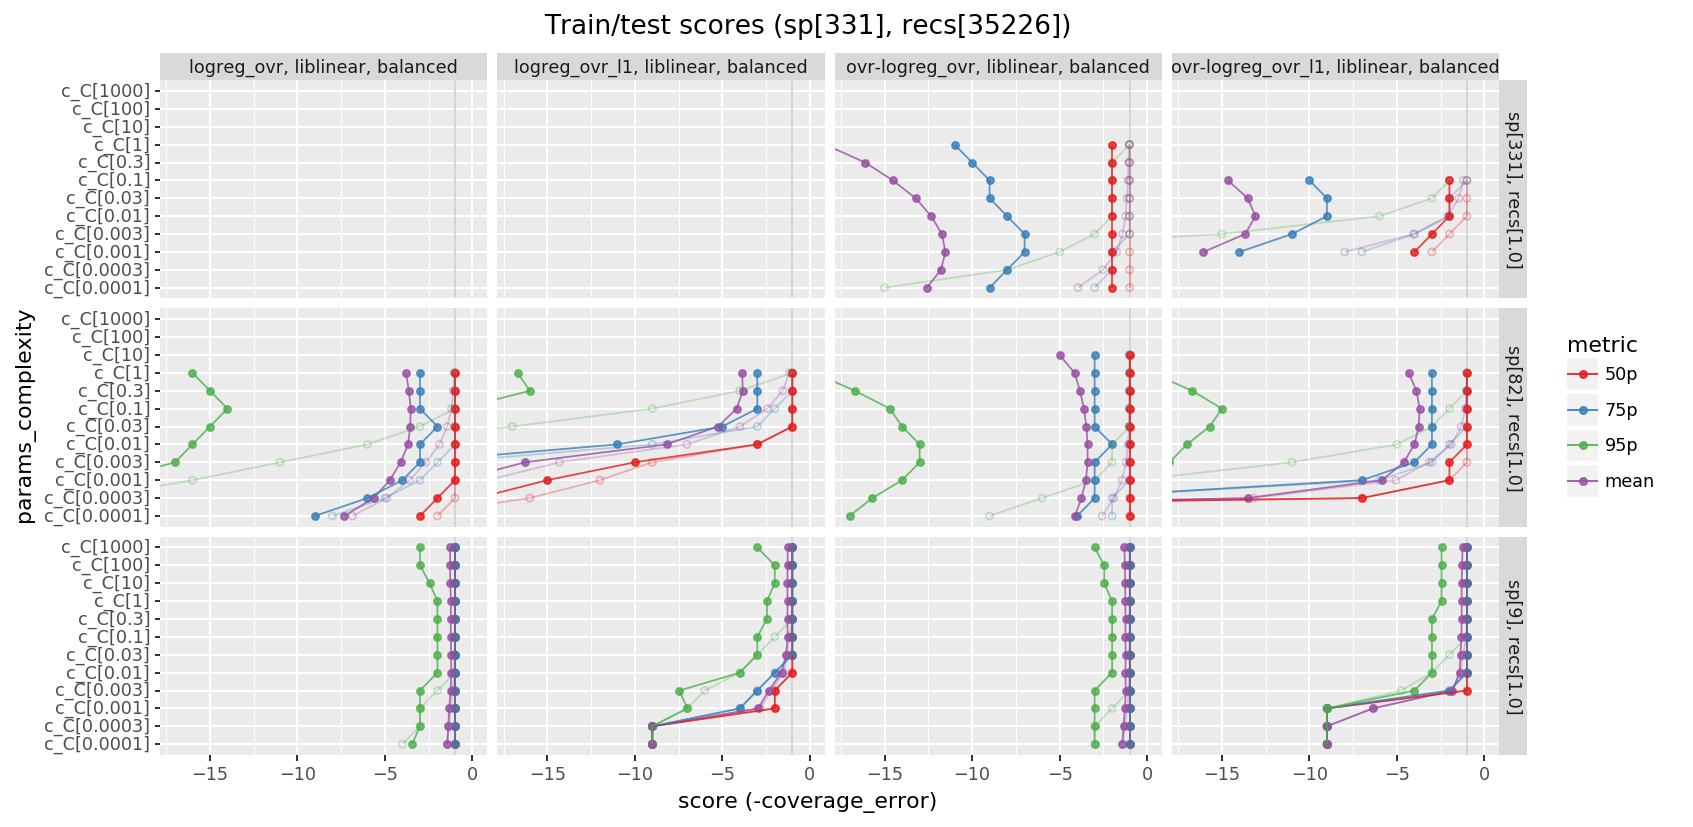

<ggplot: (-9223363292571446012)>

In [ ]:
# Train/test scores
#   - Grain: models x {train,test}
#   - Metrics: score
#   - Dims: group, params
metrics = [
    'train_mean_score', 'test_mean_score',
    'train_50p_score', 'test_50p_score',
    'train_75p_score', 'test_75p_score',
    'train_95p_score', 'test_95p_score',
]
(cv_models
    .pipe(df_reverse_cat, 'params_complexity')
    .pipe(lambda df: pd.melt(df,
        id_vars=[
            'params', 'params_data', 'params_model', 'params_complexity',
            'params_data_and_model', 'params_model_and_complexity',
            'n_species', 'n_recs',
            'fold',
        ],
        value_vars=metrics,
        var_name='split_metric',
        value_name='score'),
    )
    .assign(
        split_metric=lambda df: df.split_metric.str.replace('_score', ''),
        split=lambda df: df.split_metric.str.split('_').str[0],
        metric=lambda df: df.split_metric.str.split('_').str[1],
        group=lambda df: df.params_complexity.str.cat(df.split_metric, '/'),
    )
    .pipe(df_ordered_cat,
        split_metric=[strip_endswith(x, '_score') for x in metrics],
        group=lambda df: reversed(df.group.unique()),
    )
    .pipe(lambda df: (df
        .pipe(ggplot)
        + aes(x='params_complexity')
        + aes(y='score')
        + aes(color='metric')
        # + facet_grid('params_data ~ params_model')
        + facet + theme_
        + geom_hline(yintercept=-1, color='lightgrey')  # -1 is the max score (1 is the min coverage_error)
        + geom_point(df[df.split == 'train'], alpha=.3, fill='none')
        + geom_point(df[df.split == 'test'], alpha=.8)
        + geom_line(df[df.split == 'train'], alpha=.3, mapping=aes(group='split_metric', color='metric'))
        + geom_line(df[df.split == 'test'], alpha=.8, mapping=aes(group='split_metric', color='metric'))
        # TODO How to manually add a legend that shows test:filled, train:unfilled?
        # + geom_jitter(fill='none', size=3, height=1e-9, width=.05)
        # + geom_count(aes(size='..n..')) + scale_size_area()
        # + stat_summary(aes(group='group'), fun_data='mean_cl_boot', random_state=0, geom='errorbar')
        + coord_flip(
            ylim=(-17, 0),
        )
        # + scale_y_continuous(breaks=np.arange(-10, 0))  # TODO TODO XXX
        + scale_color_cmap_d('Set1')
        + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
        + ylab('score (-coverage_error)')
        + ggtitle(f'Train/test scores ({recs_stats})')
    ))
)

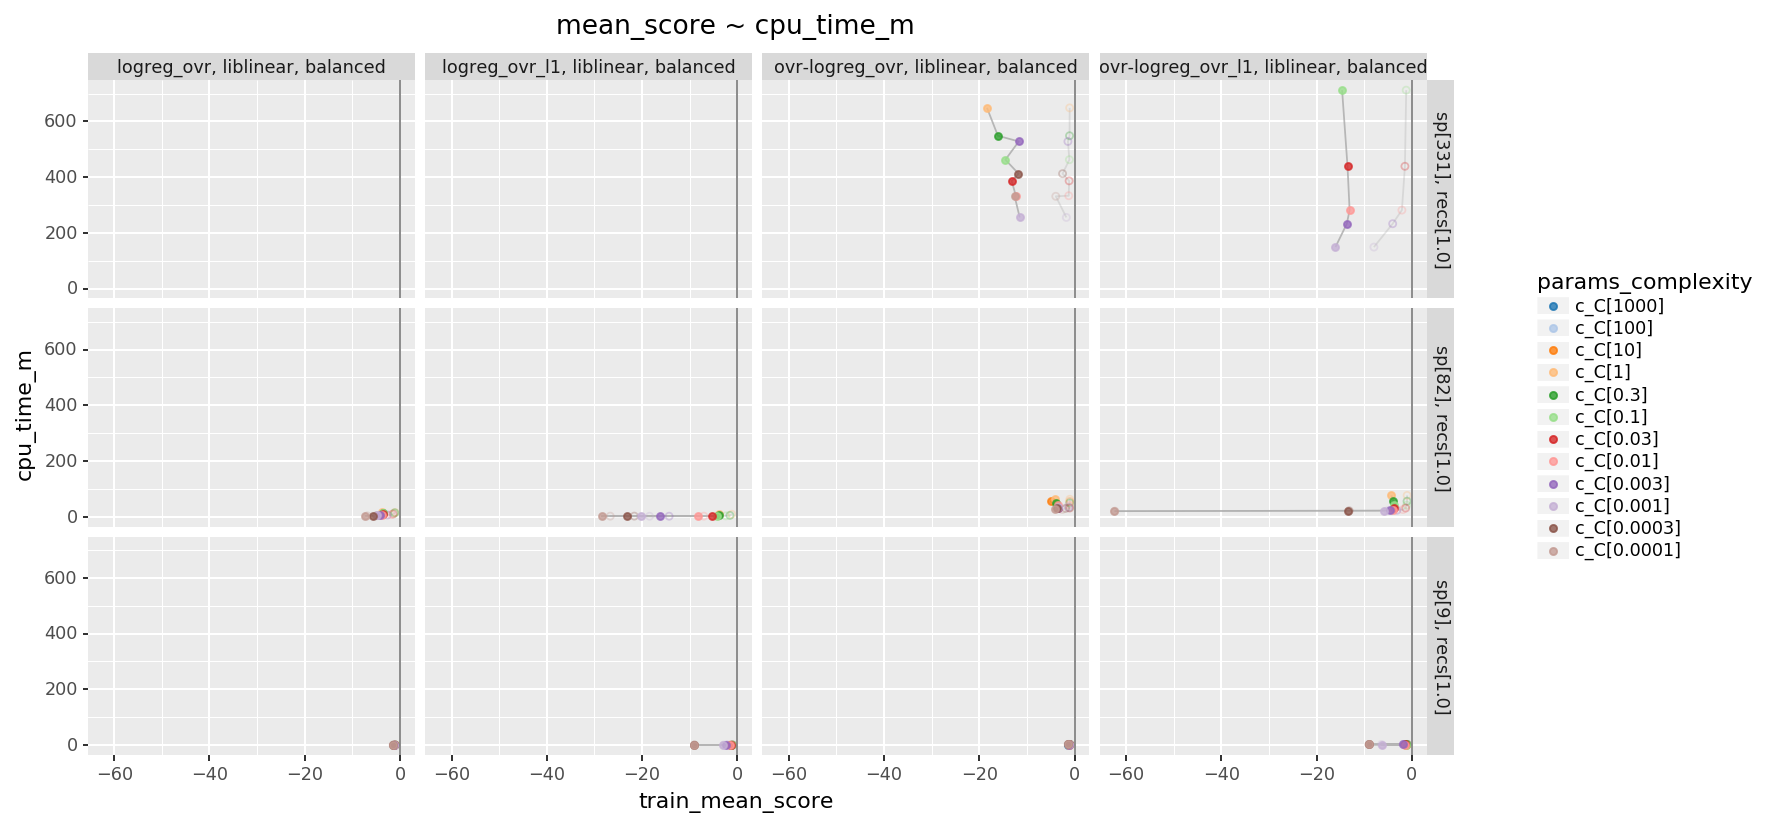

<ggplot: (-9223363292731332734)>

In [ ]:
(cv_models
    .pipe(ggplot)
    + aes(x='cpu_time_m')
    + aes(color='params_complexity')
    + facet + theme_
    + geom_line(aes(y='train_mean_score'), alpha=.3, color='darkgray')
    + geom_line(aes(y='test_mean_score'), alpha=.8, color='darkgray')
    + geom_point(aes(y='train_mean_score'), alpha=.3, fill='none')
    + geom_point(aes(y='test_mean_score'), alpha=.8)
    + geom_hline(yintercept=0, color='grey')
    + expand_limits(x=0)
    + coord_flip(
        # + ylim(-30, 0)
    )
    + scale_color_cmap_d(mpl_cmap_concat('tab20', 'tab20b', 'tab20c'))
    + guides(color=guide_legend(ncol=1)) + theme(legend_position='right', legend_box_spacing=.4, legend_key_height=8)
    + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
    + ggtitle('mean_score ~ cpu_time_m')
)

In [ ]:
(cv_models
    .pipe(ggplot)
    + aes(x='cpu_time_m')
    + aes(color='params_complexity')
    + facet + theme_
    + geom_line(aes(y='train_75p_score'), alpha=.3, color='darkgray')
    + geom_line(aes(y='test_75p_score'), alpha=.8, color='darkgray')
    + geom_point(aes(y='train_75p_score'), alpha=.3, fill='none')
    + geom_point(aes(y='test_75p_score'), alpha=.8)
    + geom_hline(yintercept=0, color='grey')
    + expand_limits(x=0)
    + coord_flip(
        # + ylim(-30, 0)
    )
    + scale_color_cmap_d(mpl_cmap_concat('tab20', 'tab20b', 'tab20c'))
    + guides(color=guide_legend(ncol=1)) + theme(legend_position='right', legend_box_spacing=.4, legend_key_height=8)
    + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
    + ggtitle('75p_score ~ cpu_time_m')
)

[skip]

In [ ]:
(cv_models
    .pipe(ggplot)
    + aes(x='model_size')
    + aes(color='params_complexity')
    + facet + theme_
    + geom_line(aes(y='train_75p_score'), alpha=.3, color='darkgray')
    + geom_line(aes(y='test_75p_score'), alpha=.8, color='darkgray')
    + geom_point(aes(y='train_75p_score'), alpha=.3, fill='none')
    + geom_point(aes(y='test_75p_score'), alpha=.8)
    + geom_hline(yintercept=0, color='grey')
    + scale_x_continuous(labels=labels_bytes(), breaks=breaks_bytes())
    + expand_limits(x=0)
    + coord_flip(
        # + ylim(-30, 0)
    )
    + scale_color_cmap_d(mpl_cmap_concat('tab20', 'tab20b', 'tab20c'))
    + guides(color=guide_legend(ncol=1)) + theme(legend_position='right', legend_box_spacing=.4, legend_key_height=8)
    + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
    + ggtitle('test_75p_score ~ model_size')
)

[skip]

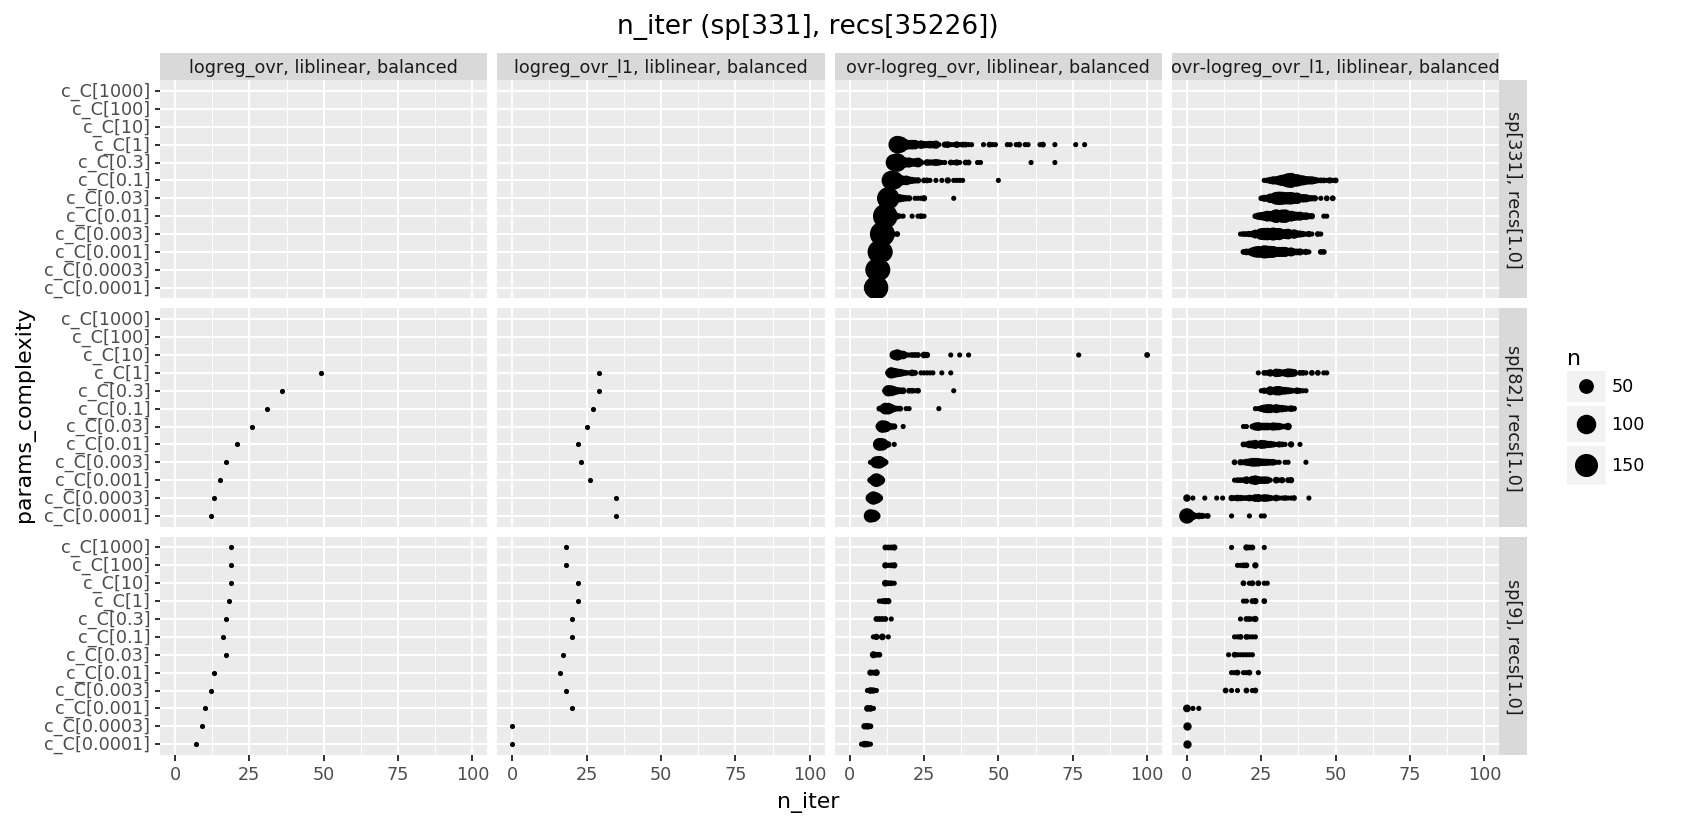

<ggplot: (-9223363292556076691)>

In [ ]:
# Tune n_iter
(cv_models
    .merge(how='left', on='model_id', right=df_flatmap(cv_models, lambda row: (
        dict(model_id=row.model_id, n_iter=n_iter)
        for n_iter in coalesce(row.n_iters, [0])
    )))
    # Manually compute y.mean() per group
    # .groupby('params').apply(lambda g: g.assign(cpu_time_m_mean=lambda df: df.cpu_time_m.mean()))
    .pipe(df_reverse_cat, 'params_complexity')
    .pipe(ggplot)
    + aes(x='params_complexity')
    + facet + theme_
    + geom_count(aes(y='n_iter', size='..n..')) + scale_size_area()
    + expand_limits(y=0)
    + coord_flip(
        ylim=(0, 100),  # TODO
    )
    + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
    + ggtitle(f'n_iter ({recs_stats})')
)

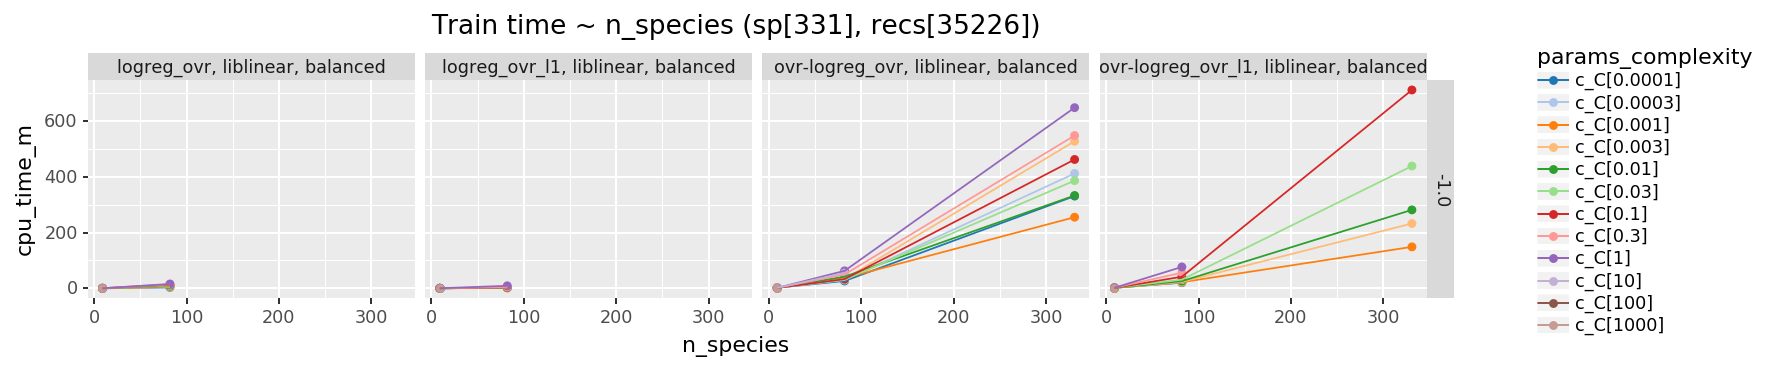

<ggplot: (-9223363292532308080)>

In [ ]:
# Train time ~ n_species
(cv_models
    .pipe(df_reverse_cat, 'params_complexity')
    .pipe(ggplot)
    + facet_grid('-n_recs ~ params_model')
    + aes(color='params_complexity')
    + aes(x='n_species', y='cpu_time_m')
    + geom_point()
    + geom_line()
    + scale_color_cmap_d(mpl_cmap_concat('tab20', 'tab20b', 'tab20c'))
    + guides(color=guide_legend(ncol=1)) + theme(legend_position='right', legend_box_spacing=.4, legend_key_height=8)
    + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
    + ggtitle(f'Train time ~ n_species ({recs_stats})')
)

/opt/conda/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:81: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "
/opt/conda/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:81: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "
/opt/conda/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:81: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "
/opt/conda/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:81: UserWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
  warn("geom_path: Each group consist of only one "
/opt/conda/lib/python3.6/site-packages/plotnine/geoms/geom_path.

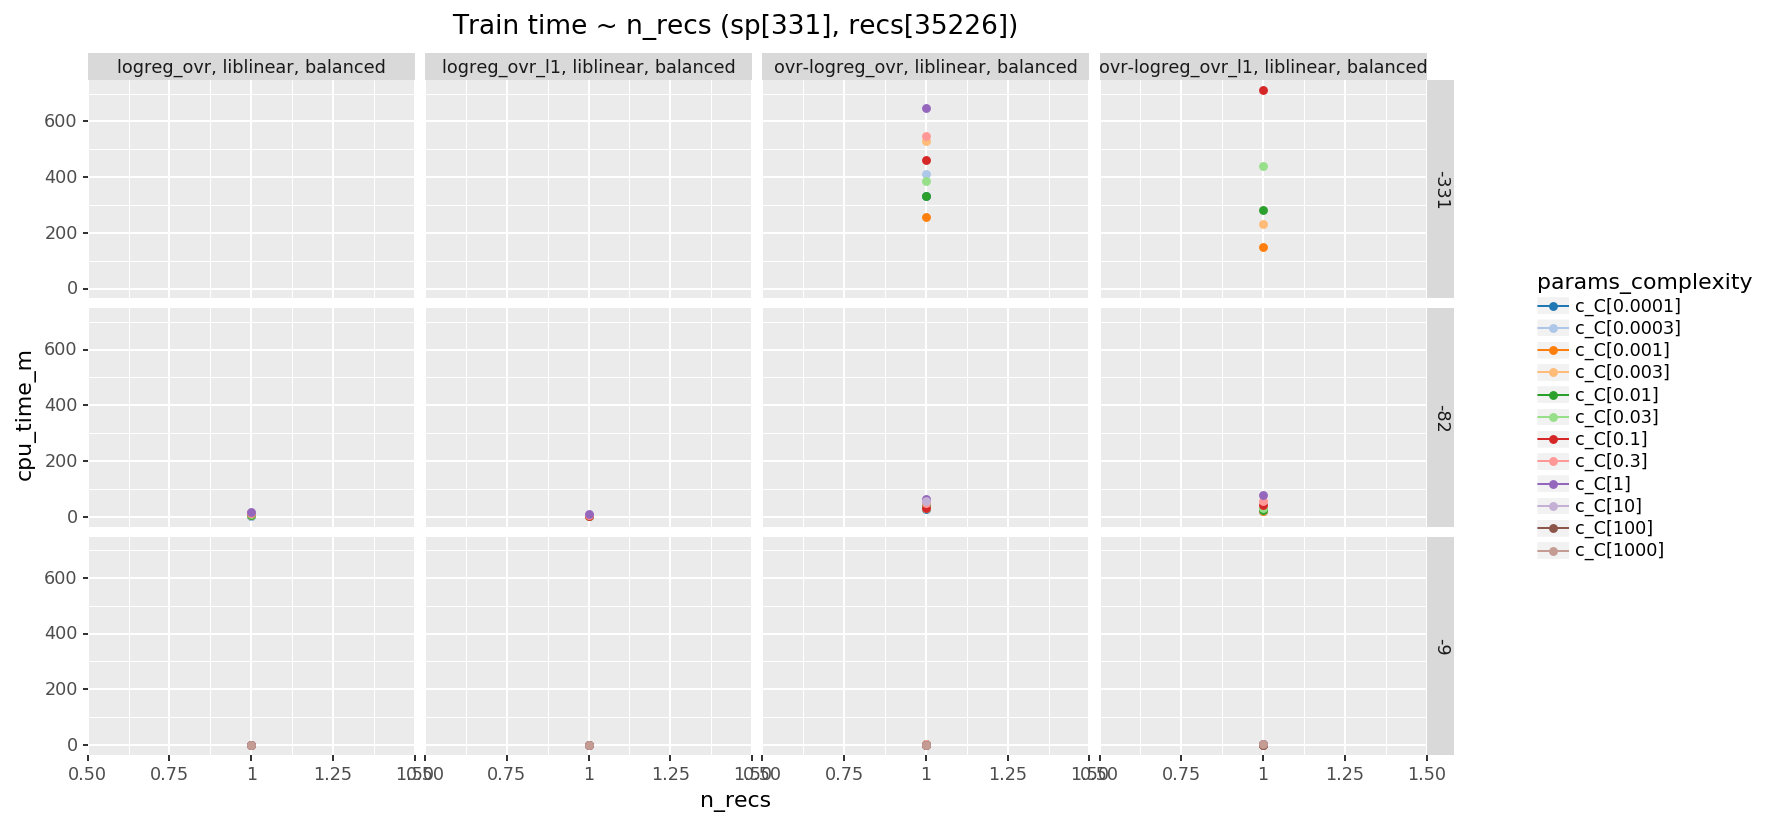

<ggplot: (-9223363292561282216)>

In [ ]:
# Train time ~ n_recs
(cv_models
    .pipe(df_reverse_cat, 'params_complexity')
    .pipe(ggplot)
    + facet_grid('-n_species ~ params_model')
    + aes(color='params_complexity')
    + aes(x='n_recs', y='cpu_time_m')
    + geom_point()
    + geom_line()
    + scale_color_cmap_d(mpl_cmap_concat('tab20', 'tab20b', 'tab20c'))
    + guides(color=guide_legend(ncol=1)) + theme(legend_position='right', legend_box_spacing=.4, legend_key_height=8)
    + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
    + ggtitle(f'Train time ~ n_recs ({recs_stats})')
)

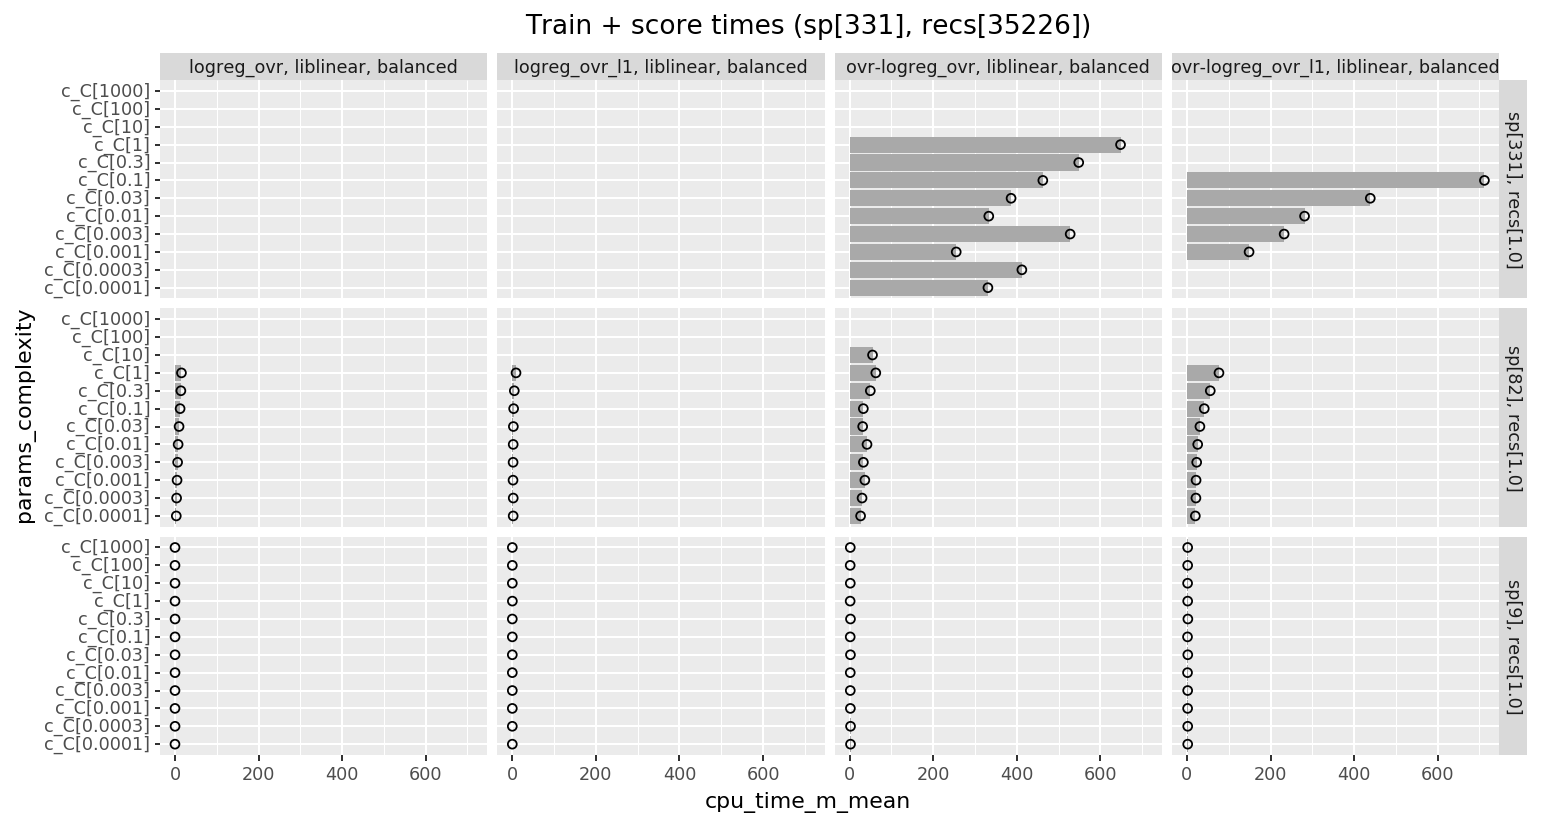

<ggplot: (8744298854250)>

In [ ]:
(cv_models
    # Manually compute y.mean() per group
    .groupby('params').apply(lambda g: g.assign(cpu_time_m_mean=lambda df: df.cpu_time_m.mean()))
    .pipe(df_reverse_cat, 'params_complexity')
    .pipe(ggplot)
    + aes(x='params_complexity')
    + facet + theme_
    + geom_col(aes(y='cpu_time_m_mean'), fill='darkgray', position=position_dodge())
    + geom_point(aes(y='cpu_time_m'), color='black', fill='none', size=2)
    + coord_flip()
    + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
    + ggtitle(f'Train + score times ({recs_stats})')
)

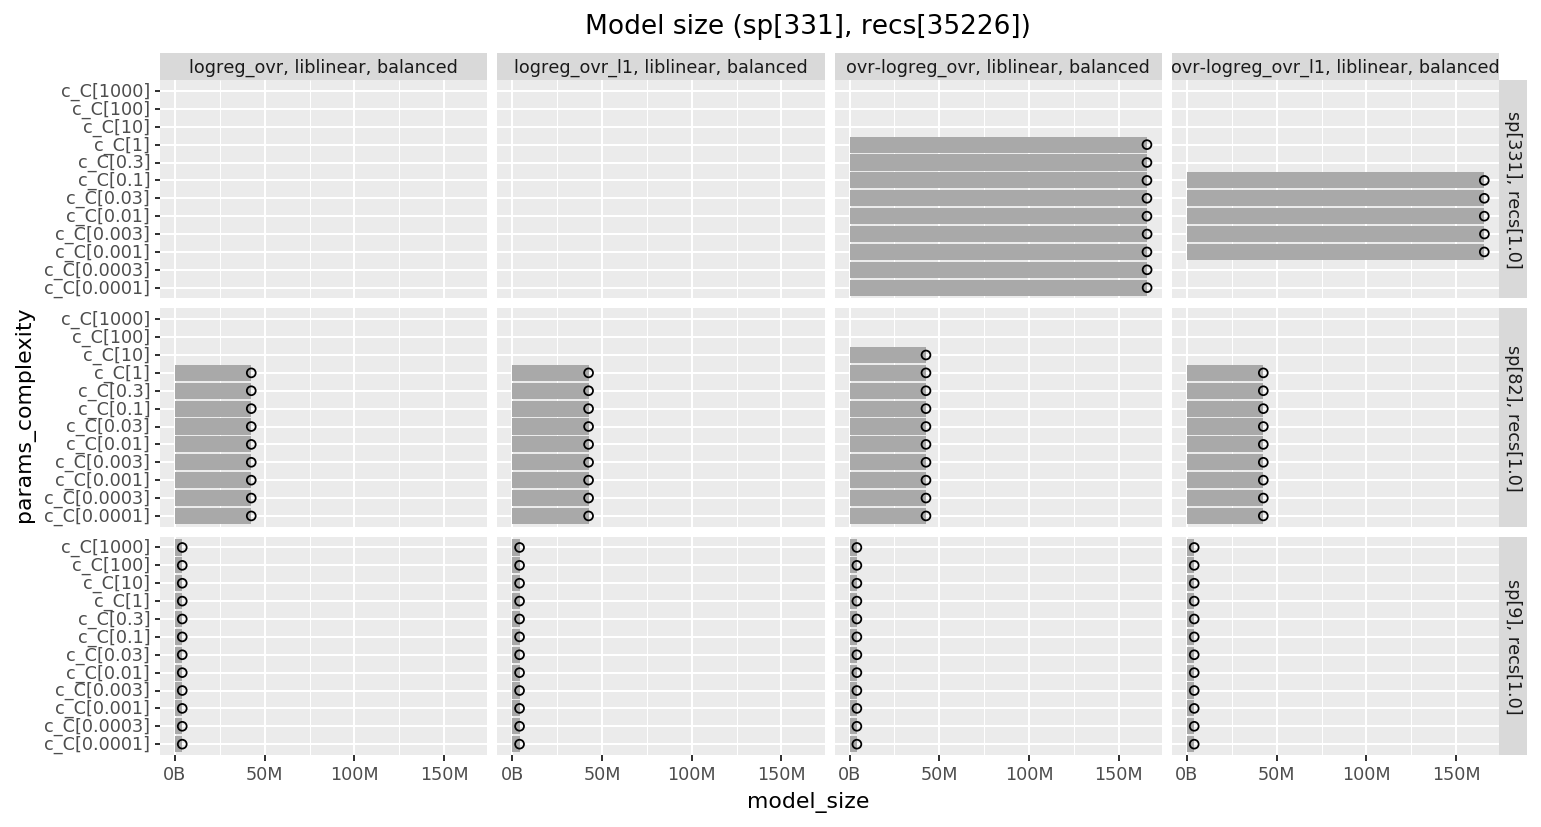

<ggplot: (8744293488304)>

In [ ]:
(cv_models
    # Manually compute y.mean() per group
    .groupby('params').apply(lambda g: g.assign(model_size_mean=lambda df: df.model_size.mean()))
    .pipe(df_reverse_cat, 'params_complexity')
    .pipe(ggplot)
    + aes(x='params_complexity')
    + facet + theme_
    + geom_col(aes(y='model_size_mean'), fill='darkgray', position=position_dodge()) # Summary per fold
    + geom_point(aes(y='model_size'), color='black', fill='none', size=2) # Distribution of folds
    + scale_y_continuous(labels=labels_bytes(), breaks=breaks_bytes())
    + coord_flip()
    + ylab('model_size')
    + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
    + ggtitle(f'Model size ({recs_stats})')
)

In [ ]:
# TODO Make not barf on non-tree models (blocks rest of notebook)
(cv_models
    # Manually compute boxplot stats, else it's _really_ slow (or you have to downsample, which misses outliers)
    #   - Based on stat_boxplot.compute_group
    .merge(how='left', on='params', right=cv_models.groupby('params').apply(lambda g: one(
        pd.Series(dict(
            params=g.name,
            ymin=boxplot['whislo'],
            lower=boxplot['q1'],
            middle=boxplot['med'],
            upper=boxplot['q3'],
            ymax=boxplot['whishi'],
            outliers=np.unique(boxplot['fliers']),  # np.unique else really slow, because lots of repeated (int) points
        ))
        for [boxplot] in [mpl.cbook.boxplot_stats(  # [boxplot] is 1 elem because X.ndim = 1
            X=np.concatenate([[] if x is None else x.depth for x in g.model_stats]),
            whis=1.5,
        )]
    )))
    .pipe(df_reverse_cat, 'params_complexity')
    .pipe(ggplot)
    + aes(x='params_complexity')
    + facet + theme_
    + geom_boxplot(
        stat='identity',
        outlier_size=.5,
        mapping=aes(ymin='ymin', ymax='ymax', upper='upper', lower='lower', middle='middle', outliers='outliers',
            width=.8,  # Close enough to geom_boxplot defaults [TODO Maybe should compute based on num categorical x's?]
        ),
    )
    + ylab('tree_depth')
    + coord_flip()
    + theme_figsize(width=figsize_width, aspect_ratio=1/1.5)
    + ggtitle(f'Tree depth ({recs_stats})')
)

[skip]

In [ ]:
# SLOW_PLOTS_NEXT

# Model diagnostics: all models, all folds

In [ ]:
print('models:')
print('  params[*/%s]' % len(cv_models.params.cat.categories))
print('  fold[*/%s]' % cv.cv.n_splits)

models:
  params[*/99]
  fold[*/1]


In [ ]:
# TODO Cache
# Coverage errors: all models, all folds
#   - Subset: all models
#   - Grain: sum(recs[model.test_i] for model)
#   - Dims: model_id, params, fold, y_true, rec_id
#   - Metrics: coverage_error
coverage_errors_all_all = (cv_models
    # .sample(n=5, random_state=0)  # For faster dev
    .pipe(lambda df: DF(
        OrderedDict(
            # **row[['model_id', 'params', 'fold']],  # Slow (in this inner loop), unpack manually instead
            model_id=row.model_id,
            params=row.params,
            params_data=row.params_data,
            params_model=row.params_model,
            params_complexity=row.params_complexity,
            params_data_and_model=row.params_data_and_model,
            params_model_and_complexity=row.params_model_and_complexity,
            fold=row.fold,
            i=i,
            y_true=y_true,
            coverage_error=coverage_error,
        )
        for row in iter_progress(df_rows(df), n=len(df))
        for i, y_true, coverage_error in zip(
            row.test_evals.i,
            row.test_evals.y,
            row.test_evals.coverage_errors(),
        )
    ))
    .astype(dict(
        model_id=cv_models.model_id.dtype,
        params=cv_models.params.dtype,
        params_data=cv_models.params_data.dtype,
        params_model=cv_models.params_model.dtype,
        params_complexity=cv_models.params_complexity.dtype,
        params_data_and_model=cv_models.params_data_and_model.dtype,
        params_model_and_complexity=cv_models.params_model_and_complexity.dtype,
    ))
    .pipe(tap, lambda df: display(
        df_summary(df).T,
        df[:10],
    ))
)

  0%|                                                                                                        | 0/99 [00:00<?, ?it/s]

  6%|█████▊                                                                                          | 6/99 [00:00<00:01, 57.02it/s]

 12%|███████████▌                                                                                   | 12/99 [00:00<00:01, 57.54it/s]

 18%|█████████████████▎                                                                             | 18/99 [00:00<00:01, 57.50it/s]

 24%|███████████████████████                                                                        | 24/99 [00:00<00:01, 57.74it/s]

 30%|████████████████████████████▊                                                                  | 30/99 [00:00<00:01, 57.82it/s]

 36%|██████████████████████████████████▌                                                            | 36/99 [00:00<00:01, 57.89it/s]

 42%|████████████████████████████████████████▎                                                      | 42/99 [00:00<00:00, 57.68it/s]

 48%|██████████████████████████████████████████████                                                 | 48/99 [00:00<00:00, 57.78it/s]

 55%|███████████████████████████████████████████████████▊                                           | 54/99 [00:01<00:01, 28.53it/s]

 59%|███████████████████████████████████████████████████████▋                                       | 58/99 [00:02<00:01, 22.25it/s]

 62%|██████████████████████████████████████████████████████████▌                                    | 61/99 [00:03<00:01, 19.45it/s]

 65%|█████████████████████████████████████████████████████████████▍                                 | 64/99 [00:03<00:02, 17.38it/s]

 67%|███████████████████████████████████████████████████████████████▎                               | 66/99 [00:04<00:02, 16.32it/s]

 69%|█████████████████████████████████████████████████████████████████▎                             | 68/99 [00:04<00:02, 15.44it/s]

 71%|███████████████████████████████████████████████████████████████████▏                           | 70/99 [00:04<00:01, 14.66it/s]

 72%|████████████████████████████████████████████████████████████████████▏                          | 71/99 [00:04<00:01, 14.32it/s]

 73%|█████████████████████████████████████████████████████████████████████                          | 72/99 [00:05<00:01, 14.01it/s]

 74%|██████████████████████████████████████████████████████████████████████                         | 73/99 [00:05<00:01, 13.72it/s]

 75%|███████████████████████████████████████████████████████████████████████                        | 74/99 [00:05<00:01, 13.45it/s]

 76%|███████████████████████████████████████████████████████████████████████▉                       | 75/99 [00:05<00:01, 13.19it/s]

 77%|████████████████████████████████████████████████████████████████████████▉                      | 76/99 [00:05<00:01, 12.95it/s]

 78%|█████████████████████████████████████████████████████████████████████████▉                     | 77/99 [00:06<00:01, 12.73it/s]

 79%|██████████████████████████████████████████████████████████████████████████▊                    | 78/99 [00:06<00:01, 12.52it/s]

 80%|███████████████████████████████████████████████████████████████████████████▊                   | 79/99 [00:06<00:01, 12.32it/s]

 81%|████████████████████████████████████████████████████████████████████████████▊                  | 80/99 [00:06<00:01, 12.13it/s]

 82%|█████████████████████████████████████████████████████████████████████████████▋                 | 81/99 [00:06<00:01, 11.96it/s]

 83%|██████████████████████████████████████████████████████████████████████████████▋                | 82/99 [00:06<00:01, 11.79it/s]

 84%|███████████████████████████████████████████████████████████████████████████████▋               | 83/99 [00:07<00:01, 11.63it/s]

 85%|████████████████████████████████████████████████████████████████████████████████▌              | 84/99 [00:07<00:01, 11.48it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████▌             | 85/99 [00:07<00:01, 11.33it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████▌            | 86/99 [00:08<00:01, 10.40it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████▍           | 87/99 [00:09<00:01,  9.64it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████▍          | 88/99 [00:09<00:01,  8.98it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████▍         | 89/99 [00:10<00:01,  8.42it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████▎        | 90/99 [00:11<00:01,  7.94it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████▎       | 91/99 [00:12<00:01,  7.52it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████▎      | 92/99 [00:12<00:00,  7.14it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████▏     | 93/99 [00:13<00:00,  6.81it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████▏    | 94/99 [00:14<00:00,  6.40it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████▏   | 95/99 [00:15<00:00,  6.15it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████   | 96/99 [00:16<00:00,  5.92it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████  | 97/99 [00:16<00:00,  5.71it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████ | 98/99 [00:17<00:00,  5.52it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:18<00:00,  5.34it/s]

min  \
                            dtype    sizeof   len    count  nunique mean      std                                                                                                                        
model_id                    category 28315516 173703 173703 99      NaN       NaN        n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
params                      category 26752189 173703 173703 99      NaN       NaN                 n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]   
params_data                 category 11554730 173703 173703 3       NaN       NaN                                                                                                   sp[331], recs[1.0]   
params_model                category 14660028 173703 173703 4       NaN       NaN                                                                                      logreg_ovr, liblinear, balanced   
params_complexity           category 10091096 173703 173703 12      NaN       NaN                                                                                                            c_C[1000]   
params_data_and_model       category 17877014 173703 173703 10      NaN       NaN                                                              sp[331], recs[1.0]\novr-logreg_ovr, liblinear, balanced   
params_model_and_complexity category 16413380 173703 173703 48      NaN       NaN                                                                           logreg_ovr, liblinear, balanced\nc_C[1000]   
fold                        int64    4168872  173703 173703 1       0.000     0.000                                                                                                                  0   
i                           int64    4863684  173703 173703 7042    17581.391 10162.320                                                                                                              6   
y_true                      object   14764857 173703 173703 329     NaN       NaN                                                                                                                 ABTO   
coverage_error              float64  4168872  173703 173703 329     11.031    27.064                                                                                                                 1   

                                                                                                                                                                                                         25%  \
                            dtype    sizeof   len    count  nunique mean      std                                                                                                                              
model_id                    category 28315516 173703 173703 99      NaN       NaN        n_species[82], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.0003],c_class_weight[balanced], fold[0]   
params                      category 26752189 173703 173703 99      NaN       NaN                 n_species[82], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.0003],c_class_weight[balanced]   
params_data                 category 11554730 173703 173703 3       NaN       NaN                                                                                                         sp[331], recs[1.0]   
params_model                category 14660028 173703 173703 4       NaN       NaN                                                                                        ovr-logreg_ovr, liblinear, balanced   
params_complexity           category 10091096 173703 173703 12      NaN       NaN                                                                                                                   c_C[0.1]   
params_data_and_model       category 17877014 173703 173703 10      NaN       NaN                               

model_id  \
0  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
1  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
2  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
3  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
4  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
5  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
6  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
7  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
8  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   
9  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced], fold[0]   

                                                                                                 params       params_data  \
0  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   
1  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   
2  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   
3  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   
4  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   
5  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   
6  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   
7  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   
8  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   
9  n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]  sp[9], recs[1.0]   

                      params_model params_complexity                              params_data_and_model  \
0  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   
1  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   
2  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   
3  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   
4  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   
5  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   
6  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   
7  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   
8  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   
9  logreg_ovr, liblinear, balanced        c_C[0.003]  sp[9], recs[1.0]\nlogreg_ovr, liblinear, balanced   

                   params_model_and_complexity  fold      i y_true  coverage_error  
0  logreg_ovr, liblinear, balanced\nc_C[0.003]     0   1694   HOFI             1.0  
1  logreg_ovr, liblinear, balanced\nc_C[0.003]     0  33361   CAVI             2.0  
2  logreg_ovr, lib

In [ ]:
[print(x) for x in coverage_errors_all_all.params_data.unique()];
params_data = (
    'sp[331], recs[1.0]'
)
n_species = parse.search('sp[{n_species:d}], recs[{n_recs:f}]', params_data)['n_species']
assert params_data in list(coverage_errors_all_all.params_data), params_data

sp[9], recs[1.0]
sp[82], recs[1.0]
sp[331], recs[1.0]


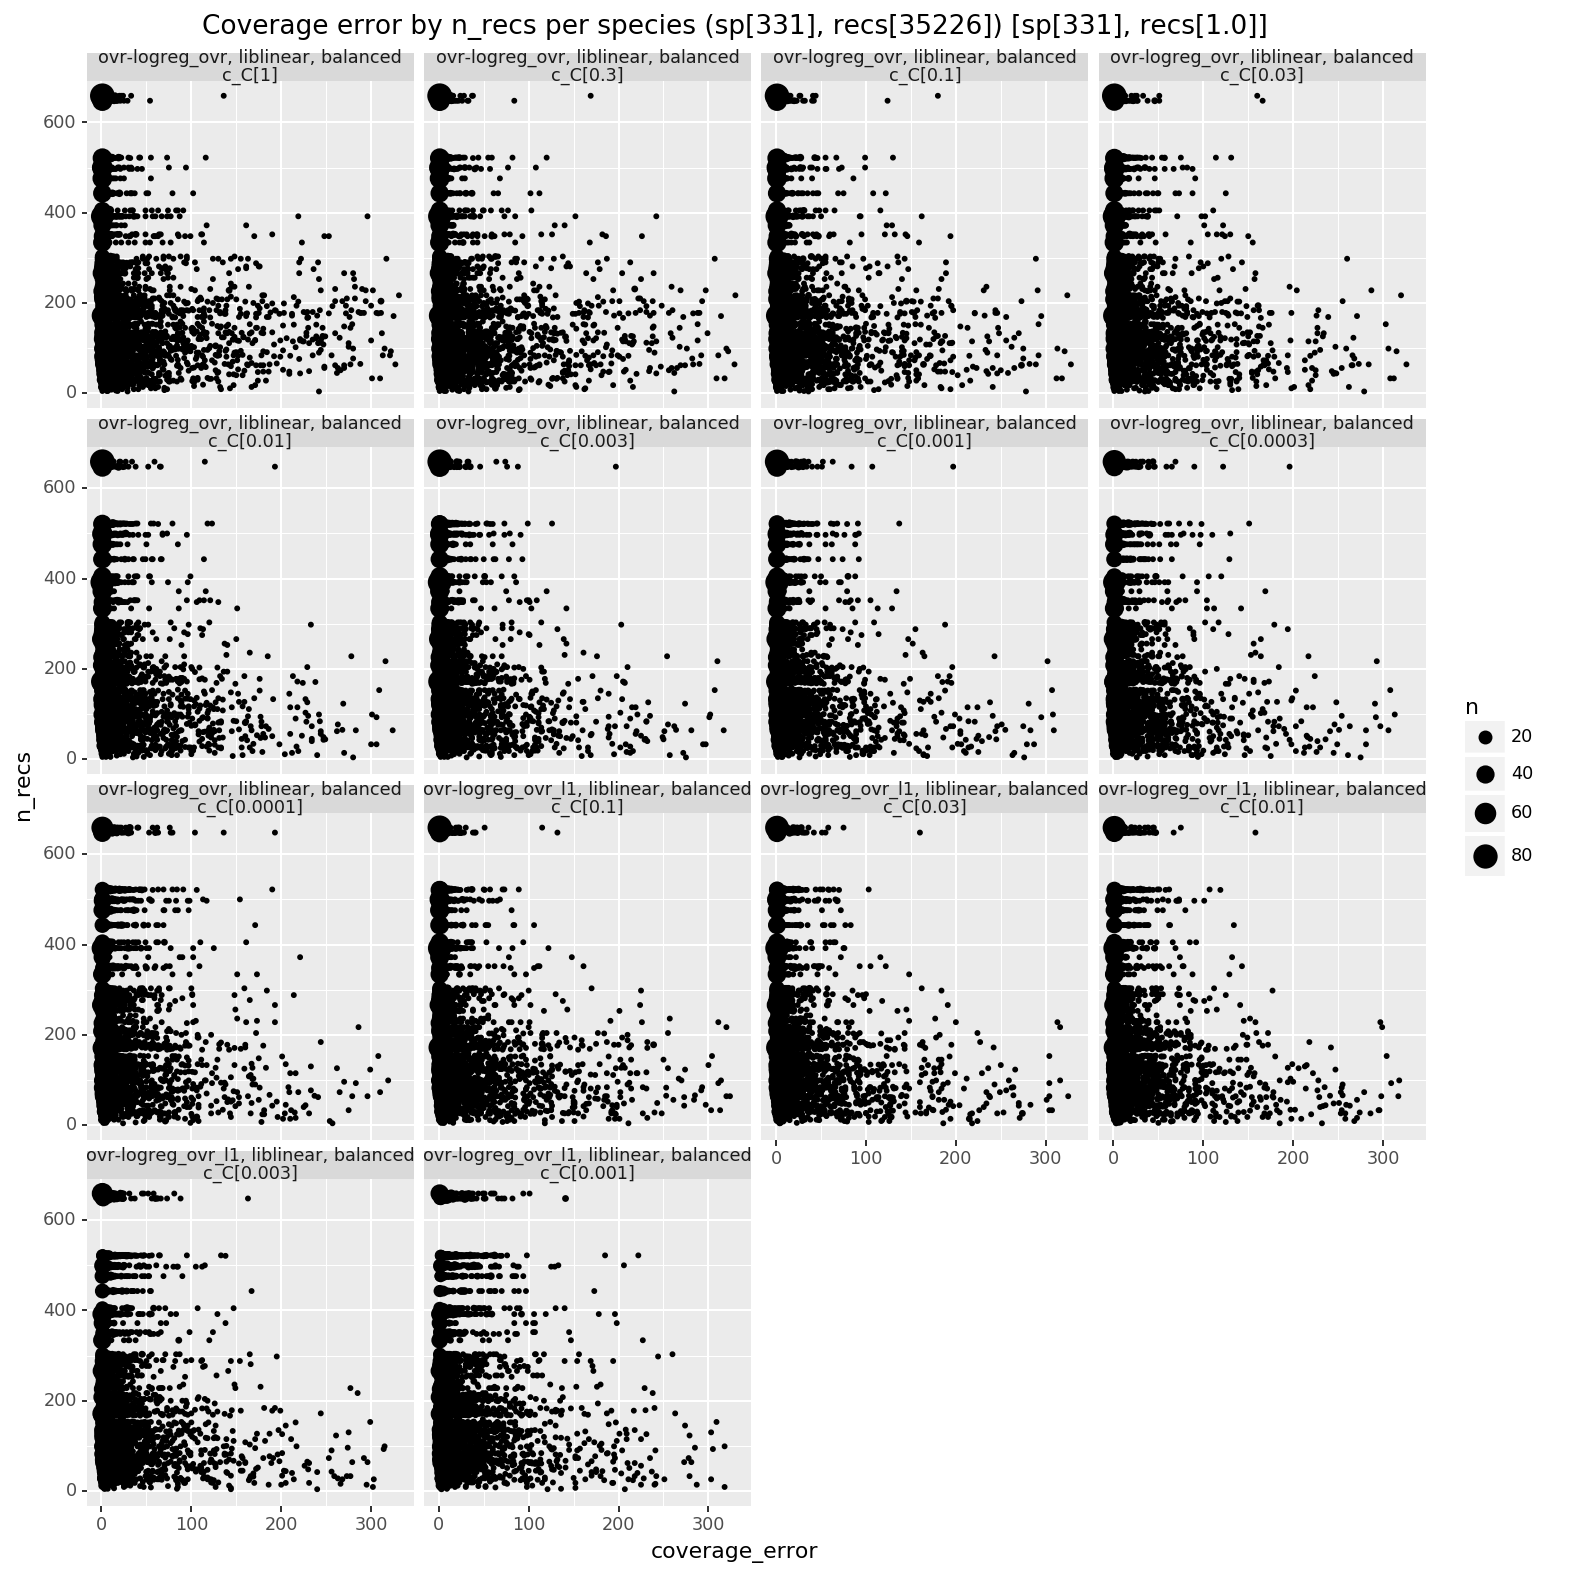

<ggplot: (-9223363278228746275)>

In [ ]:
# TODO Class imbalance
#   1. Is class imbalance causing a problem? [-> maybe]
#   2. Is class_weight solving it? [-> maybe a little bit]
#   - TODO Try again with larger class imbalance
(coverage_errors_all_all
    [lambda df: df.params_data == params_data]
    # .sample(100, random_state=0)  # Faster dev
    .merge(how='left', on='y_true', right=(recs
        .assign(n_recs=1).groupby('species')['n_recs'].sum().reset_index()
        .rename(columns={'species': 'y_true'})
    ))
    # .pipe(puts, f=lambda df: df[:3])  # XXX Debug
    .pipe(ggplot)
    # + facet_grid('params_complexity ~ params_model')
    + facet_wrap('params_model_and_complexity')
    + aes(x='n_recs', y='coverage_error')
    + geom_count(aes(size='..n..')) + scale_size_area()
    + expand_limits(x=0, y=0)
    + coord_flip()
    + theme_figsize(width=figsize_width, aspect_ratio=1/1)
    + ggtitle(rf'Coverage error by n_recs per species ({recs_stats}) [{params_data}]')
)

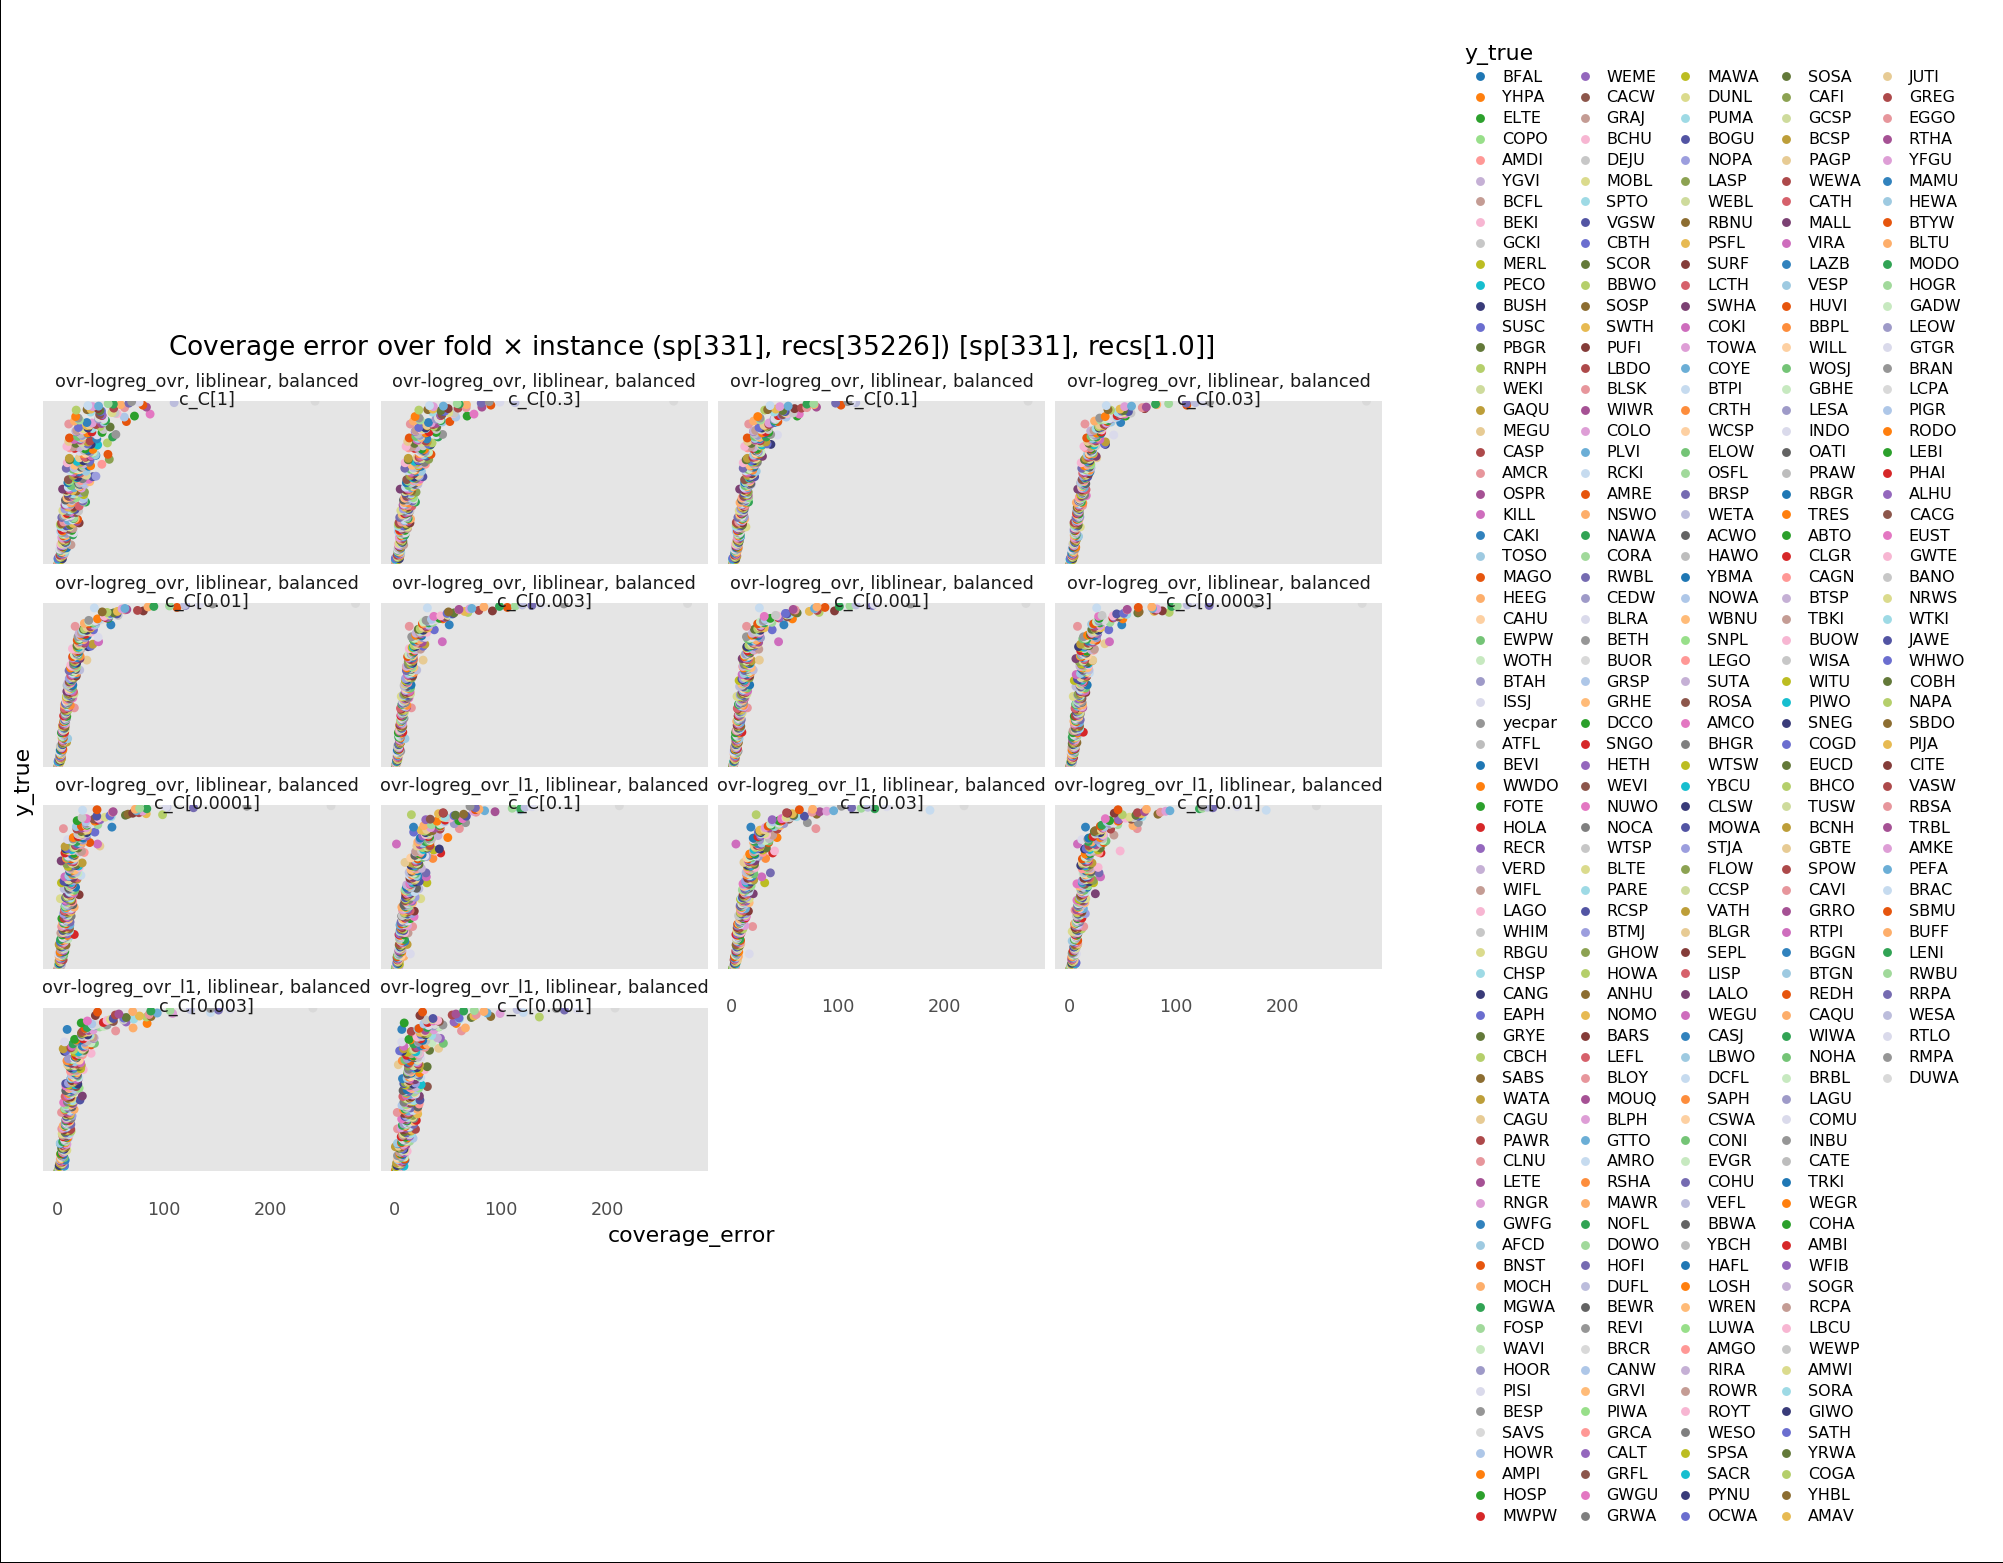

<ggplot: (-9223363278249577826)>

In [ ]:
# Facet by params_no_ns, order by mean(coverage_error)
#   - Subset: all models
#   - Grain: sum(recs[model.test_i].groupby(params, y_true) for model)
#       - Over: fold, rec_id
#   - Dims: params, y_true
#   - Metrics: coverage_error.mean
# in: coverage_errors_all_all, recs
(coverage_errors_all_all
    [lambda df: df.params_data == params_data]
    # .sample(100, random_state=0)  # Faster dev
    # .pipe(df_reverse_cat, 'params', 'params_no_ns', 'ns')
    .pipe(df_ordered_cat,
        y_true=lambda df: (
            # Sort species by mean(coverage_error) (across all models)
            df.groupby('y_true').agg({'coverage_error': np.mean}).reset_index().sort_values('coverage_error').y_true
            # Sort species by taxo (hard to compare across models, unless they're pretty low noise)
            # reversed(recs.species.cat.categories)
        ),
    )
    .pipe(ggplot)
    + aes(x='y_true', y='coverage_error')
    + aes(color='y_true')
    # + facet_grid('params_complexity ~ params_model')
    + facet_wrap('params_model_and_complexity',
        # Bug: dir='v' inverts nrow/ncol [https://github.com/has2k1/plotnine/issues/163]
        # dir='v', nrow=coverage_errors_all_all.params_model.nunique(),
    )
    # + geom_line(aes(group='params'), stat='summary', fun_y=np.mean)  # TODO Bad interpolation with n_species
    + geom_point(aes(group='params'), stat='summary', fun_y=np.mean)
    + coord_flip()
    # + geom_hline(yintercept=recs.species.nunique(), color='grey')
    + scale_color_cmap_d(mpl_cmap_repeat(10, 'tab20', 'tab20b', 'tab20c'))
    + theme_minimal_white()  # Before other theme()
    + guides(color=guide_legend(nrow=70))
    + theme(legend_position='right', legend_box_spacing=.4, legend_key_height=8, legend_text=element_text(size=8))
    + theme(axis_text_y=element_blank())
    + theme_figsize(width=figsize_width, aspect_ratio=1/2)
    + ggtitle(rf'Coverage error over fold $\times$ instance ({recs_stats}) [{params_data}]')
)

logreg_ovr, liblinear, balanced
logreg_ovr_l1, liblinear, balanced
ovr-logreg_ovr, liblinear, balanced
ovr-logreg_ovr_l1, liblinear, balanced


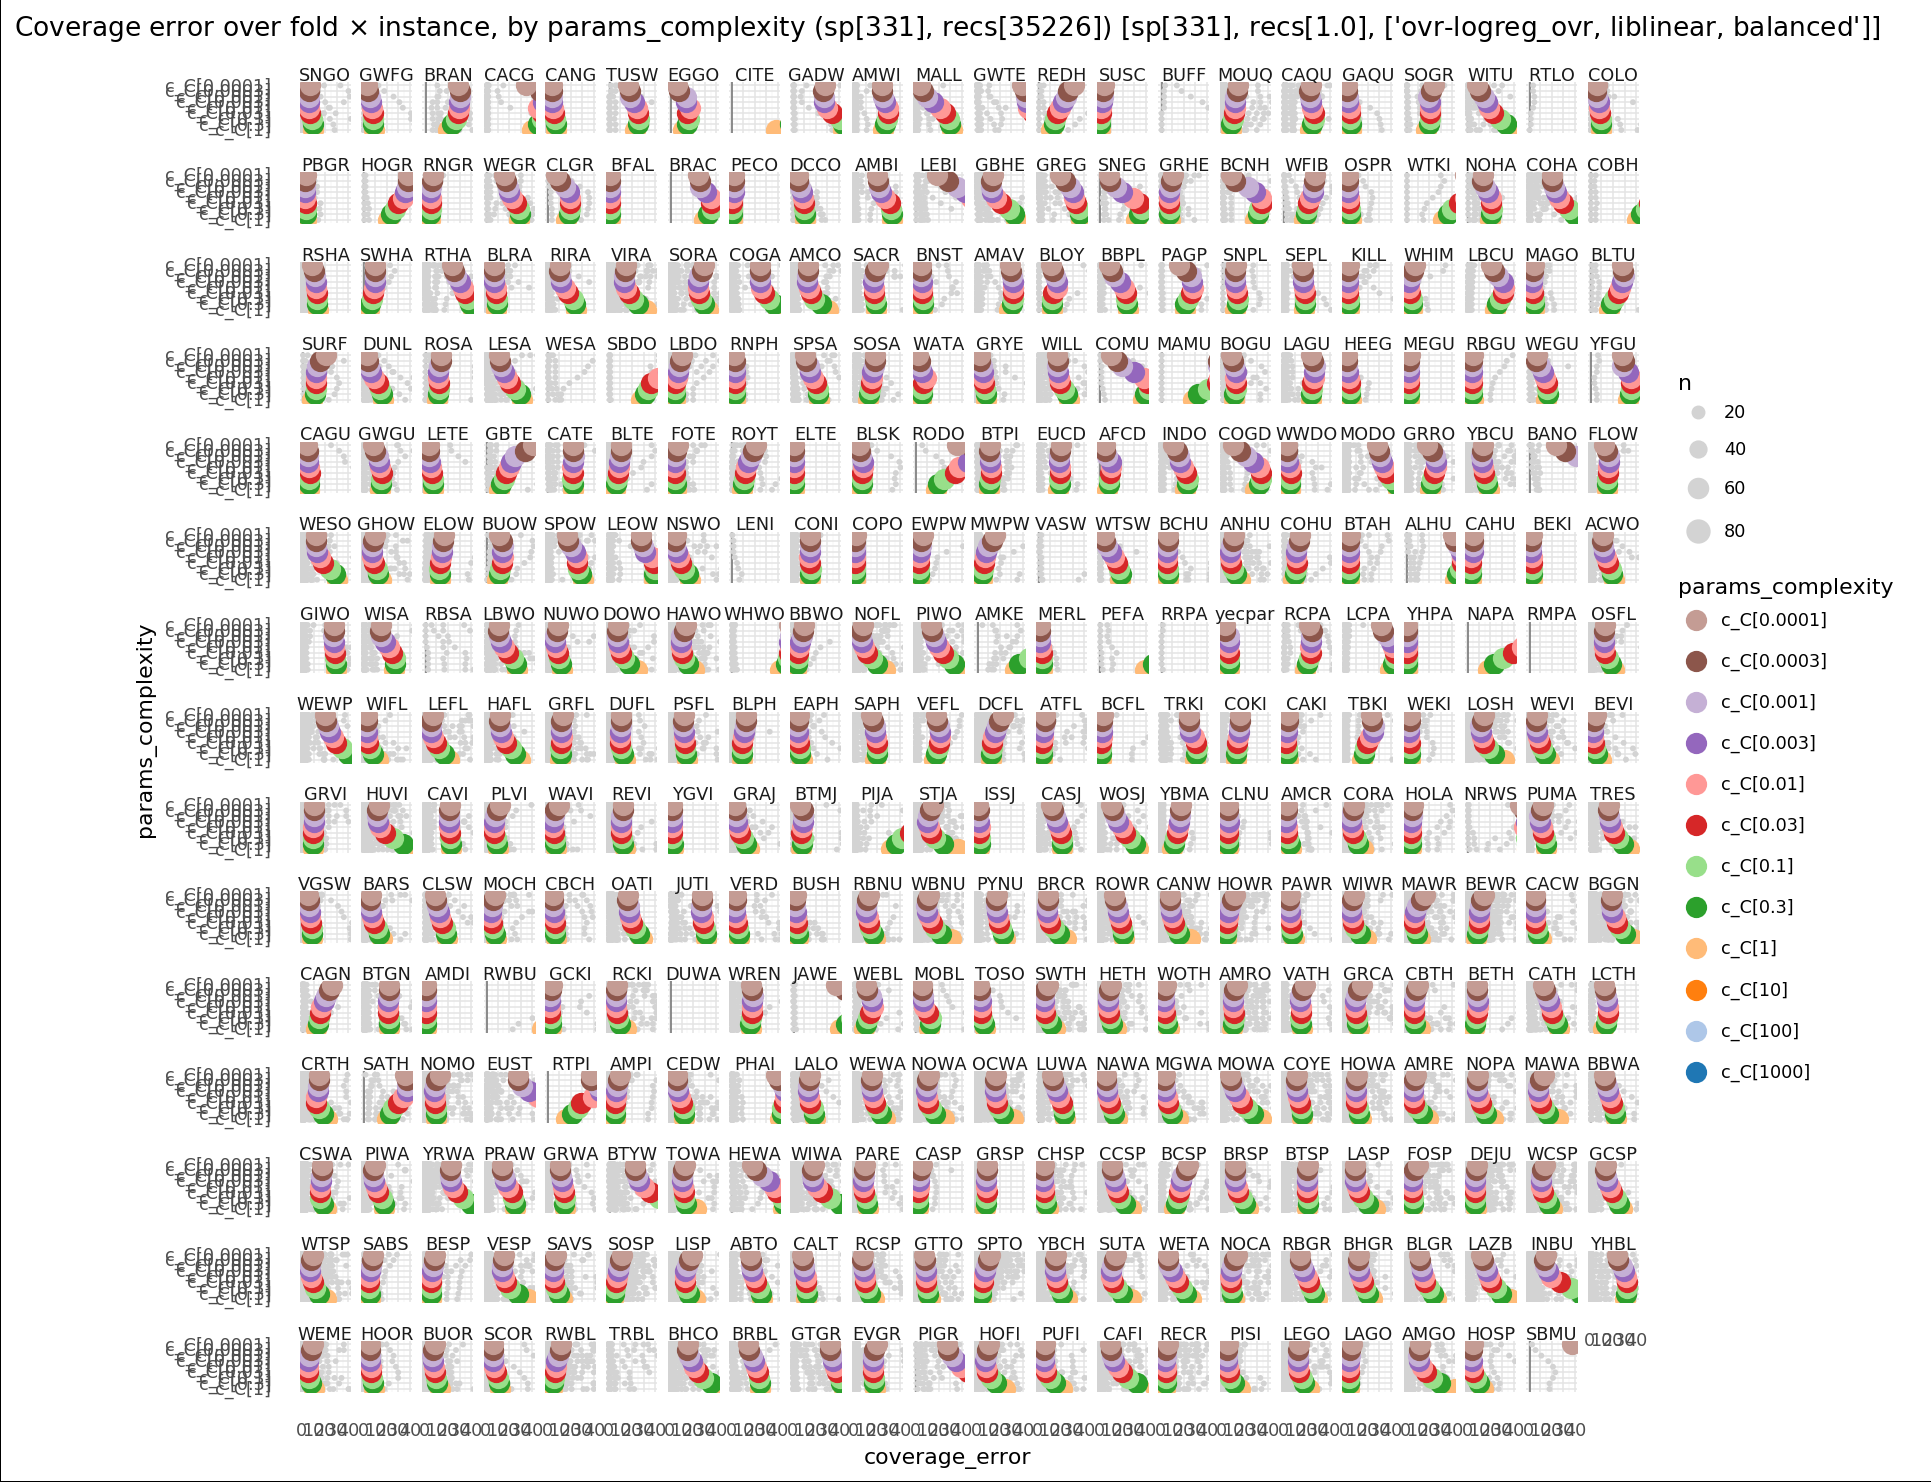

<ggplot: (-9223363278286203178)>

In [ ]:
# TODO Slow, bad for notebook dev loop -- move lower, or disable by default?
# Facet by species
#   - Subset: all models
#   - Grain: sum(recs[model.test_i].groupby(params, y_true) for model)
#       - Over: fold, rec_id
#   - Dims: params, y_true
#   - Metrics: coverage_error.mean
# in: coverage_errors_all_all, recs
[print(x) for x in coverage_errors_all_all.params_model.unique()];
params_model = [
    # 'logreg_ovr, liblinear, balanced',
    # 'logreg_ovr_l1, liblinear, balanced',
    'ovr-logreg_ovr, liblinear, balanced',
    # 'ovr-logreg_ovr_l1, liblinear, balanced',
]
(coverage_errors_all_all
    [lambda df: df.params_data == params_data]
    [lambda df: df.params_model.isin(params_model)]
    # .sample(200, random_state=0)  # Faster dev
    # [lambda df: df.y_true.isin(df.y_true.drop_duplicates().sample(n=3, random_state=0))]  # Faster dev
    .astype({'y_true': metadata.species.df.shorthand.dtype})
    # .pipe(df_reverse_cat, 'params_complexity')
    .pipe(ggplot)
    + aes(x='params_complexity', y='coverage_error')
    + aes(color='params_complexity')
    + facet_wrap('y_true',
        ncol=int((n_species * 1/(2/3)) ** .5),
    )
    + geom_hline(yintercept=1, color='grey')
    # + geom_hline(yintercept=recs.species.nunique(), color='grey')
    # Percentiles (faster, no overplot)
    # + geom_point(stat='summary', fun_y=np.mean)
    # + geom_linerange(stat='summary', fun_ymin=partial(np.percentile, q=25), fun_ymax=partial(np.percentile, q=75))
    # Violin (slow, no overplot)
    # + geom_violin()
    # Boxplot (very slow, no overplot)
    # + geom_boxplot()
    # Points (medium cost, high overplot)
    #   - n (count) instead of prop (proportion)
    #   - scale_size_area() instead of default scale_size(), because it's a count [I don't grok this but it looks good]
    + geom_count(aes(size='..n..'), color='lightgray')
    + scale_size_area()
    # + geom_point(stat='summary', fun_y=np.mean, shape='|', size=5, stroke=2)
    + geom_point(stat='summary', fun_y=np.mean, size=5)
    + coord_flip(
        ylim=(0, 40),
    )
    # + scale_color_cmap_d(mpl_cmap_repeat(10, 'tab10'))  # Strong
    + scale_color_cmap_d(mpl_cmap_repeat(1, 'tab20', 'tab20b', 'tab20c'))  # FIXME repeat(10) makes lots of blue/gray
    + guides(color=guide_legend(reverse=True))
    + theme(axis_text_y=element_text(size=6))
    + theme_minimal_white()  # [TODO Before other theme()]
    + theme_figsize(width=figsize_width, aspect_ratio=1/1)
    + ggtitle(rf'Coverage error over fold $\times$ instance, by params_complexity ({recs_stats}) [{params_data}, {params_model}]')
)

c_C[0.003]
c_C[0.0003]
c_C[0.0001]
c_C[0.03]
c_C[0.3]
c_C[0.001]
c_C[0.01]
c_C[0.1]
c_C[1]
c_C[10]
c_C[100]
c_C[1000]


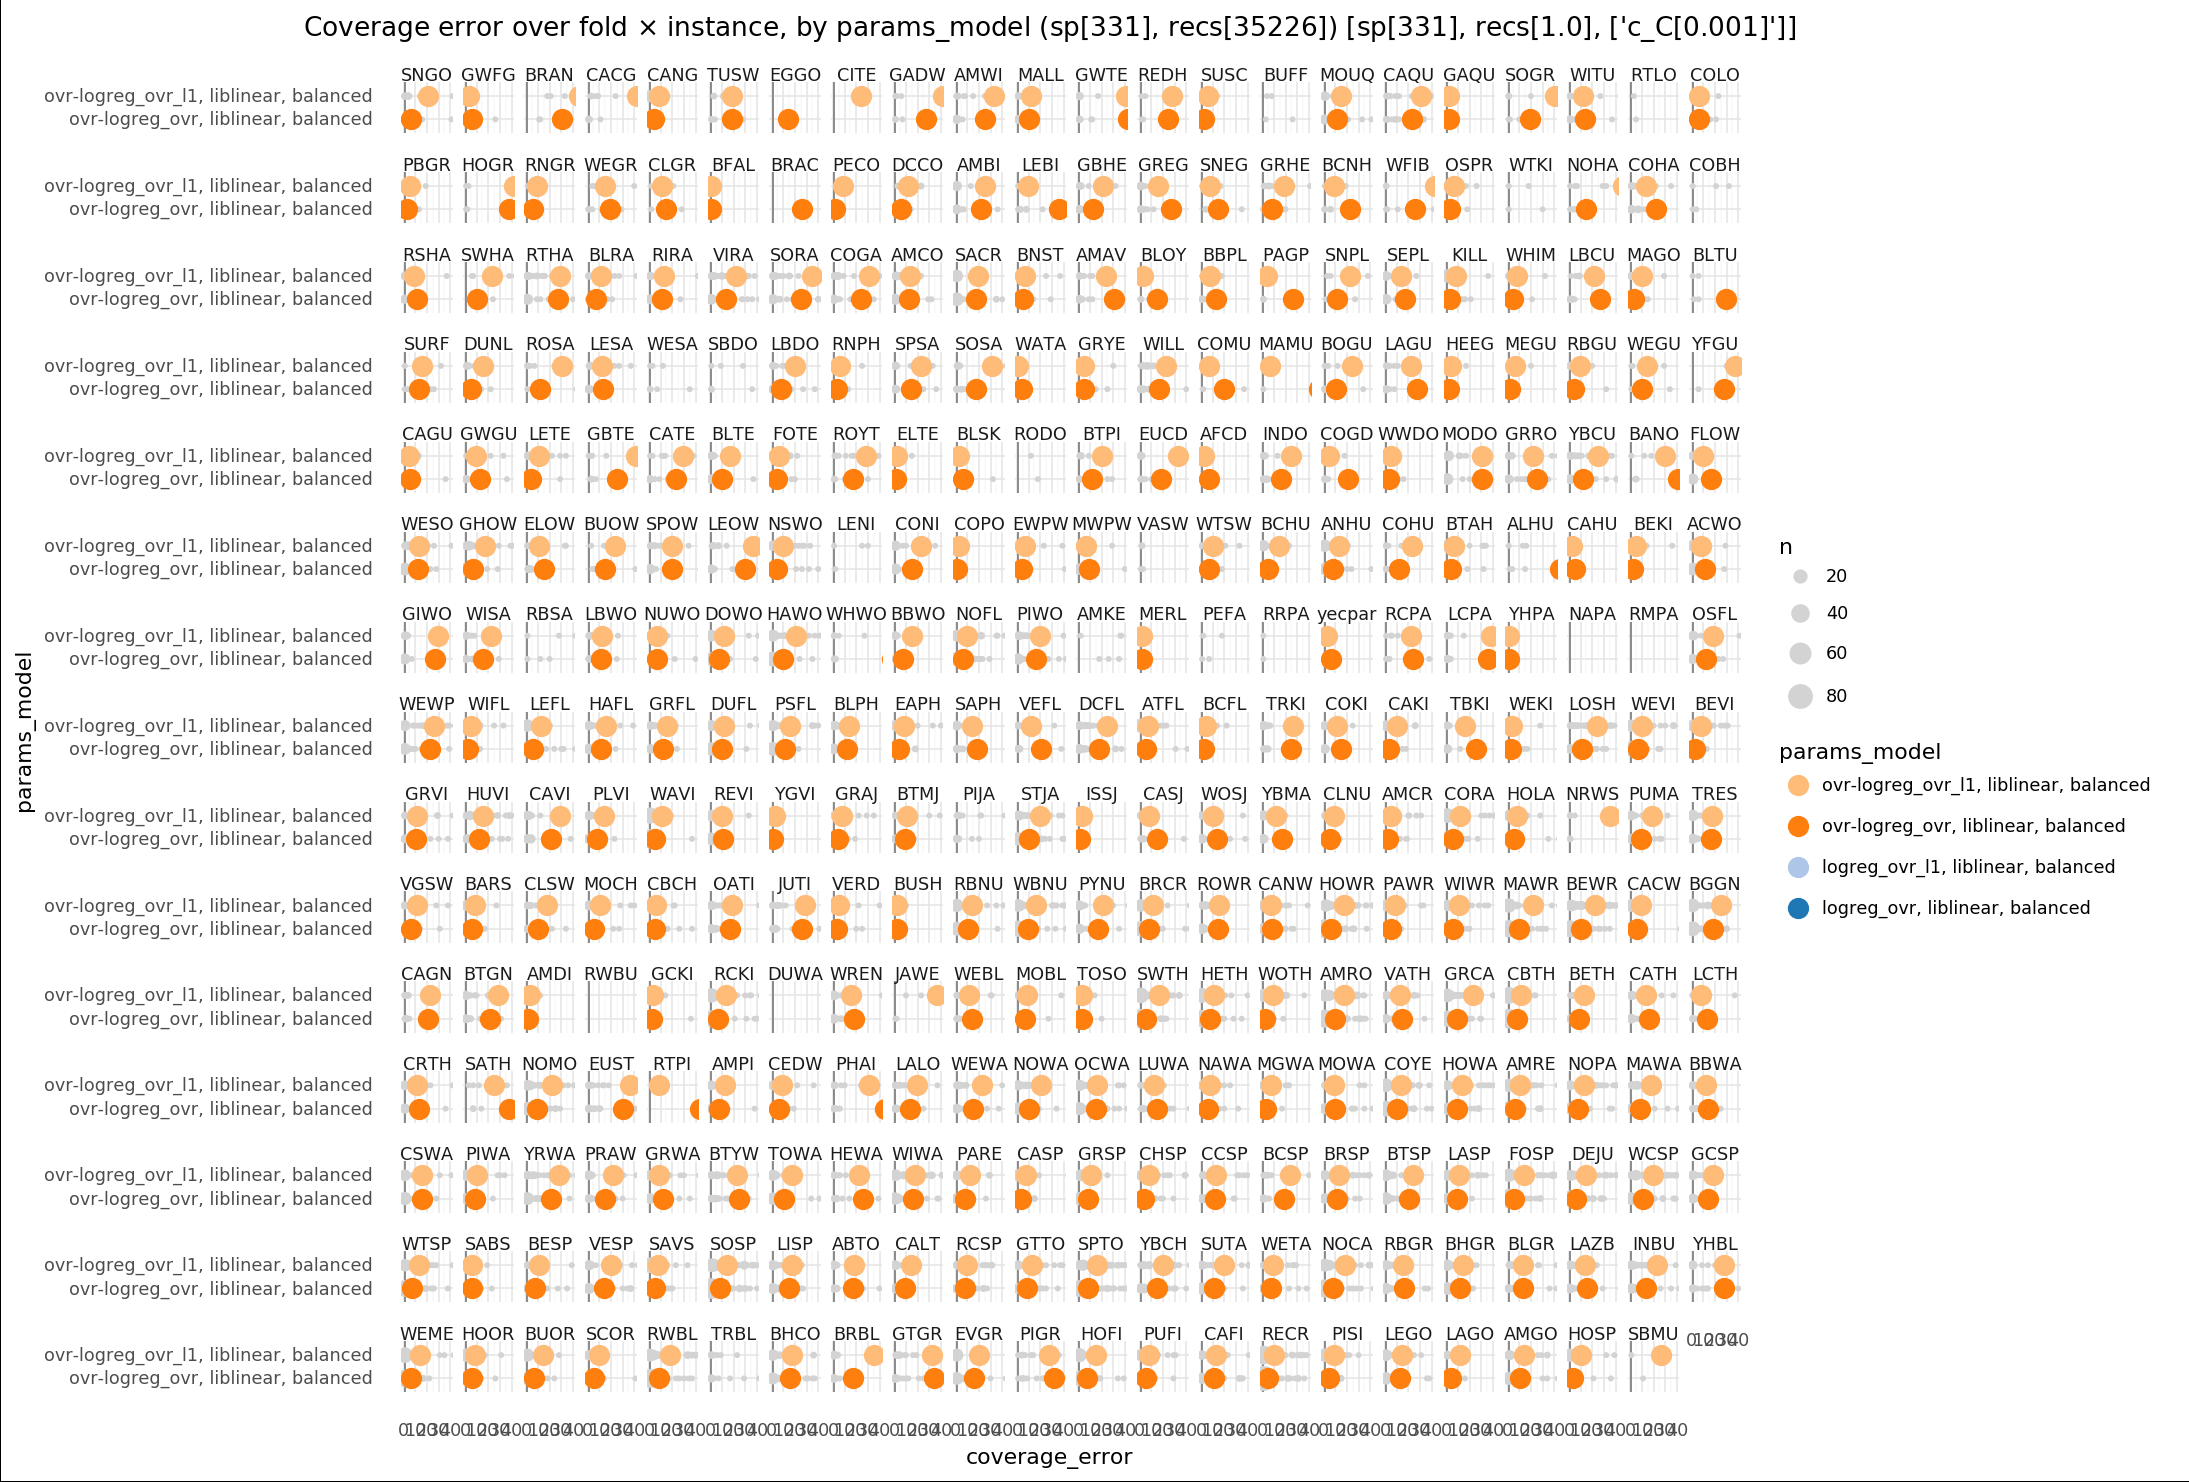

<ggplot: (-9223363278583459724)>

In [ ]:
# TODO Slow, bad for notebook dev loop -- move lower, or disable by default?
# Facet by species
#   - Subset: all models
#   - Grain: sum(recs[model.test_i].groupby(params, y_true) for model)
#       - Over: fold, rec_id
#   - Dims: params, y_true
#   - Metrics: coverage_error.mean
# in: coverage_errors_all_all, recs
[print(x) for x in coverage_errors_all_all.params_complexity.unique()];
params_complexity = [
    # 'c_C[0.1]',
    'c_C[0.001]',
    # '',
]
(coverage_errors_all_all
    [lambda df: df.params_data == params_data]
    [lambda df: df.params_complexity.isin(params_complexity)]
    # [lambda df: df.params.astype(str).str.contains(r'c_n_estimators\[100\]')]  # XXX Subset models
    # .sample(200, random_state=0)  # Faster dev
    # [lambda df: df.y_true.isin(df.y_true.drop_duplicates().sample(n=3, random_state=0))]  # Faster dev
    .astype({'y_true': metadata.species.df.shorthand.dtype})
    # .pipe(df_reverse_cat, 'params_model')
    .pipe(ggplot)
    + aes(x='params_model', y='coverage_error')
    + aes(color='params_model')
    + facet_wrap('y_true',
        ncol=int((n_species * 1/(2/3)) ** .5),
    )
    + geom_hline(yintercept=1, color='grey')
    # + geom_hline(yintercept=recs.species.nunique(), color='grey')
    # Percentiles (faster, no overplot)
    # + geom_point(stat='summary', fun_y=np.mean)
    # + geom_linerange(stat='summary', fun_ymin=partial(np.percentile, q=25), fun_ymax=partial(np.percentile, q=75))
    # Violin (slow, no overplot)
    # + geom_violin()
    # Boxplot (very slow, no overplot)
    # + geom_boxplot()
    # Points (medium cost, high overplot)
    #   - n (count) instead of prop (proportion)
    #   - scale_size_area() instead of default scale_size(), because it's a count [I don't grok this but it looks good]
    + geom_count(aes(size='..n..'), color='lightgray')
    + scale_size_area()
    # + geom_point(stat='summary', fun_y=np.mean, shape='|', size=5, stroke=2)
    + geom_point(stat='summary', fun_y=np.mean, size=5)
    + coord_flip(
        ylim=(0, 40),
    )
    + scale_color_cmap_d(mpl_cmap_repeat(1, 'tab20', 'tab20b', 'tab20c'))  # FIXME repeat(10) makes lots of blue/gray
    + guides(color=guide_legend(reverse=True))
    + theme(axis_text_y=element_text(size=6))
    + theme_minimal_white()  # [TODO Before other theme()]
    + theme_figsize(width=figsize_width, aspect_ratio=1/1)
    + ggtitle(rf'Coverage error over fold $\times$ instance, by params_model ({recs_stats}) [{params_data}, {params_complexity}]')
)

In [ ]:
# ONE_MODEL_PLOTS_NEXT

# Model diagnostics: one model, all folds

In [ ]:
params = (
    'n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]'
)
# Add params_l1 to compare to l2 (params)
params_l1 = (
    'n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr_l1],c_solver[liblinear],c_C[0.01],c_class_weight[balanced]'
)
print("params:\n%s" % '\n'.join('  %s: %r' % (i, x) for i, x in enumerate(cv_models.params.cat.categories)))
print()
print('models:')
params_i = list(cv_models.params.cat.categories).index(params)
print('  params[%s/%s]: %r' % (params_i, len(cv_models.params.cat.categories), params))
print('  fold[*/%s]' % cv.cv.n_splits)

params:
  0: 'n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.003],c_class_weight[balanced]'
  1: 'n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.0003],c_class_weight[balanced]'
  2: 'n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.0001],c_class_weight[balanced]'
  3: 'n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.03],c_class_weight[balanced]'
  4: 'n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.3],c_class_weight[balanced]'
  5: 'n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]'
  6: 'n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.01],c_class_weight[balanced]'
  7: 'n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[0.1],c_class_weight[balanced]'
  8: 'n_species[9], n_recs[1.0], c_cls[logreg_ovr],c_solver[liblinear],c_C[1],c_class_weight[balanced]'
  9: 'n_species[9], n_recs[1

In [ ]:
# Coverage errors: one model, all folds
#   - Subset: models.params == params
#   - Grain: sum(recs[model.test_i] for model)
#   - Dims: model_id, params, fold, y_true, rec_id
#   - Metrics: coverage_error
coverage_errors_one_all = (coverage_errors_all_all
    [lambda df: df.params == params]  # One model, all folds
)
display(
    df_summary(coverage_errors_one_all).T,
    coverage_errors_one_all[:5],
)

min  \
                            dtype    sizeof  len  count nunique mean      std                                                                                                                              
model_id                    category 1154888 7042 7042  1       NaN       NaN        n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced], fold[0]   
params                      category 1091510 7042 7042  1       NaN       NaN                 n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]   
params_data                 category 471814  7042 7042  1       NaN       NaN                                                                                                         sp[331], recs[1.0]   
params_model                category 591528  7042 7042  1       NaN       NaN                                                                                        ovr-logreg_ovr, liblinear, balanced   
params_complexity           category 415478  7042 7042  1       NaN       NaN                                                                                                                 c_C[0.001]   
params_data_and_model       category 725326  7042 7042  1       NaN       NaN                                                                    sp[331], recs[1.0]\novr-logreg_ovr, liblinear, balanced   
params_model_and_complexity category 668990  7042 7042  1       NaN       NaN                                                                            ovr-logreg_ovr, liblinear, balanced\nc_C[0.001]   
fold                        int64    169008  7042 7042  1       0.000     0.000                                                                                                                        0   
i                           int64    197176  7042 7042  7042    17609.357 10160.496                                                                                                                    6   
y_true                      object   598572  7042 7042  329     NaN       NaN                                                                                                                       ABTO   
coverage_error              float64  169008  7042 7042  202     11.526    28.968                                                                                                                       1   

                                                                                                                                                                                                     25%  \
                            dtype    sizeof  len  count nunique mean      std                                                                                                                              
model_id                    category 1154888 7042 7042  1       NaN       NaN        n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced], fold[0]   
params                      category 1091510 7042 7042  1       NaN       NaN                 n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]   
params_data                 category 471814  7042 7042  1       NaN       NaN                                                                                                         sp[331], recs[1.0]   
params_model                category 591528  7042 7042  1       NaN       NaN                                                                                        ovr-logreg_ovr, liblinear, balanced   
params_complexity           category 415478  7042 7042  1       NaN       NaN                                                                                                                 c_C[0.001]   
params_data_and_model       category 725326  7042 7042  1       NaN       NaN                                       

model_id  \
110325  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced], fold[0]   
110326  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced], fold[0]   
110327  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced], fold[0]   
110328  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced], fold[0]   
110329  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced], fold[0]   

                                                                                                            params  \
110325  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]   
110326  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]   
110327  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]   
110328  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]   
110329  n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]   

               params_data                         params_model params_complexity  \
110325  sp[331], recs[1.0]  ovr-logreg_ovr, liblinear, balanced        c_C[0.001]   
110326  sp[331], recs[1.0]  ovr-logreg_ovr, liblinear, balanced        c_C[0.001]   
110327  sp[331], recs[1.0]  ovr-logreg_ovr, liblinear, balanced        c_C[0.001]   
110328  sp[331], recs[1.0]  ovr-logreg_ovr, liblinear, balanced        c_C[0.001]   
110329  sp[331], recs[1.0]  ovr-logreg_ovr, liblinear, balanced        c_C[0.001]   

                                          params_data_and_model                      params_model_and_complexity  fold      i  \
110325  sp[331], recs[1.0]\novr-logreg_ovr, liblinear, balanced  ovr-logreg_ovr, liblinear, balanced\nc_C[0.001]     0   1694   
110326  sp[331], recs[1.0]\novr-logreg_ovr, liblinear, balanced  ovr-logreg_ovr, liblinear, balanced\nc_C[0.001]     0  33361   
110327  sp[331], recs[1.0]\novr-logreg_ovr, liblinear, balanced  ovr-logreg_ovr, liblinear, balanced\nc_C[0.001]     0  30902   
110328  sp[331], recs[1.0]\novr-logreg_ovr, liblinear, balanced  ovr-logreg_ovr, liblinear, balanced\nc_C[0.001]     0  15827   
110329  sp[331], recs[1.0]\novr-logreg_ovr, liblinear, balanced  ovr-logreg_ovr, liblinear, balanced\nc_C[0.001]     0  20871   

       y_true  coverage_error  
110325   RSHA             3.0  
110326   HOFI             1.0  
110327   BHGR             1.0  
110328   HOWR             1.0  
110329   NOMO             1.0

n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]


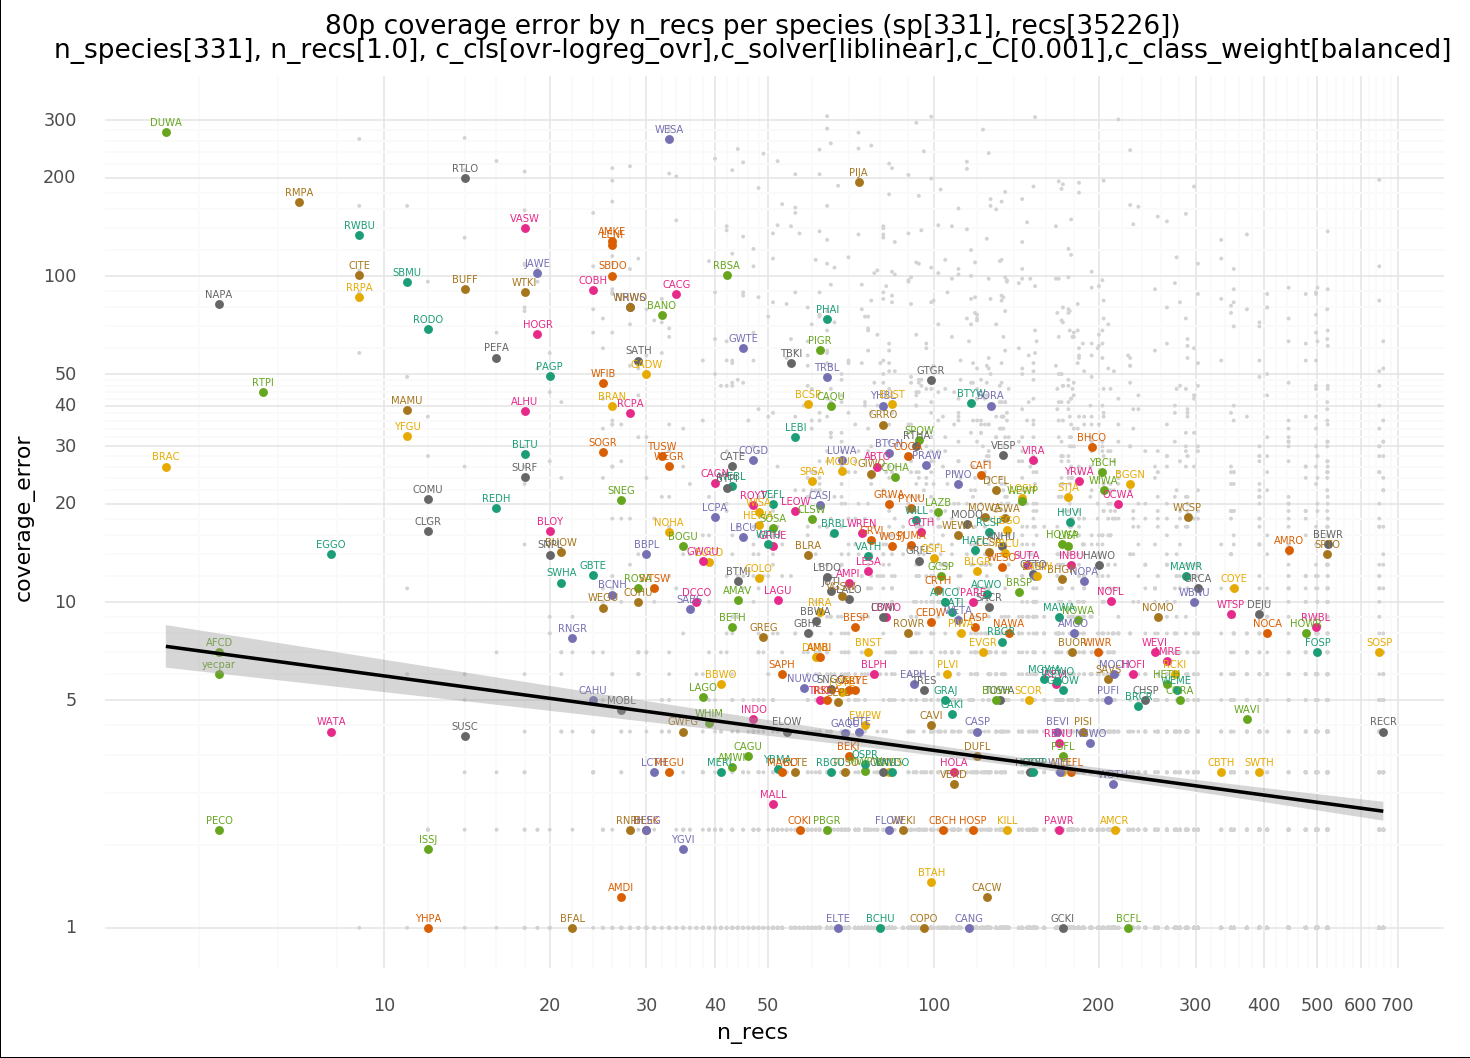

n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr_l1],c_solver[liblinear],c_C[0.01],c_class_weight[balanced]


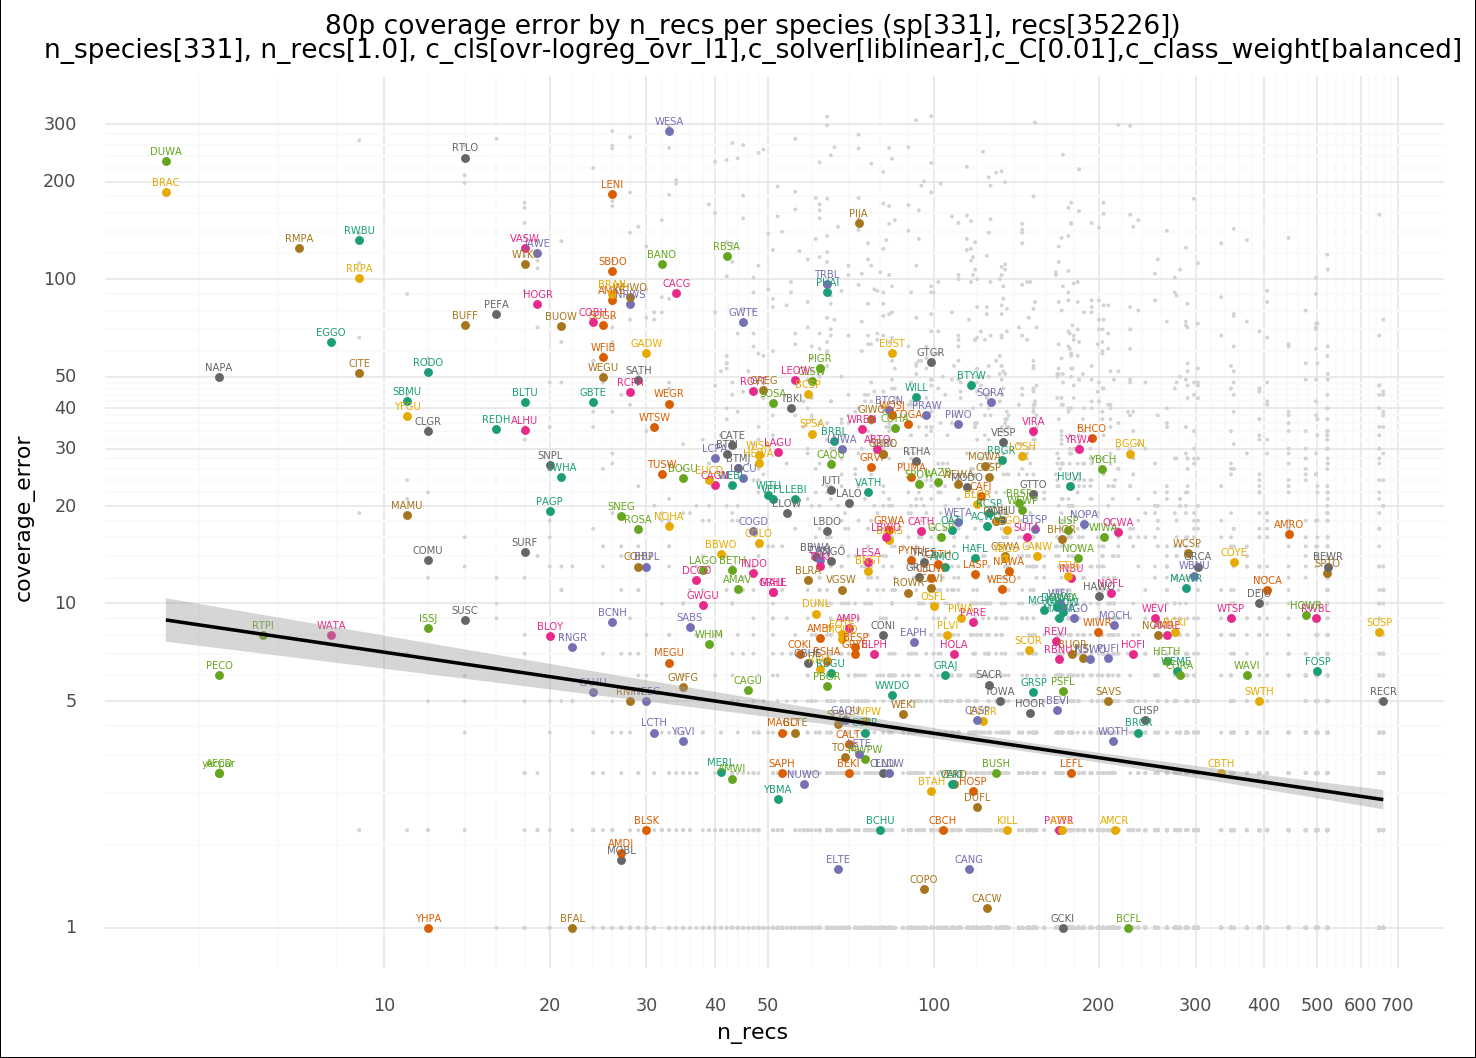

In [ ]:
# Coverage error by n_recs per species
#   - Compare l2 vs. l1
scale = [
    # 'linear',
    # 'logy',
    'logy', 'logx',
]
summary_fun_y = (
    # 'mean'
    # '75p'
    '80p'
    # '90p'
)
summary_fun = lambda s: (
    np.mean if s == 'mean' else
    partial(np.percentile, q=parse.parse('{:g}p', s)[0])
)
logy_breaks=[1, 5, 10, 20, 30, 40, 50, 100, 200, 300]  # HACK Data dependent
logx_breaks=[1, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700]  # HACK Data dependent
for _params in [
    params,
    params_l1,
]:
    print(_params)
    repr(coverage_errors_all_all
        [lambda df: df.params == _params]  # One model, all folds
        # .sample(n=100, random_state=0)  # XXX Faster dev
        .merge(how='left', on='y_true', right=(recs
            .assign(n_recs=1).groupby('species')['n_recs'].sum().reset_index()
            .rename(columns={'species': 'y_true'})
        ))
        .astype({'y_true': metadata.species.df.shorthand.dtype})
        .pipe(df_reverse_cat, 'y_true')
        .pipe(df_remove_unused_categories)
        .pipe(ggplot)
        + theme_figsize('inline')
        + aes(x='n_recs', y='coverage_error')
        + geom_point(color='lightgray', size=.1)
        + stat_summary(
            fun_y=summary_fun(summary_fun_y),
            geom='point',
            mapping=aes(group='y_true', color='y_true'),
        )
        + stat_summary(
            fun_y=summary_fun(summary_fun_y),
            geom='text', size=5,
            mapping=aes(group='y_true', color='y_true', label='''[
                color
                # color if y >= 30 or x >= 300 else None  # (Great trick!)
                for color, x, y in zip(..color.., ..x.., ..y..)
            ]'''),
            nudge_y=4 if 'logy' not in scale else .03,
        )
        + geom_smooth(method='lm', se=True)
        + scale_color_cmap_d(mpl_cmap_repeat(50, 'Dark2'))
        + theme_minimal_white()  # Before other theme()
        + guides(color=False)
        + (geom_blank() if 'logy' not in scale else scale_y_log10(
            breaks=logy_breaks,
            labels=lambda breaks: [int(round(x)) for x in breaks],
        ))
        + (geom_blank() if 'logx' not in scale else scale_x_log10(
            breaks=logx_breaks,
            labels=lambda breaks: [int(round(x)) for x in breaks],
        ))
        + ggtitle(f'{summary_fun_y} coverage error by n_recs per species ({recs_stats})\n{_params}')
    )

n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]


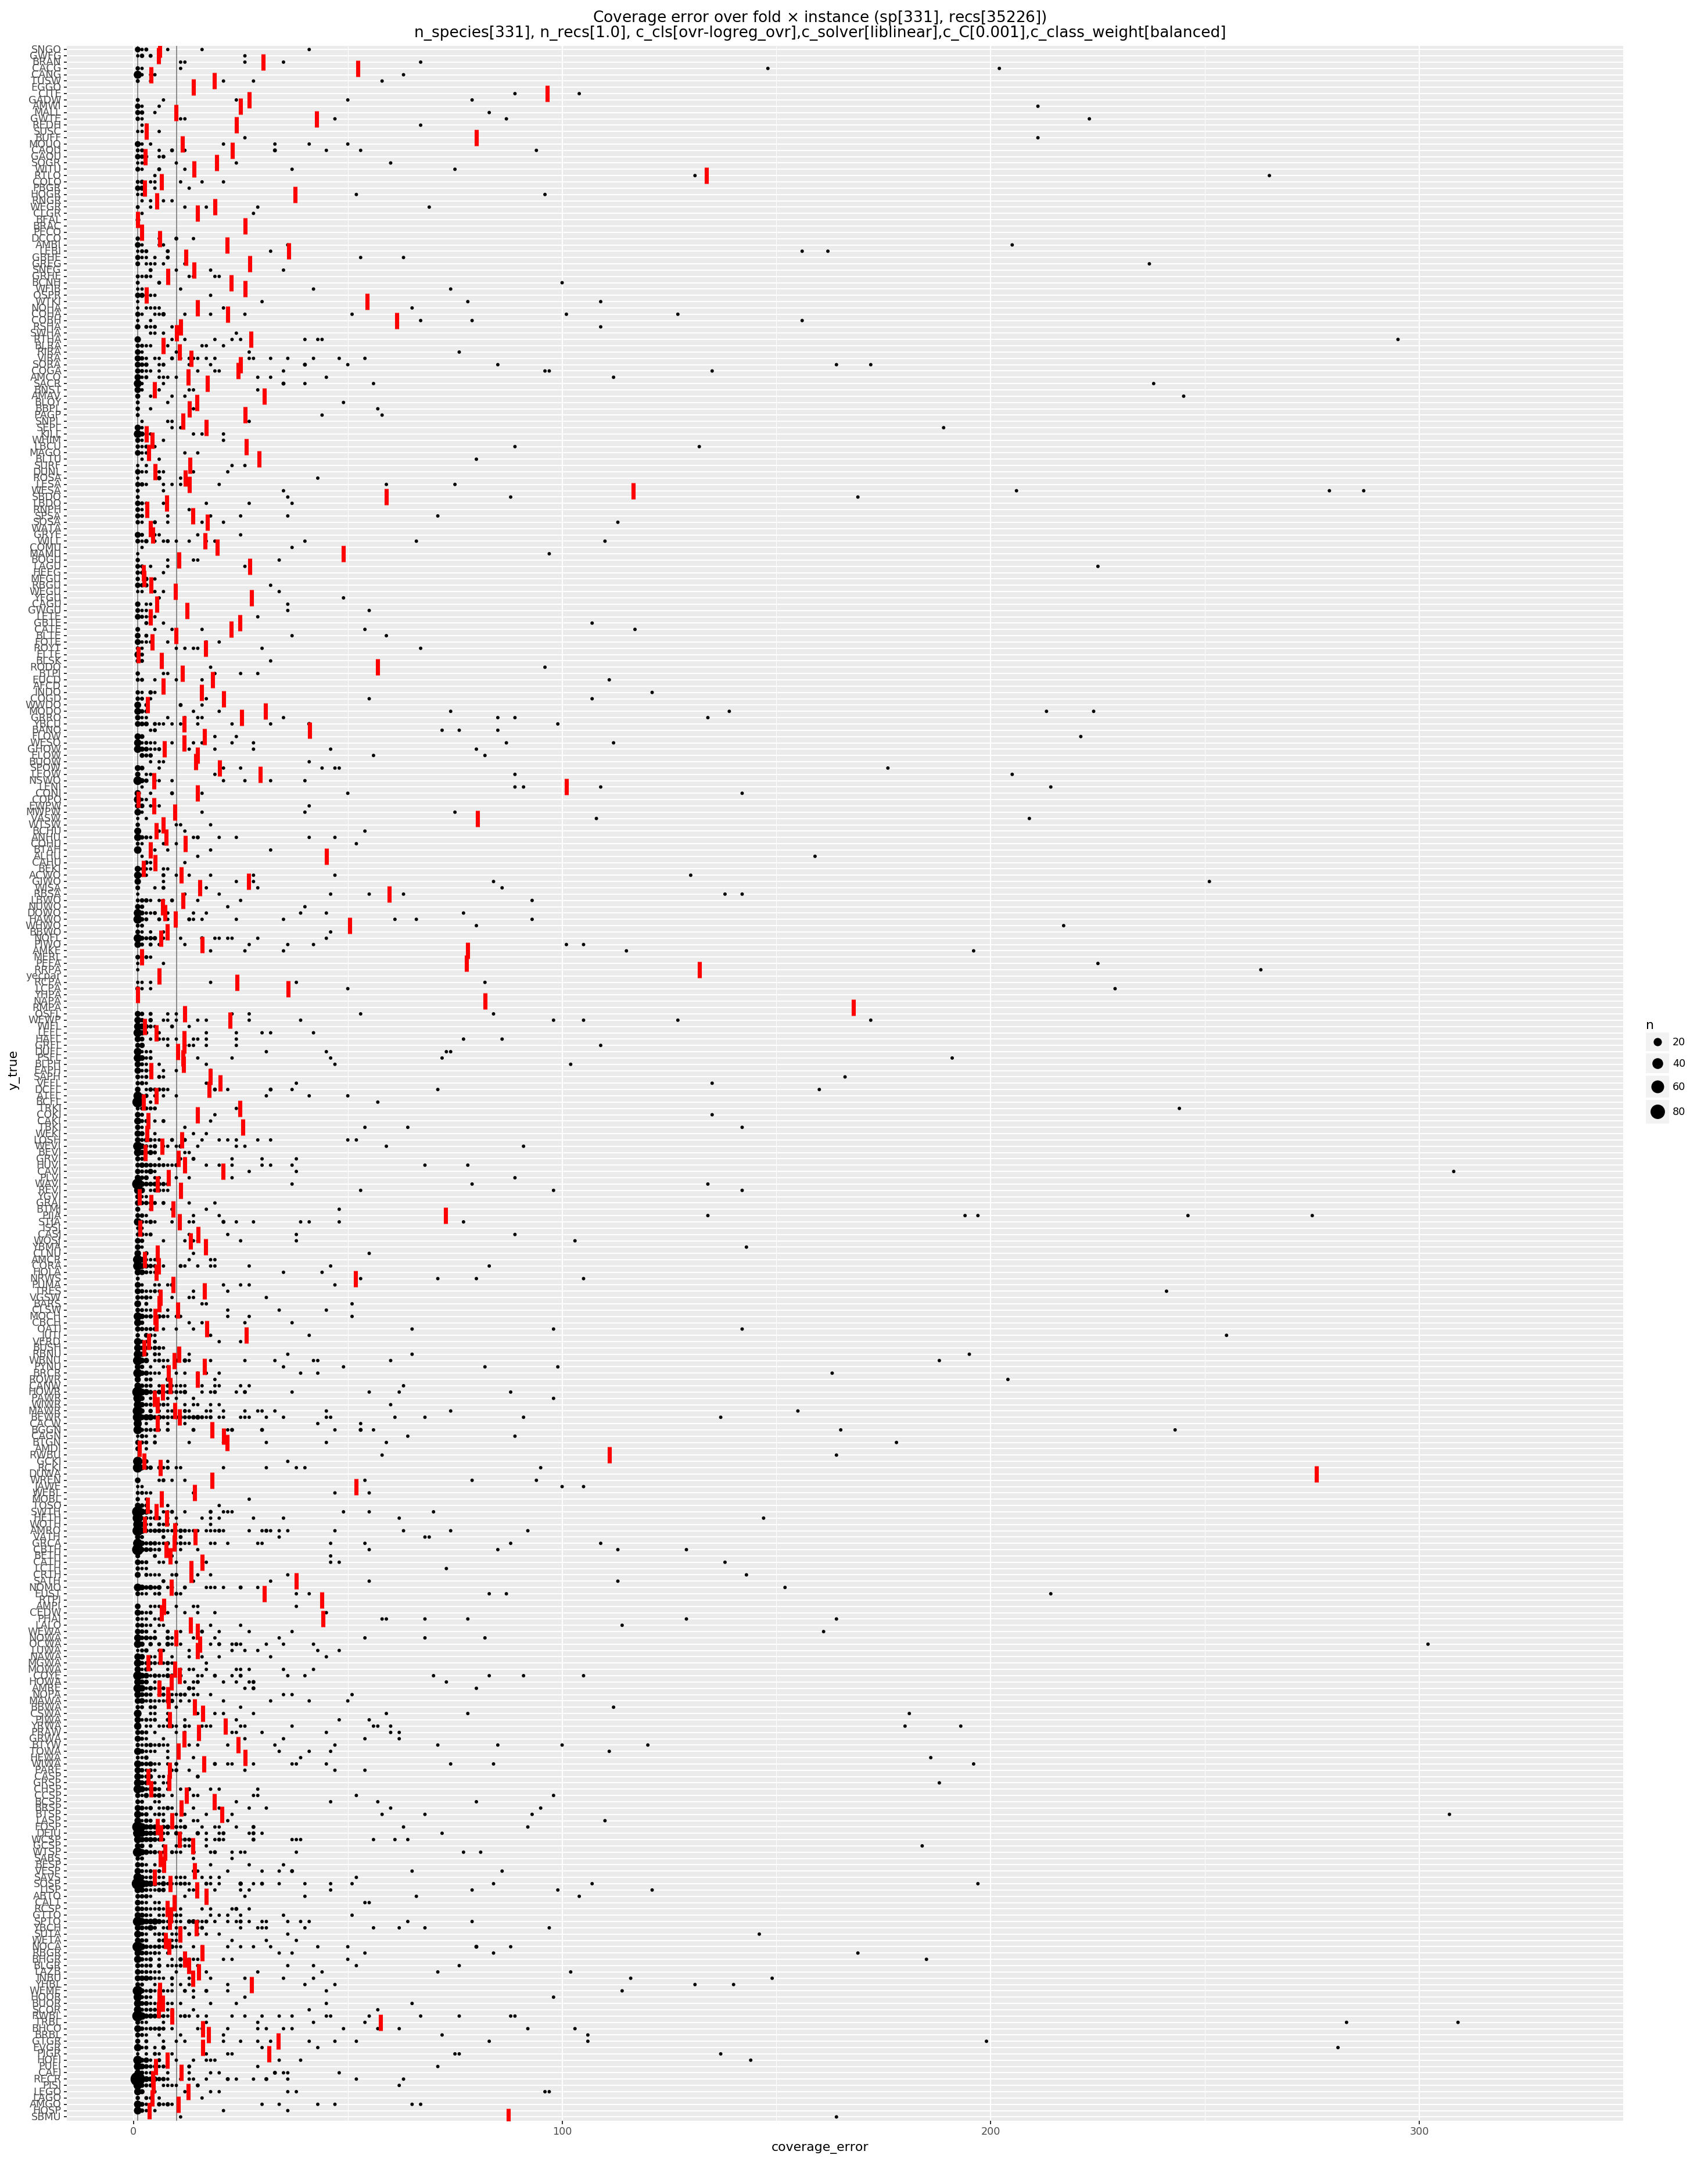

n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr_l1],c_solver[liblinear],c_C[0.01],c_class_weight[balanced]


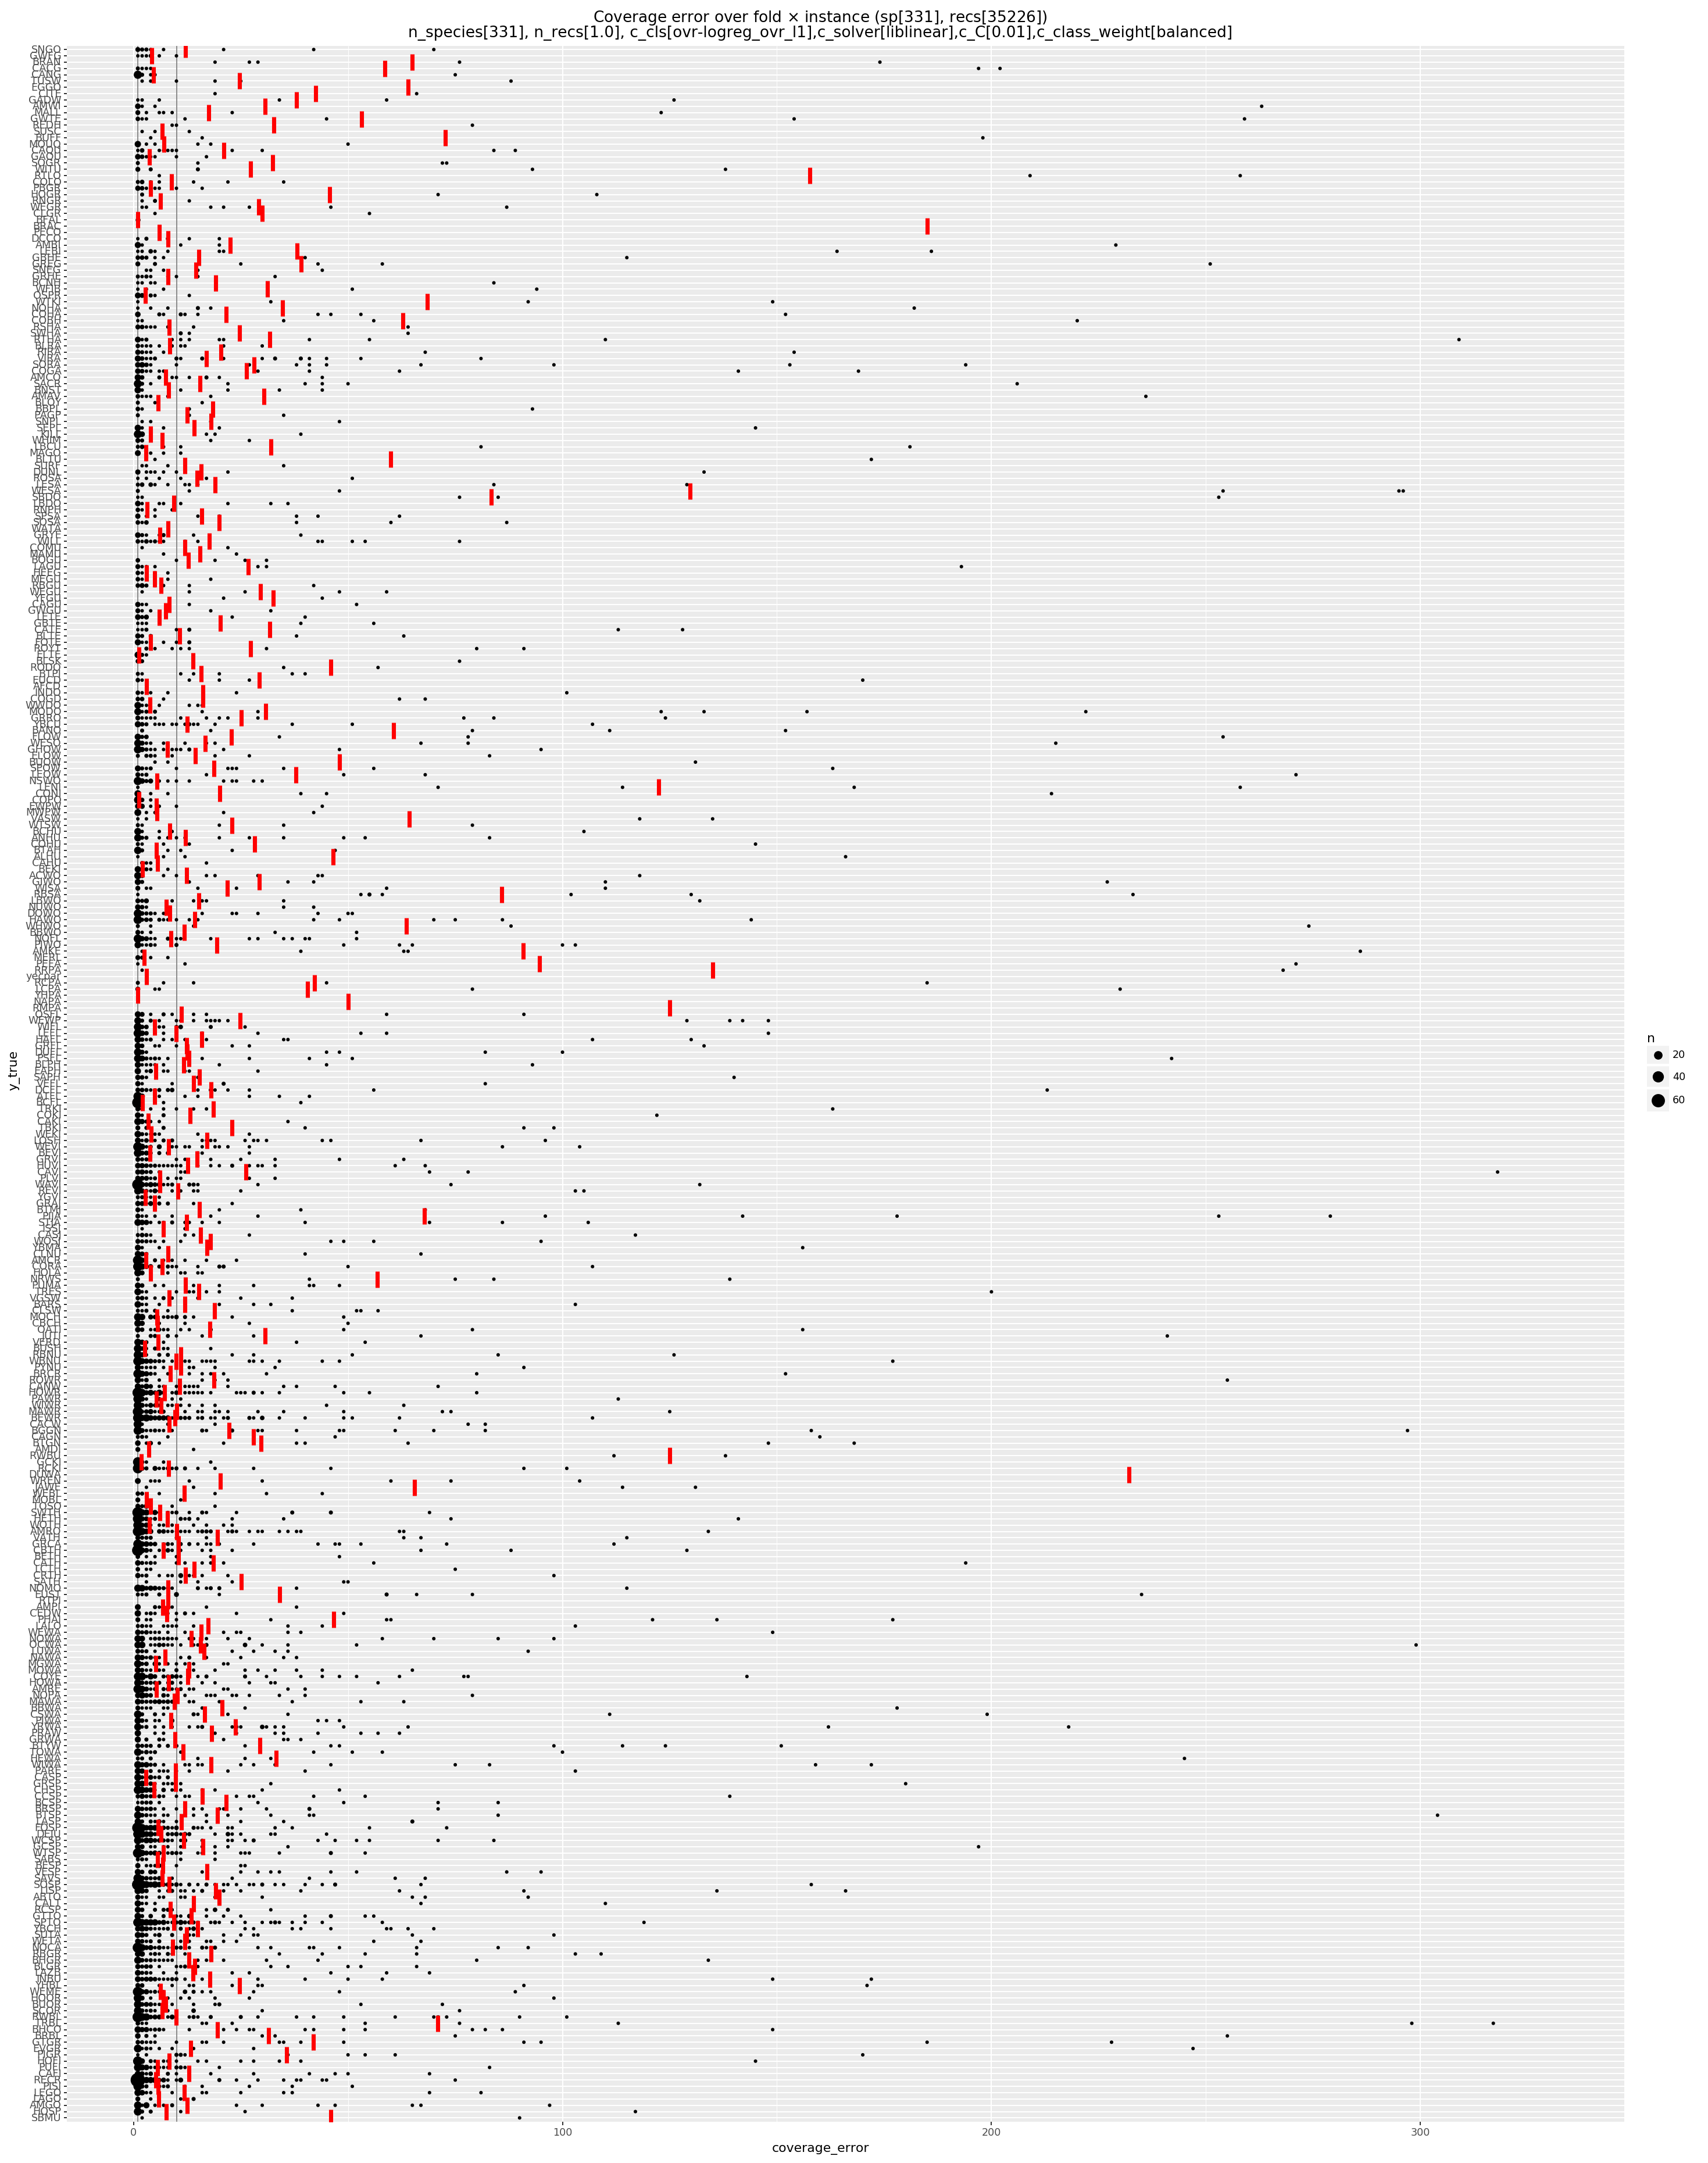

In [ ]:
#   - Subset: models.params == params
#   - Grain: sum(recs[model.test_i].groupby(y_true) for model)
#       - Over: fold, rec_id
#   - Dims: y_true
#   - Metrics: count, coverage_error.percentiles
# in: coverage_errors_one_all, recs
for _params in [params, params_l1]:
    print(_params)
    repr(coverage_errors_all_all
        [lambda df: df.params == _params]  # One model, all folds
        .astype({'y_true': metadata.species.df.shorthand.dtype})
        .pipe(df_reverse_cat, 'y_true')
        .pipe(ggplot, aes(x='y_true', y='coverage_error'))
        + geom_hline(yintercept=1, color='grey')
        + geom_hline(yintercept=10, color='grey')
        # + geom_hline(yintercept=recs.species.nunique(), color='grey')
        + geom_count(aes(size='..n..'), alpha=1)  # n (count) instead of prop (proportion)
        + scale_size_area()  # Instead of default scale_size(), because it's a count [I don't grok this but it looks good]
        + geom_point(stat='summary', fun_y=np.mean, alpha=1, color='red', shape='|', size=6, stroke=2)
        + coord_flip(
            ylim=(1, n_species),
        )
        # + theme_figsize('inline')
        # + theme_figsize('square')
        # + theme_figsize('half')
        + theme_figsize('half_dense')
        # + theme_figsize('full')
        # + theme_figsize('full_dense')
        + ggtitle(f'Coverage error over fold $\\times$ instance ({recs_stats})\n{_params}')
    )

n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr],c_solver[liblinear],c_C[0.001],c_class_weight[balanced]


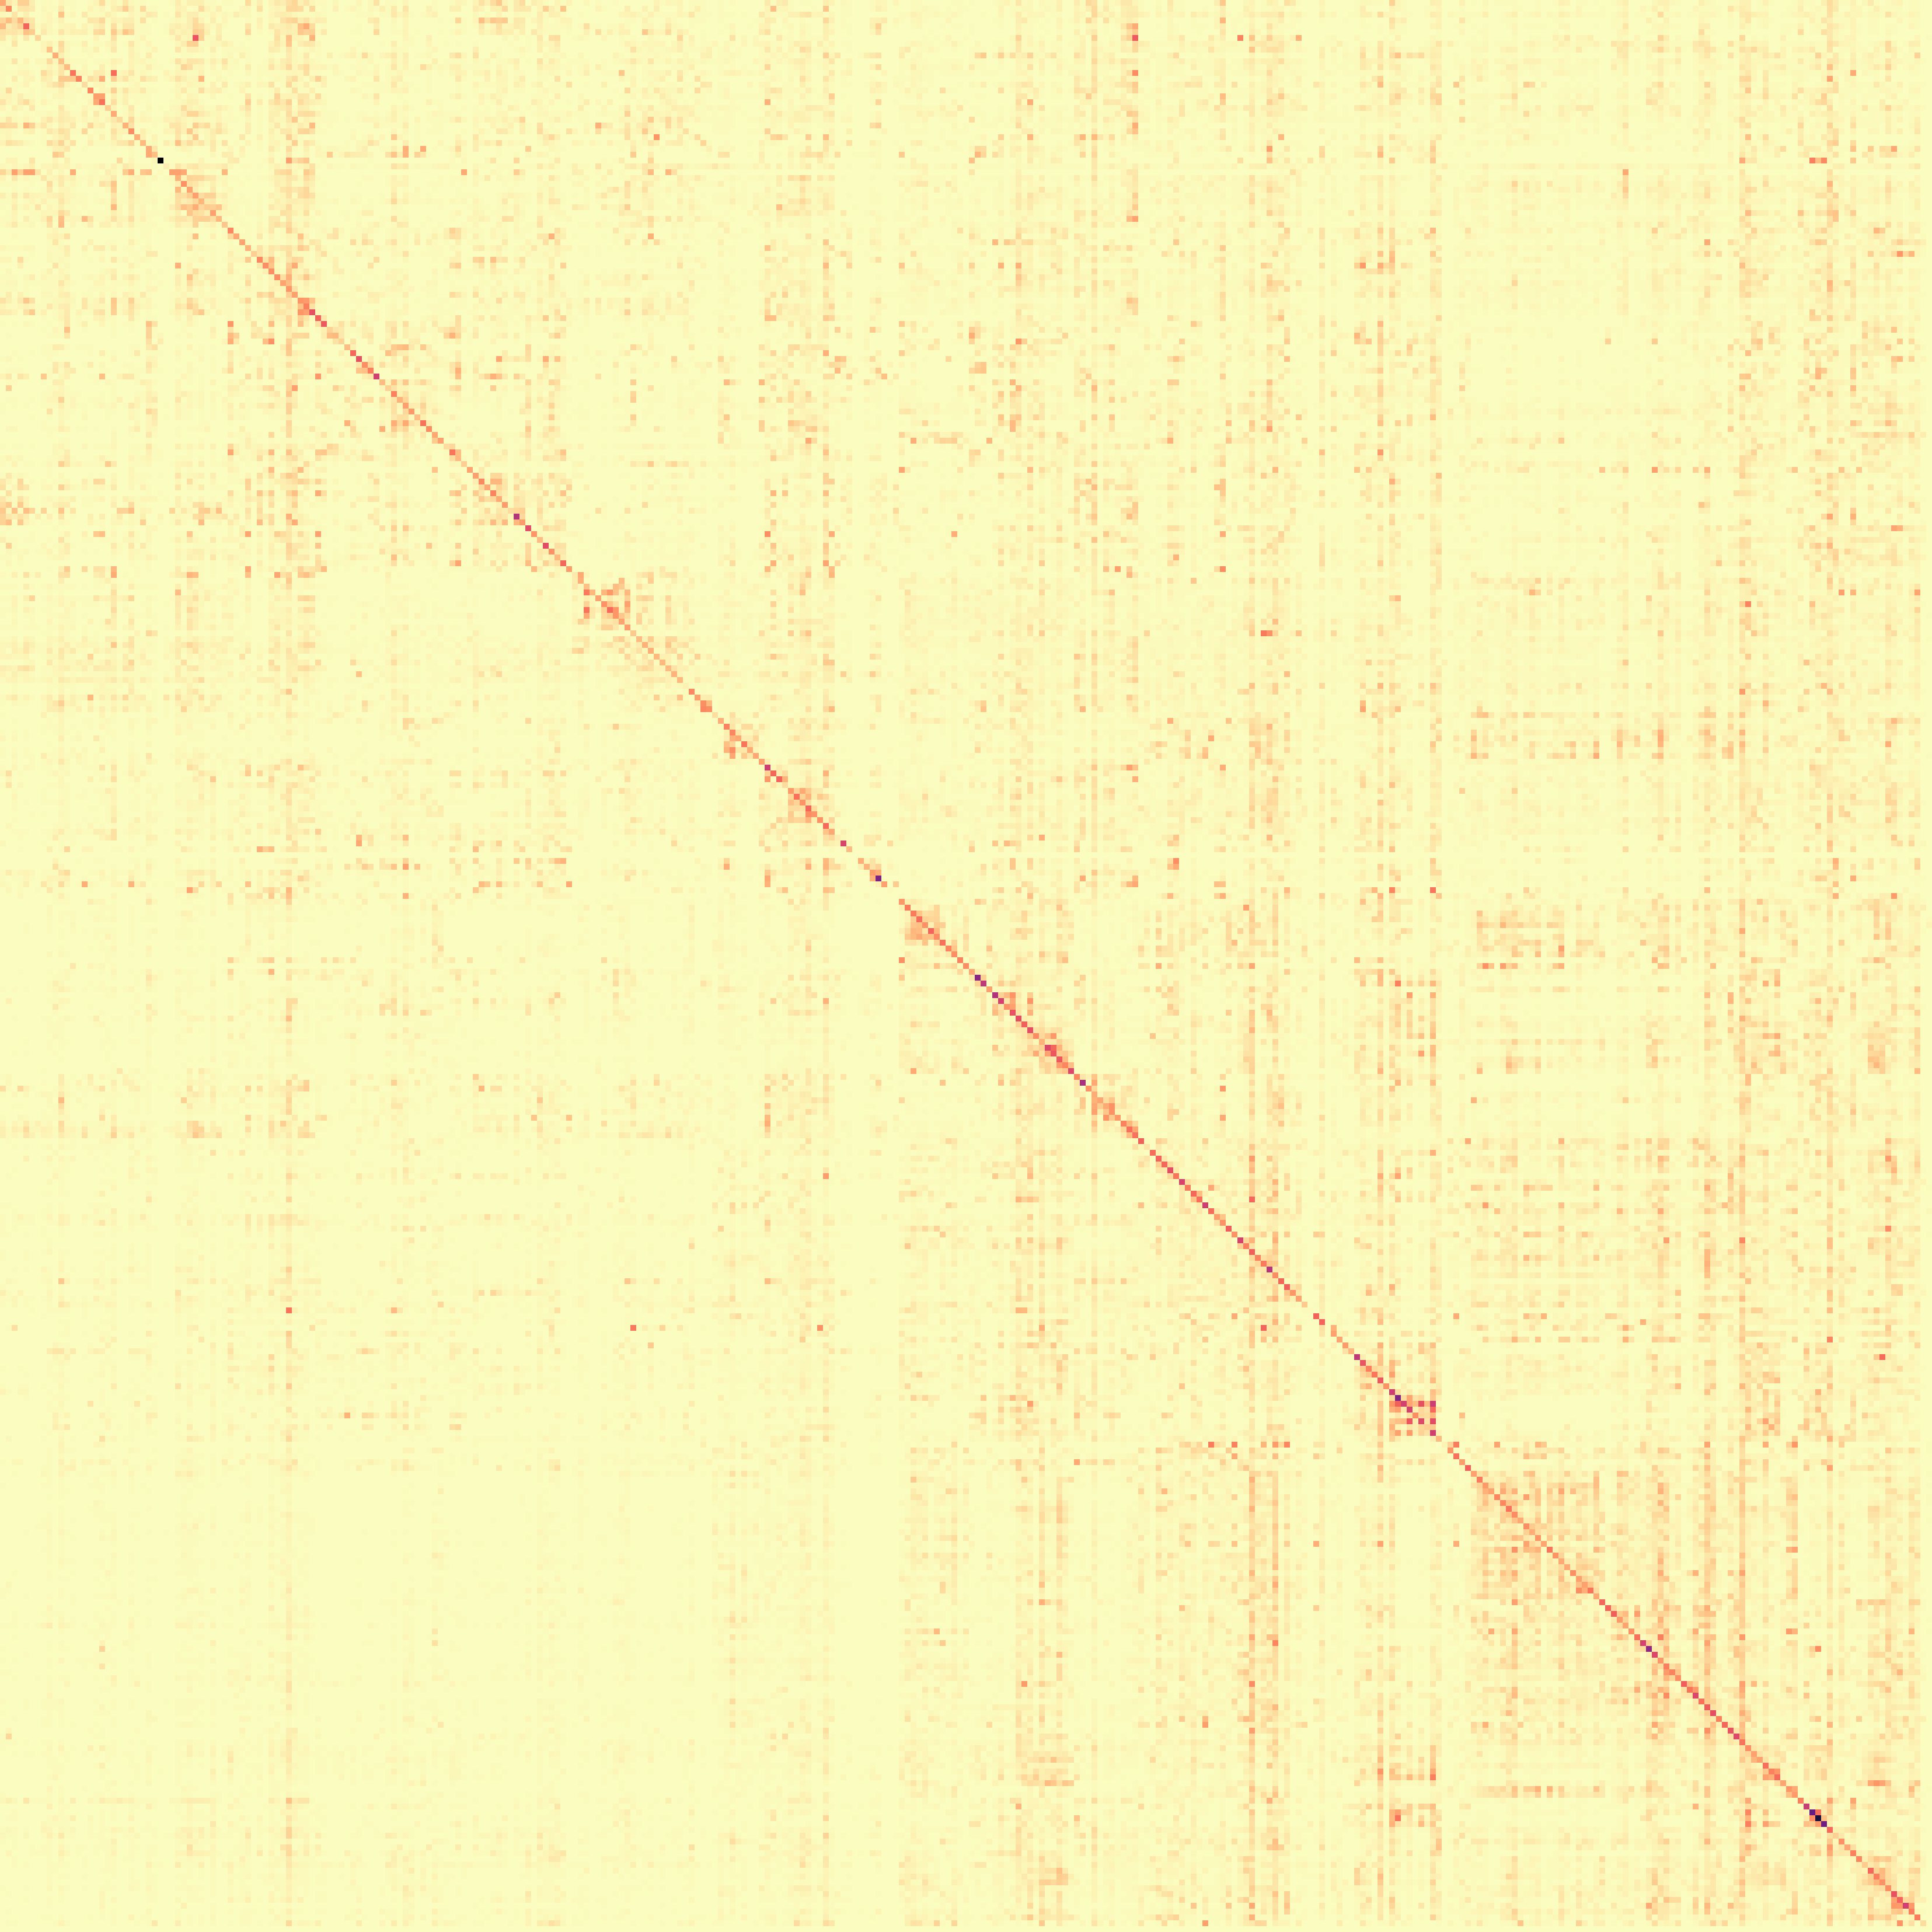

n_species[331], n_recs[1.0], c_cls[ovr-logreg_ovr_l1],c_solver[liblinear],c_C[0.01],c_class_weight[balanced]


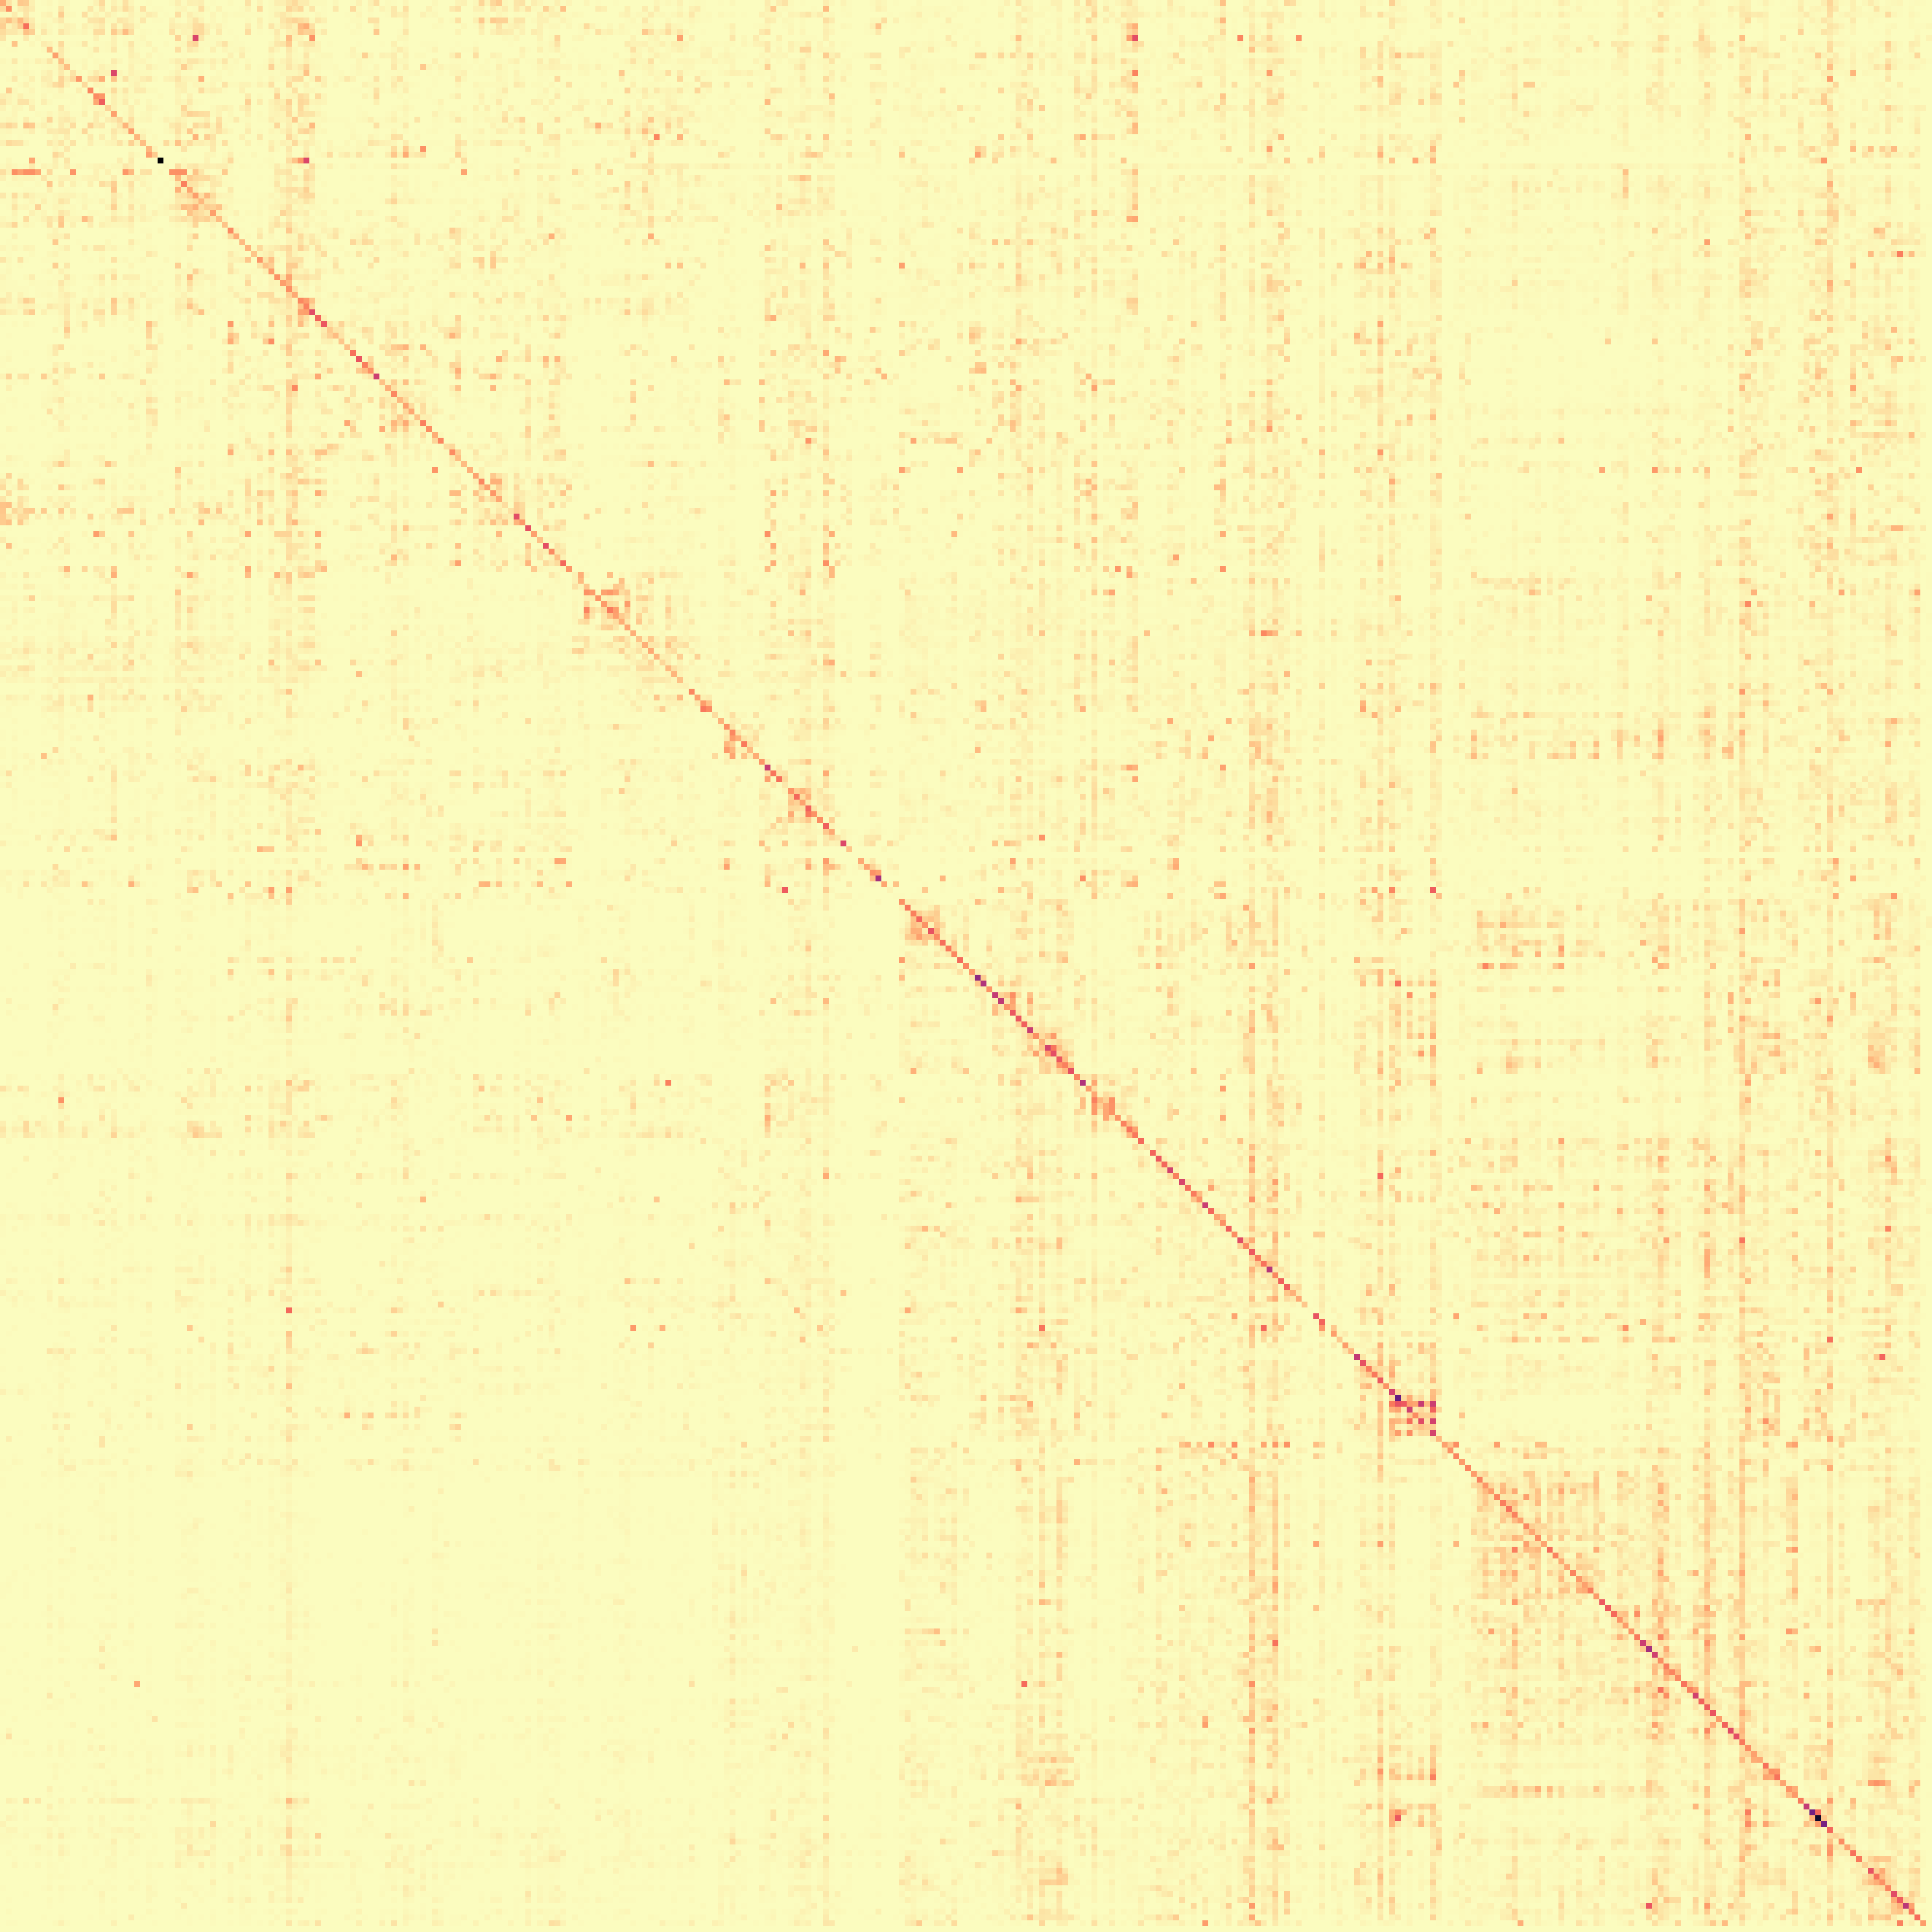

In [ ]:
# One-model/all-folds confusion matrix
for _params in [params, params_l1]:
    print(_params)
    with figsize(
        # 'square',
        # 'full',
        'full_dense',
    ):
        repr(cv_models
            [lambda df: df.params == _params]
            .pipe(lambda df: plot_confusion_matrix(
                classes=df.iloc[0].test_evals.classes,
                M=np.array([
                    row.test_evals.confusion_matrix_prob()
                    for row in df_rows(df)
                ]).sum(axis=0),
                # normalize=False,  # For counts
                raw=True, scale=10,  # Faster dev
                format=None,  # Omit numbers, too dense
                title=f'({recs_stats})',
            ))
        )

In [ ]:
BORING_ONE_MODEL_ONE_FOLD_PLOTS_NEXT

# Model diagnostics: one model, one fold

In [ ]:
fold = 0
# params_i = ...  # Comment out to reuse from above
params = cv_models.params.cat.categories[params_i]
[(_, model)] = list(cv_models[lambda df: (df.params == params) & (df.fold == fold)].iterrows())
print("params:\n%s" % '\n'.join('  %s: %r' % (i, x) for i, x in enumerate(cv_models.params.cat.categories)))
print()
print('model:')
print('  params[%s/%s]: %r' % (params_i, len(cv_models.params.cat.categories), model.params))
print('  fold[%s/%s]' % (model.fold, cv.cv.n_splits))
print()
print(model)

[skip]

In [ ]:
# in: model
model_id = model.model_id
params = model.params
fold = model.fold
# train_evals = model.train_evals
test_evals = model.test_evals

# in: model, recs
# train_recs = recs.iloc[train_evals.i]
# train_X = Search.X(recs)[train_evals.i]
# train_y = Search.y(recs)[train_evals.i]
test_recs = recs.iloc[test_evals.i]
test_X = Search.X(recs)[test_evals.i]
test_y = Search.y(recs)[test_evals.i]  # (Don't need to store cv_models.test_evals.y if we have recs -- which sometimes we don't?)

display(
    # len(train_recs),
    len(test_recs),
)

[skip]

In [ ]:
# TODO Restore this plot like 'Coverage error over ...' above, so we can see _one_ model instead of aggregating over n_splits models
# # TODO Update [kill the .merge, then species -> y_true]
# (search.coverage_error_by(test_recs, 'id')
#     [:5]
#     # .merge(test_recs[['id', 'species']], on='id', how='left')
#     # .pipe(ggplot, aes(x='species', y='coverage_error'))
#     # + geom_count(aes(size='..n..'))
#     # + stat_summary(fun_y=np.mean, geom='point', color='red', alpha=.5, shape='|', size=6, stroke=1)
#     # + stat_summary(
#     #     fun_ymin=partial(np.percentile, q=25), fun_ymax=partial(np.percentile, q=75),
#     #     geom='linerange', color='red', alpha=.5, size=1,
#     # )
#     # + coord_flip()
#     # + geom_hline(yintercept=len(search.classes_), color='grey')
#     # + scale_x_discrete(limits=list(reversed(test_recs.species.cat.categories)))
#     # + theme_figsize('square')
#     # + ggtitle(rf'Coverage error over instance ({model_id}) ({recs_stats})')
# )

[skip]

In [ ]:
# One-model/one-fold confusion matrix
with figsize(
    'square',
    # 'full',
    # 'full_dense',
):
    plot_confusion_matrix_df(
        confusion_matrix_prob_df(model.test_evals.y, model.test_evals.y_scores, model.test_evals.classes),
        title=model.model_id,
        # normalize=False,  # For counts
        raw=True, scale=10,  # Faster dev
        title=f'({recs_stats})',
    )

[skip]

In [ ]:
DEBUG_PLOTS_NEXT

# Debug plots, ignored by default

## Debug: resource usage

In [ ]:
(cv_models
    .pipe(df_reverse_cat, 'params', 'params_no_ns', 'ns')
    # Manually compute y.mean() per group
    .groupby('params').apply(lambda g: g.assign(mem_rss_delta_mean=lambda df: df.mem_rss_delta.mean()))
    .pipe(ggplot, aes(x='ns', group='params_no_ns'))
    + geom_col(aes(y='mem_rss_delta_mean', fill='params_no_ns'), position=position_dodge()) # Summary per fold
    + geom_point(aes(y='mem_rss_delta'), fill='none', size=2, position=position_dodge(width=.9)) # Distribution of folds
    + coord_flip()
    + scale_fill_cmap_d(mpl_cmap_concat('tab20', 'tab20b', 'tab20c'))
    + scale_y_continuous(labels=labels_bytes(), breaks=breaks_bytes())
    + guides(fill=guide_legend(reverse=True))
    + theme(legend_position='bottom', legend_direction='vertical', legend_box_spacing=.4, legend_key_height=8)
    + theme_figsize(aspect_ratio=1/3*2)
    + ggtitle(f'Mem rss spread ($max-min$) ({recs_stats})')
)

[skip]

In [ ]:
# TODO Very slow with ~200 models
cv_models_proc_stats = (cv_models
    # Enable these as needed (at the cost of mem usage)
    [[
        'model_id',
        'params',
        # 'params_dict',
        'params_data',
        'params_complexity',
        'params_model',
        'fold',
        # 'train_score',
        # 'test_score',
        # 'fit_time',
        # 'score_time',
        'mem_rss_delta',
        # 'mem_vms_delta',
        # 'train_evals',
        # 'test_evals',
        'proc_stats',
    ]]
    # TODO Faster way to do this? (.merge is >2x slower)
    .pipe(df_flatmap, lambda row: [
        row.append(pd.Series(dict(**stats)))
        for stats in row.proc_stats.stats
    ])
    # .pipe(lambda df: (df
    #     .merge(how='left',
    #         right=DF(
    #             OrderedDict(model_id=row.model_id, **stats)
    #             for row in df_rows(df)
    #             for stats in row.proc_stats.stats
    #         )
    #     )
    # ))
    # HACK Restore the cats that the df_flatmap just destroyed [copied from cv_results_splits_df]
    .pipe(df_ordered_cat,
        model_id=lambda df: df.model_id.unique(),
        params=lambda df: df.params.unique(),
    )
    .assign(
        cpu_user=lambda df: df.cpu_user.diff() * 100,
        cpu_system=lambda df: df.cpu_system.diff() * 100,
    )
    .pipe(tap, f=lambda df: display(
        df_summary(df).T,
        df[:5],
    ))
)

[skip]

In [ ]:
# TODO Might need to stack/geom_area for overlapping runs
(cv_models_proc_stats
    .pipe(ggplot)
    + aes(x='time', color='model_id')
    + geom_line(aes(y='cpu_system'), linetype='dashed', size=.5)
    + geom_line(aes(y='cpu_system + cpu_user'), linetype='solid', size=.5)
    + expand_limits(y=0)
    + ylab('cpu')
    + scale_x_datetime(date_labels='%H:%M:%S')
    + scale_y_continuous(labels=lambda labels: ['%.3g%%' % x for x in labels])
    + theme(legend_position='bottom', legend_direction='vertical', legend_box_spacing=.4, legend_key_height=8)
    + theme_figsize('inline_short')
    + ggtitle('cpu over time (system + user)')
)

[skip]

In [ ]:
(cv_models_proc_stats
    .pipe(ggplot)
    + aes(x='time', color='model_id')
    + geom_line(aes(y='mem_rss'), linetype='solid', size=.5)
    + geom_line(aes(y='mem_vms'), linetype='dashed', size=.5)
    + expand_limits(y=0)
    + ylab('mem')
    + scale_x_datetime(date_labels='%H:%M:%S')
    + scale_y_continuous(labels=labels_bytes(), breaks=breaks_bytes(pow=3))
    + theme(legend_position='bottom', legend_direction='vertical', legend_box_spacing=.4, legend_key_height=8)
    + theme_figsize('inline_short')
    + ggtitle('Mem over time (rss, vms)')
)

[skip]

## Debug: RF tuning

In [ ]:
# TODO Revive if insightful
(cv_models
    .pipe(df_reverse_cat, 'params_no_ns')
    .assign(n_species=lambda df: df.params_dict.str['n_species'])
    .pipe(ggplot, aes(x='n_species', y='forest_depth_mean', color='params_no_ns'))
    # + facet_wrap('params_no_ns', ncol=2)
    + geom_point()
    + geom_pointrange(aes(ymin='forest_depth_mean - 2*forest_depth_std', ymax='forest_depth_mean + 2*forest_depth_std'))
    + geom_smooth(method='lm', se=False)  # Disable se because it only knows forest_depth_mean, no measure of spread
    + expand_limits(x=0)
    + scale_color_cmap_d(mpl_cmap_concat('tab20', 'tab20b', 'tab20c'))
    + guides(color=guide_legend(reverse=True))
    + theme(legend_position='bottom', legend_direction='vertical', legend_box_spacing=.4, legend_key_height=8)
    # + theme_figsize(aspect_ratio=1/3)
    + theme_figsize(aspect_ratio=1/3)
    + ggtitle(f'RF depth vs. n_species ({recs_stats})')
)

[skip]